# Importing Libraries

In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

# Data Understanding

## Importing Data

In [122]:
application_data = pd.read_csv('Dataset/application_data.csv')
previous_application = pd.read_csv('Dataset/previous_application.csv')
columns_description = pd.read_csv('Dataset/columns_description.csv',skiprows=1)

## Data Dimensions

In [123]:
print ("application_data     :",application_data.shape)
print ("previous_application :",previous_application.shape)
print ("columns_description  :",columns_description.shape)

application_data     : (307511, 122)
previous_application : (1670214, 37)
columns_description  : (159, 5)


## First Few rows of Data

In [124]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
display("application_data")
display(application_data.head(3))

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                   -9461       -637           -3648.0              
1  0.003541                   -16765      -1188          -1186.0              
2  0.010032                   -19046      -225           -4260.0              

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0 -2120            NaN           1           1               0                 
1 -291             NaN           1           1               0                 
2 -2531             26.0         1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  1                 1           0           Laborers        1.0               
1  1                 1           0           Core staff      2.0               
2  1                 1           0           Laborers        1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0  0                            0                        
1  0                            0                        
2  0                            0                        

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0  0                       0                        Business Entity Type 3   
1  0                       0                        School                   
2  0                       0                        Government               

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0  0.083037      0.262949      0.139376      0.0247          0.0369             
1  0.311267      0.622246     NaN            0.0959          0.0529             
2 NaN            0.555912      0.729567     NaN             NaN                 

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0  0.9722                       0.6192           0.0143           
1  0.9851                       0.7960           0.0605           
2 NaN                          NaN              NaN               

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0  0.0

In [125]:
display("previous_application ")
display(previous_application.head(3))

'previous_application '

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0  2030495     271877      Consumer loans     1730.430     17145.0           
1  2802425     108129      Cash loans         25188.615    607500.0          
2  2523466     122040      Cash loans         15060.735    112500.0          

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0  17145.0     0.0               17145.0          SATURDAY                    
1  679671.0   NaN                607500.0         THURSDAY                    
2  136444.5   NaN                112500.0         TUESDAY                     

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0  15                       Y                            
1  11                       Y                            
2  11                       Y                            

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0  1                       0.0                0.182832                
1  1                      NaN                NaN                      
2  1                      NaN                NaN                      

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0  0.867336                  XAP                    Approved              
1 NaN                        XNA                    Approved              
2 NaN                        XNA                    Approved              

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0 -73             Cash through the bank  XAP                NaN               
1 -164            XNA                    XAP                Unaccompanied     
2 -301            Cash through the bank  XAP                Spouse, partner   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0  Repeater         Mobile              POS            XNA                
1  Repeater         XNA                 Cash           x-sell             
2  Repeater         XNA                 Cash           x-sell             

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0  Country-wide             35                Connectivity          
1  Contact center          -1                 XNA                   
2  Credit and cash offices -1                 XNA                   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0  12.0         middle           POS mobile with interest  365243.0             
1  36.0         low_action       Cash X-Sell: low          365243.0             
2  12.0         high             Cash X-Sell: high         365243.0             

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0 -42.0            300.0                     -42.0          -37.0               
1 -134.0           916.0                      365243.0       365243.0           
2 -271.0           59.0                       365243.0       365243.0           

   NFLAG_INSURED_ON_APPROVAL  
0  0.0                        
1  1.0                        
2  1.0


## Term Dictionary 

In [126]:
display("columns_description")
pd.set_option('display.max_colwidth', 0)
columns_description=columns_description.drop(['1'],axis=1)
display(columns_description)

'columns_description'

application_data                    SK_ID_CURR  \
0    application_data          TARGET                         
1    application_data          NAME_CONTRACT_TYPE             
2    application_data          CODE_GENDER                    
3    application_data          FLAG_OWN_CAR                   
4    application_data          FLAG_OWN_REALTY                
5    application_data          CNT_CHILDREN                   
6    application_data          AMT_INCOME_TOTAL               
7    application_data          AMT_CREDIT                     
8    application_data          AMT_ANNUITY                    
9    application_data          AMT_GOODS_PRICE                
10   application_data          NAME_TYPE_SUITE                
11   application_data          NAME_INCOME_TYPE               
12   application_data          NAME_EDUCATION_TYPE            
13   application_data          NAME_FAMILY_STATUS             
14   application_data          NAME_HOUSING_TYPE              
15   application_data          REGION_POPULATION_RELATIVE     
16   application_data          DAYS_BIRTH                     
17   application_data          DAYS_EMPLOYED                  
18   application_data          DAYS_REGISTRATION              
19   application_data          DAYS_ID_PUBLISH                
20   application_data          OWN_CAR_AGE                    
21   application_data          FLAG_MOBIL                     
22   application_data          FLAG_EMP_PHONE                 
23   application_data          FLAG_WORK_PHONE                
24   application_data          FLAG_CONT_MOBILE               
25   application_data          FLAG_PHONE                     
26   application_data          FLAG_EMAIL                     
27   application_data          OCCUPATION_TYPE                
28   application_data          CNT_FAM_MEMBERS                
29   application_data          REGION_RATING_CLIENT           
30   application_data          REGION_RATING_CLIENT_W_CITY    
31   application_data          WEEKDAY_APPR_PROCESS_START     
32   application_data          HOUR_APPR_PROCESS_START        
33   application_data          REG_REGION_NOT_LIVE_REGION     
34   application_data          REG_REGION_NOT_WORK_REGION     
35   application_data          LIVE_REGION_NOT_WORK_REGION    
36   application_data          REG_CITY_NOT_LIVE_CITY         
37   application_data          REG_CITY_NOT_WORK_CITY         
38   application_data          LIVE_CITY_NOT_WORK_CITY        
39   application_data          ORGANIZATION_TYPE              
40   application_data          EXT_SOURCE_1                   
41   application_data          EXT_SOURCE_2                   
42   application_data          EXT_SOURCE_3                   
43   application_data          APARTMENTS_AVG                 
44   application_data          BASEMENTAREA_AVG               
45   application_data          YEARS_BEGINEXPLUATATION_AVG    
46   application_data          YEARS_BUILD_AVG                
47   application_data          COMMONAREA_AVG                 
48   application_data          ELEVATORS_AVG                  
49   application_data          ENTRANCES_AVG                  
50   application_data          FLOORSMAX_AVG                  
51   application_data          FLOORSMIN_AVG                  
52   application_data          LANDAREA_AVG                   
53   application_data          LIVINGAPARTMENTS_AVG           
54   application_data          LIVINGAREA_AVG                 
55   application_data          NONLIVINGAPARTMENTS_AVG        
56   application_data          NONLIVINGAREA_AVG              
57   application_data          APARTMENTS_MODE                
58   application_data          BASEMENTAREA_MODE              
59   application_data          YEARS_BEGINEXPLUATATION_MODE   
60   application_data          YEARS_BUILD_MODE               
61   application_data          COMMONAREA_MODE                
62   application_data          ELEVATORS_MOD

## % of Missing values in previous_application

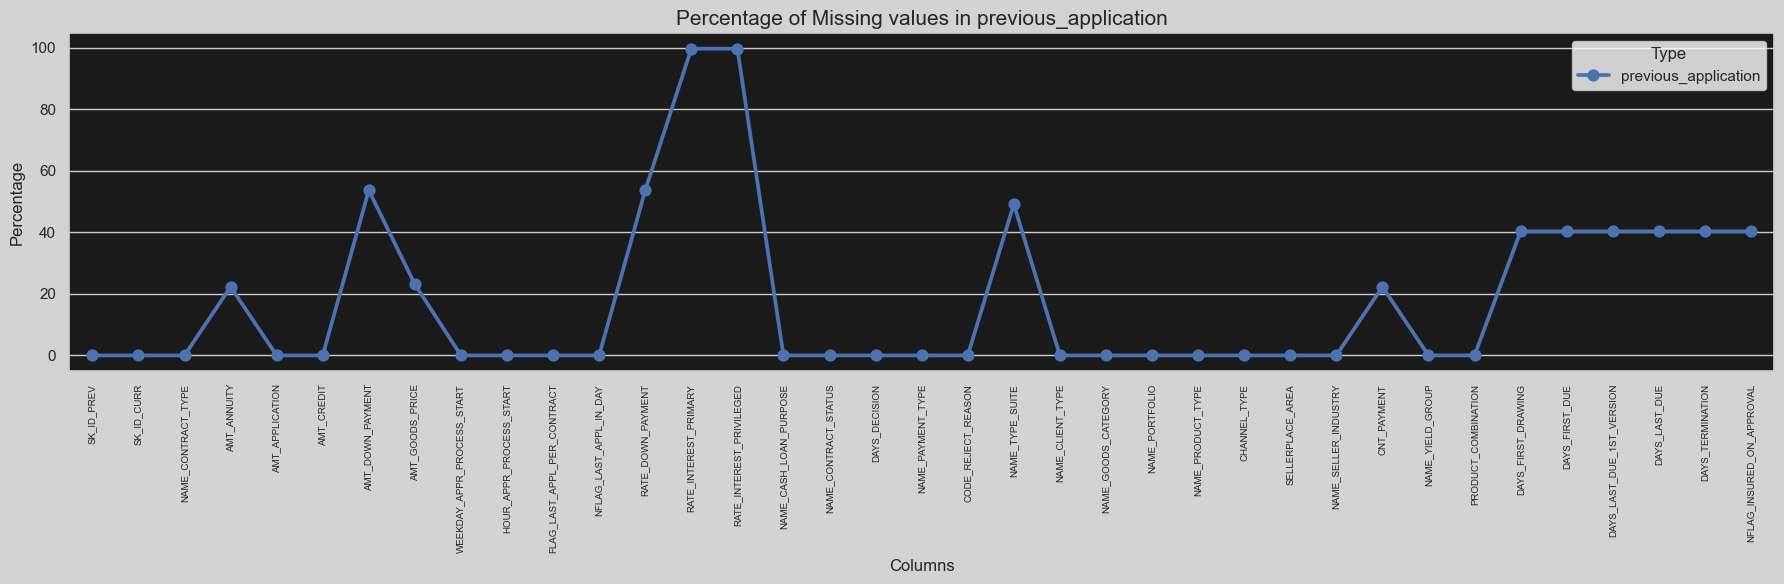

In [127]:
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application.columns = ["column", "percentage"]
miss_previous_application["type"] = "previous_application"


fig, ax = plt.subplots(figsize=(18, 6))
sns.pointplot(x="column", y="percentage", data=miss_previous_application, hue="type", ax=ax)


plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in previous_application", fontsize=15)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Columns", fontsize=12)
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.legend(title='Type', loc='upper right')
plt.tight_layout()

plt.show()


In [128]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
N

### Removing columns with missing values more than 50%
Key Point to be noted is that, as per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector. So we can drop those columns which surpass the limit.

In [129]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       "RATE_INTEREST_PRIVILEGED"],axis=1)

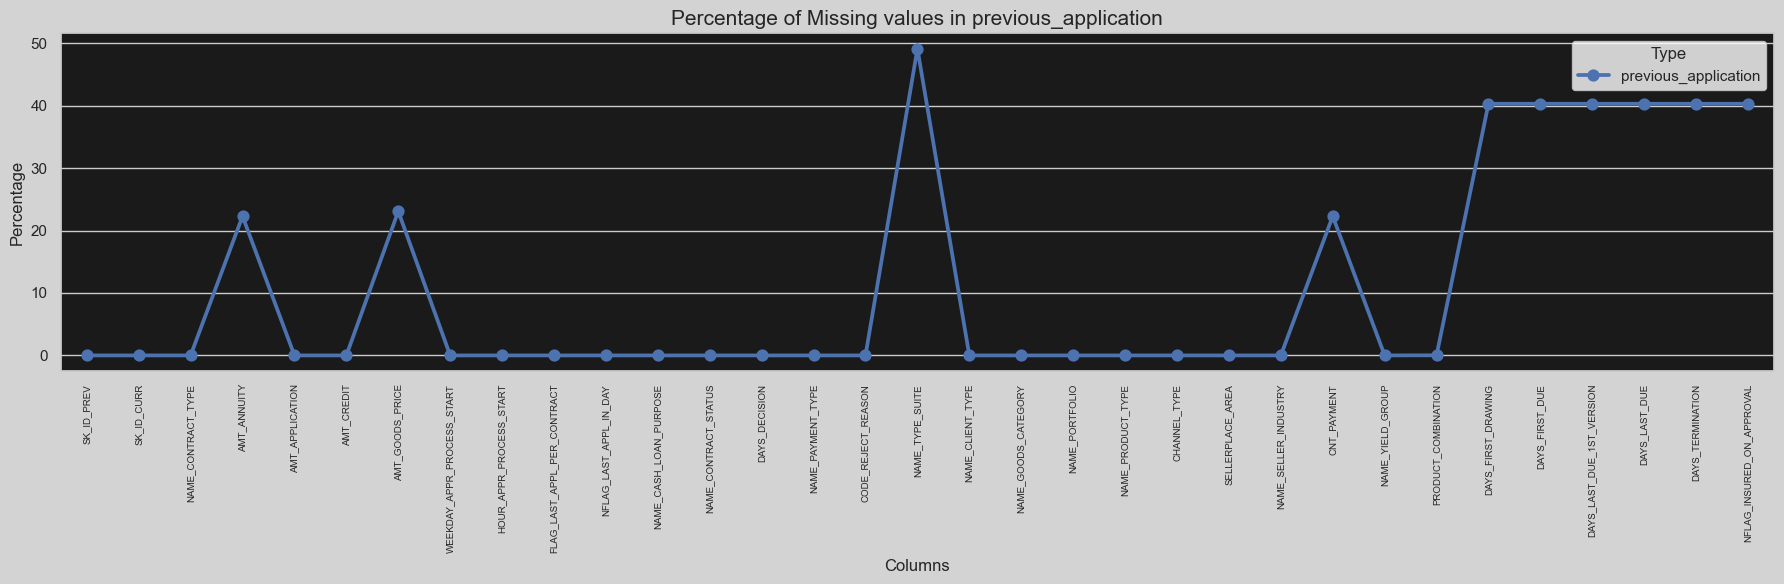

In [130]:
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application.columns = ["column", "percentage"]
miss_previous_application["type"] = "previous_application"


fig, ax = plt.subplots(figsize=(18, 6))
sns.pointplot(x="column", y="percentage", data=miss_previous_application, hue="type", ax=ax)


plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in previous_application", fontsize=15)
plt.ylabel("Percentage", fontsize=12)
plt.xlabel("Columns", fontsize=12)
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.legend(title='Type', loc='upper right')
plt.tight_layout()

plt.show()


In [131]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.00 
SK_ID_CURR                     0.00 
NAME_CONTRACT_TYPE             0.00 
AMT_ANNUITY                    22.29
AMT_APPLICATION                0.00 
AMT_CREDIT                     0.00 
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START     0.00 
HOUR_APPR_PROCESS_START        0.00 
FLAG_LAST_APPL_PER_CONTRACT    0.00 
NFLAG_LAST_APPL_IN_DAY         0.00 
NAME_CASH_LOAN_PURPOSE         0.00 
NAME_CONTRACT_STATUS           0.00 
DAYS_DECISION                  0.00 
NAME_PAYMENT_TYPE              0.00 
CODE_REJECT_REASON             0.00 
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE               0.00 
NAME_GOODS_CATEGORY            0.00 
NAME_PORTFOLIO                 0.00 
NAME_PRODUCT_TYPE              0.00 
CHANNEL_TYPE                   0.00 
SELLERPLACE_AREA               0.00 
NAME_SELLER_INDUSTRY           0.00 
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP               0.00 
PRODUCT_COMBINATION            0.02 
D

### MISSING values Suggestion

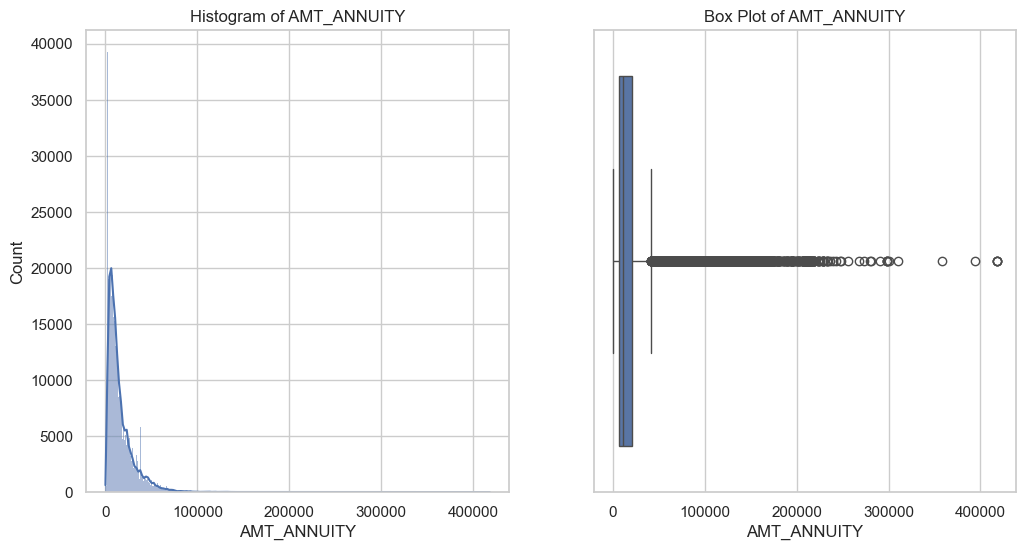

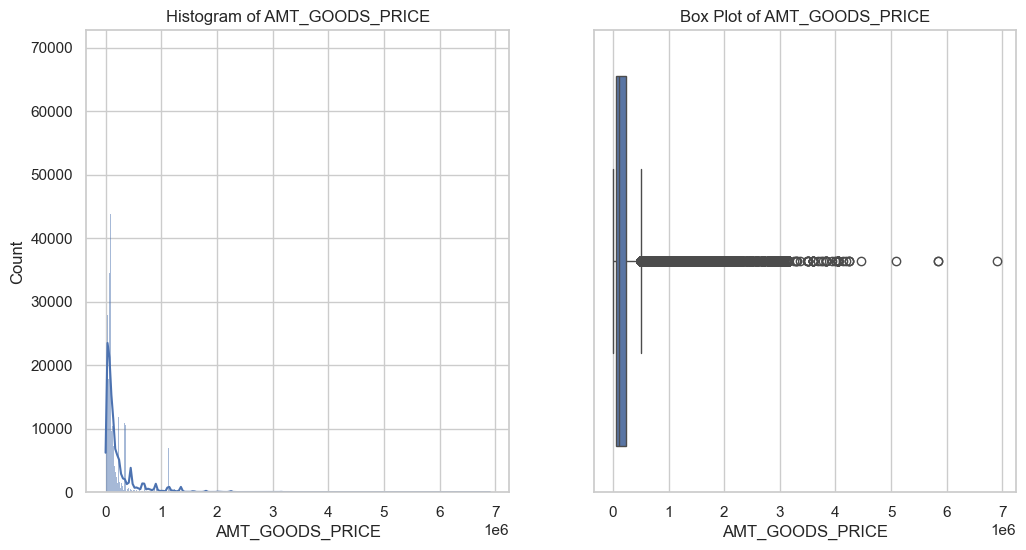

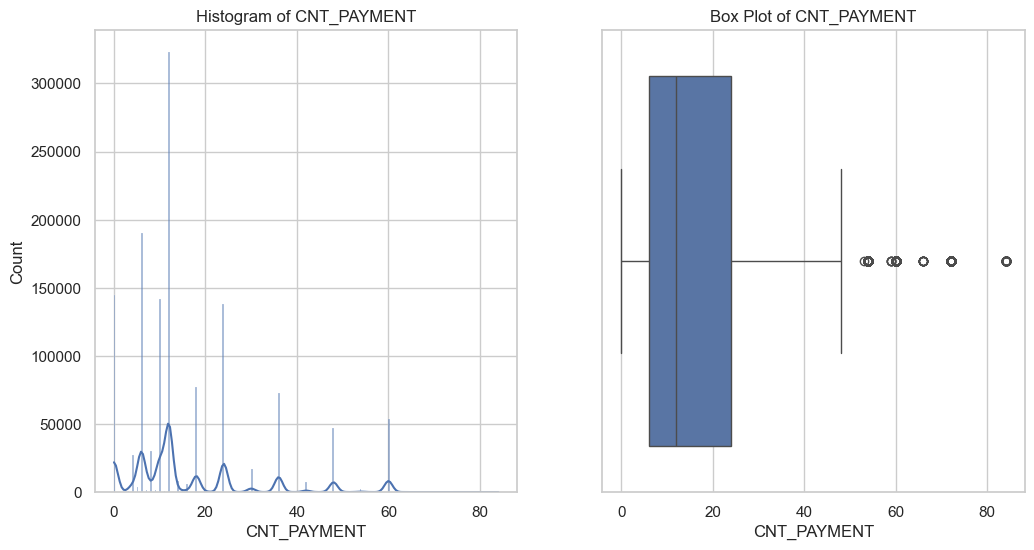

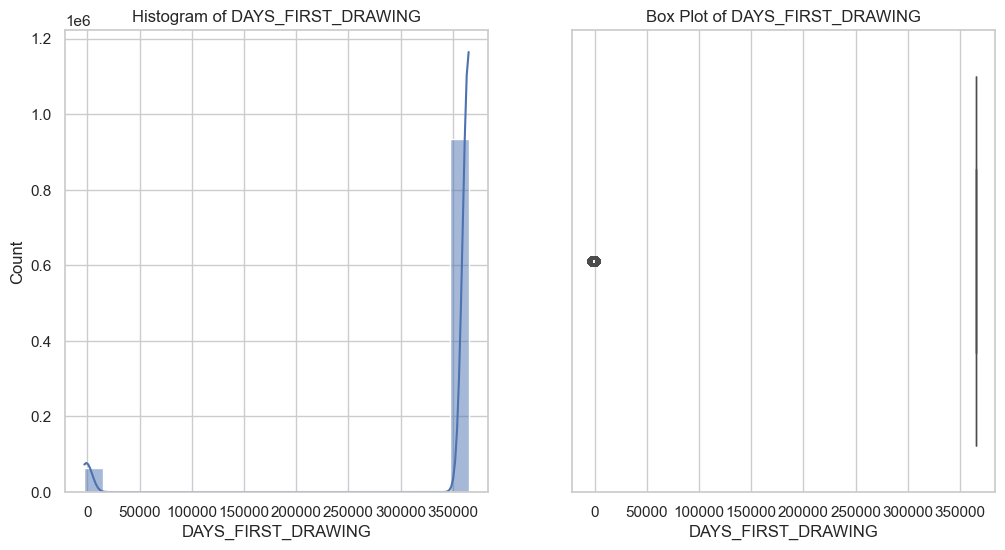

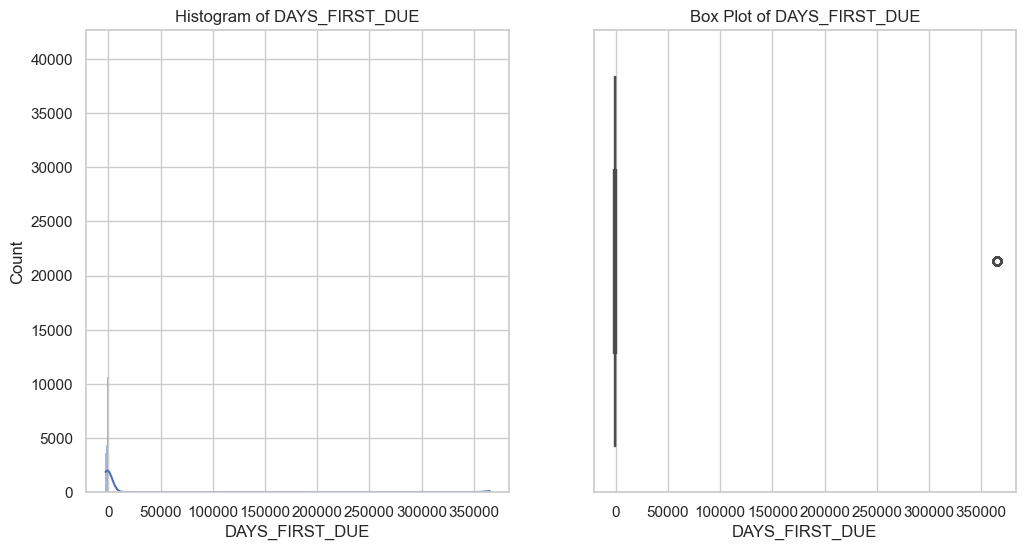

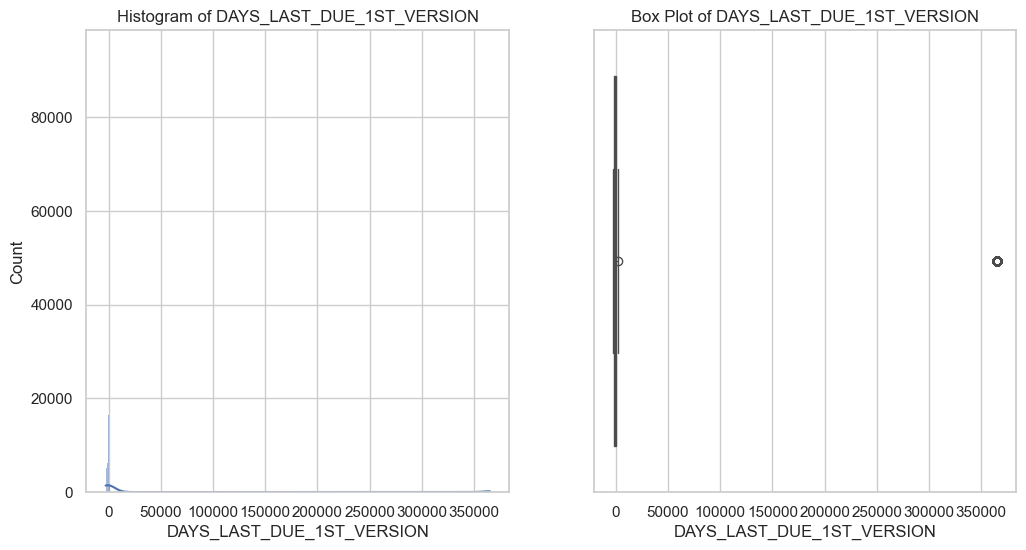

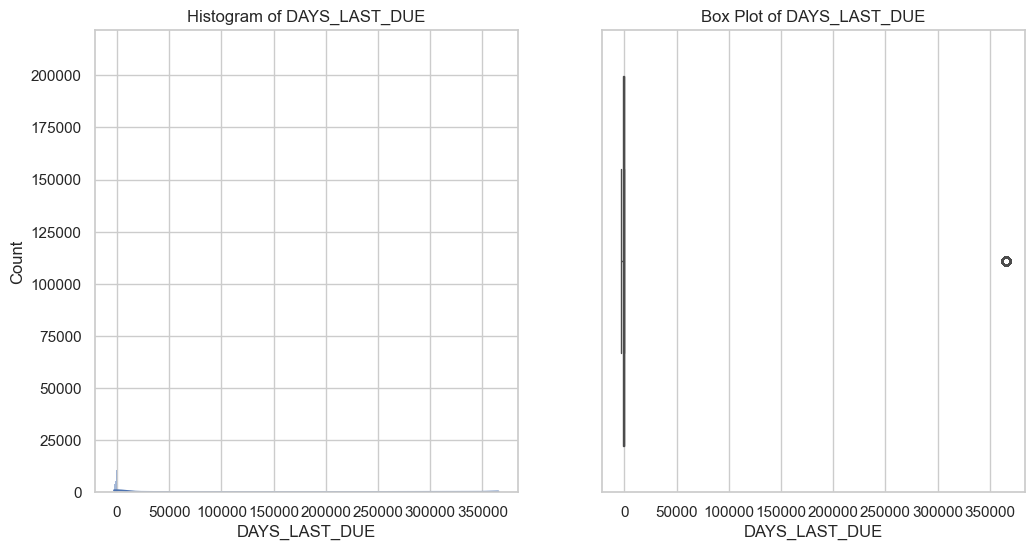

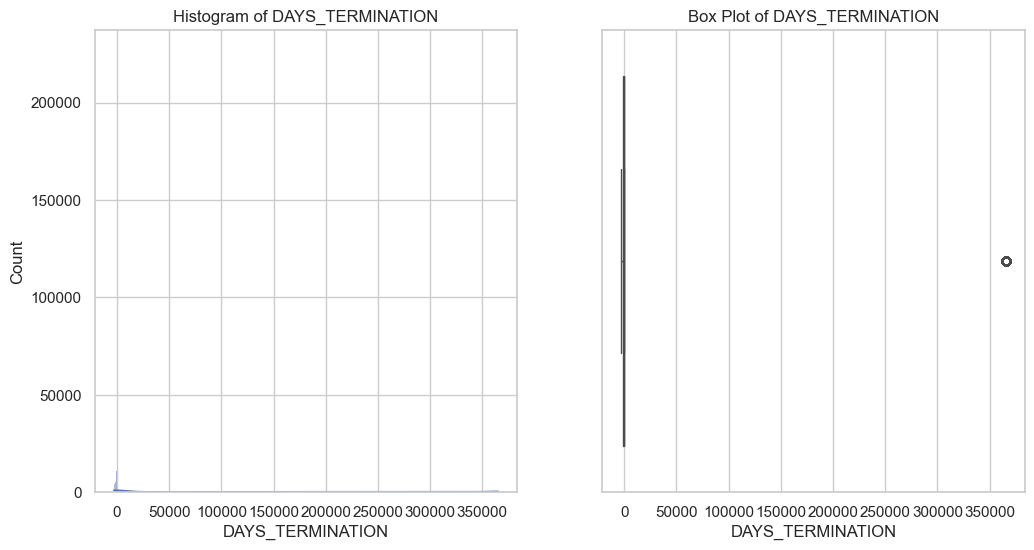

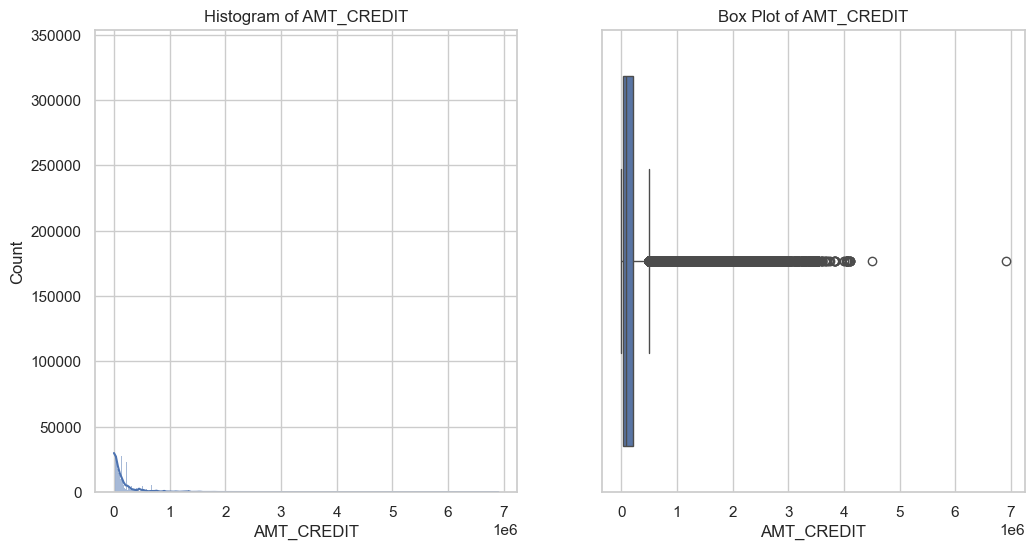

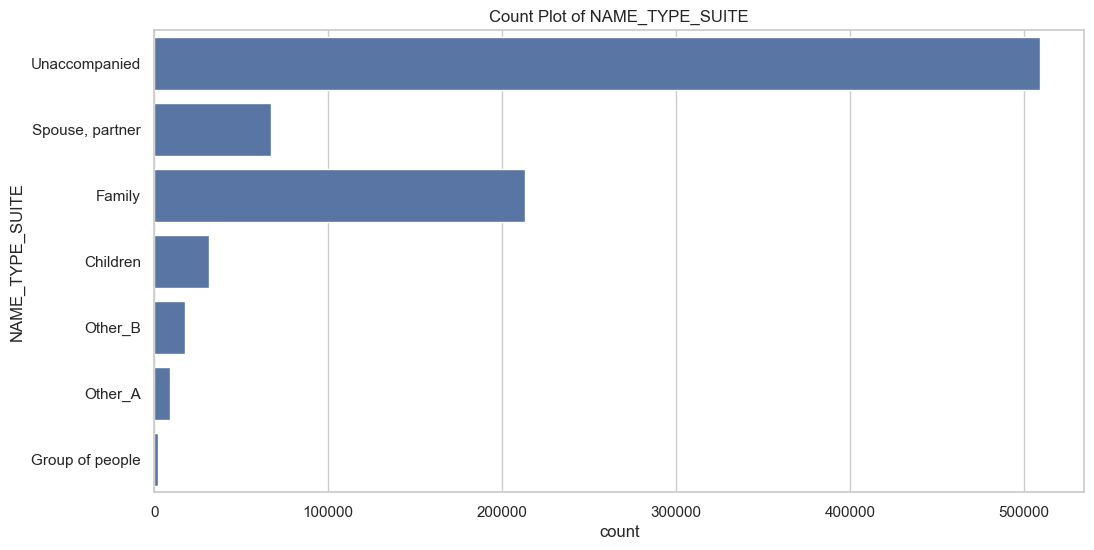

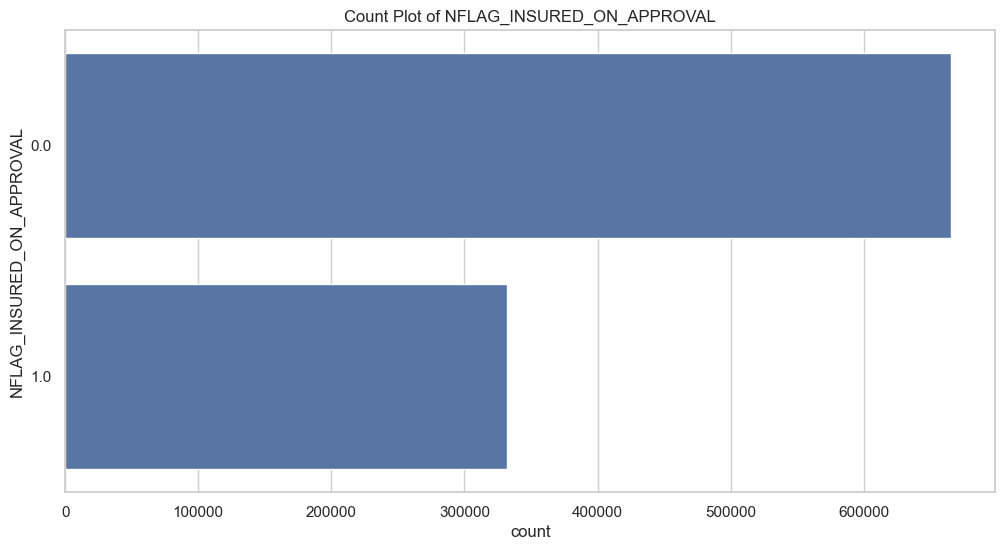

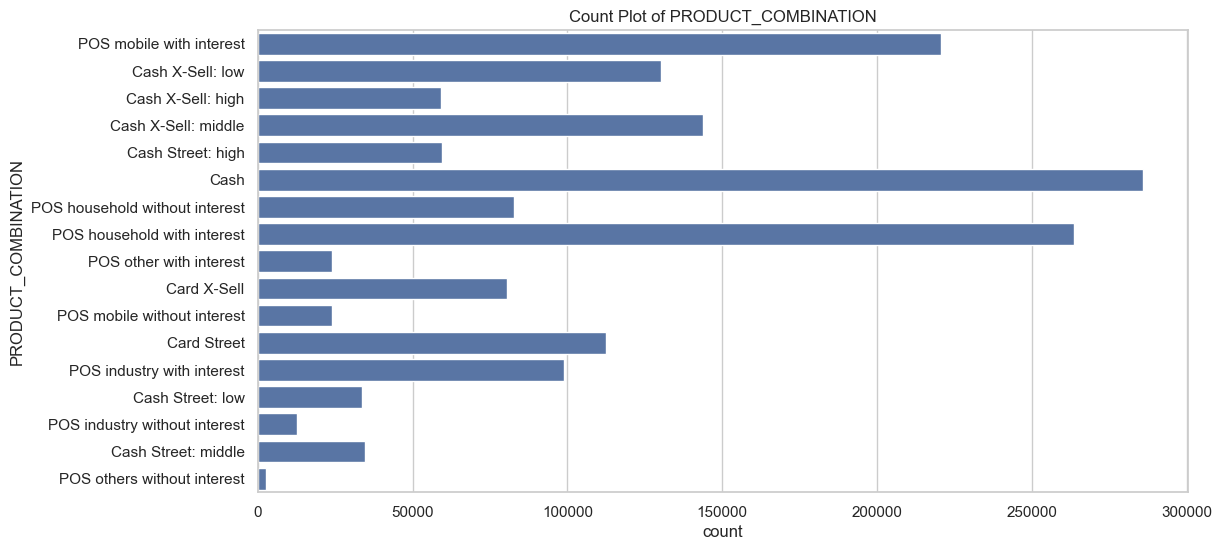

In [132]:
numerical_columns = ["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT", 
                     "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", 
                     "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", 
                     "DAYS_TERMINATION", "AMT_CREDIT"]


categorical_columns = ["NAME_TYPE_SUITE", "NFLAG_INSURED_ON_APPROVAL", "PRODUCT_COMBINATION"]


for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(previous_application[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=previous_application[column].dropna())
    plt.title(f'Box Plot of {column}')    
    plt.show()


for column in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=previous_application[column])
    plt.title(f'Count Plot of {column}')    
    plt.show()

### Explanation of Chosen Imputation Methods:

#### Mean for `AMT_ANNUITY`:
- **Reason**: 🧮 Mean is appropriate for normally distributed numerical data because it considers all values, giving a balanced estimate of central tendency.

#### Median for `AMT_GOODS_PRICE`, `CNT_PAYMENT`, `DAYS_FIRST_DRAWING`, `DAYS_FIRST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, `DAYS_LAST_DUE`, `DAYS_TERMINATION`, and `AMT_CREDIT`:
- **Reason**: 📈 Median is suitable for skewed numerical data as it is not affected by extreme values or outliers, providing a more robust measure of central tendency for such distributions.

#### Mode for `NAME_TYPE_SUITE`, `NFLAG_INSURED_ON_APPROVAL`, and `PRODUCT_COMBINATION`:
- **Reason**: 🗂️ Mode is suitable for categorical data because it identifies the most frequently occurring category, which is a logical choice for filling in missing categorical values to maintain consistency with the majority of the data.


In [133]:
mean_amt_annuity = previous_application['AMT_ANNUITY'].mean()
median_amt_goods_price = previous_application['AMT_GOODS_PRICE'].median()
median_cnt_payment = previous_application['CNT_PAYMENT'].median()
median_days_first_drawing = previous_application['DAYS_FIRST_DRAWING'].median()
median_days_first_due = previous_application['DAYS_FIRST_DUE'].median()
median_days_last_due_1st_version = previous_application['DAYS_LAST_DUE_1ST_VERSION'].median()
median_days_last_due = previous_application['DAYS_LAST_DUE'].median()
median_days_termination = previous_application['DAYS_TERMINATION'].median()
median_amt_credit = previous_application['AMT_CREDIT'].median()
mode_name_type_suite = previous_application['NAME_TYPE_SUITE'].mode()[0]
mode_nflag_insured_on_approval = previous_application['NFLAG_INSURED_ON_APPROVAL'].mode()[0]
mode_product_combination = previous_application['PRODUCT_COMBINATION'].mode()[0]

In [134]:
imputation_df = pd.DataFrame({
    "Column": ["AMT_ANNUITY", "AMT_GOODS_PRICE", "CNT_PAYMENT", "DAYS_FIRST_DRAWING", 
               "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", 
               "DAYS_TERMINATION", "AMT_CREDIT", "NAME_TYPE_SUITE", 
               "NFLAG_INSURED_ON_APPROVAL", "PRODUCT_COMBINATION"],
    "Imputation Method": ["Mean", "Median", "Median", "Median", "Median", "Median", 
                          "Median", "Median", "Median", "Mode", "Mode", "Mode"],
    "Imputation Value": [mean_amt_annuity, median_amt_goods_price, median_cnt_payment, 
                         median_days_first_drawing, median_days_first_due, 
                         median_days_last_due_1st_version, median_days_last_due, 
                         median_days_termination, median_amt_credit, mode_name_type_suite, 
                         mode_nflag_insured_on_approval, mode_product_combination]
})
imputation_df

Column Imputation Method Imputation Value
0   AMT_ANNUITY                Mean              15955.120659   
1   AMT_GOODS_PRICE            Median            112320.0       
2   CNT_PAYMENT                Median            12.0           
3   DAYS_FIRST_DRAWING         Median            365243.0       
4   DAYS_FIRST_DUE             Median           -831.0          
5   DAYS_LAST_DUE_1ST_VERSION  Median           -361.0          
6   DAYS_LAST_DUE              Median           -537.0          
7   DAYS_TERMINATION           Median           -499.0          
8   AMT_CREDIT                 Median            80541.0        
9   NAME_TYPE_SUITE            Mode              Unaccompanied  
10  NFLAG_INSURED_ON_APPROVAL  Mode              0.0            
11  PRODUCT_COMBINATION        Mode              Cash

## Splitting of Columns to Numerical and Categorical

In [135]:
obj_dtypes = [i for i in previous_application.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in previous_application.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR', 'TARGET']]


print('Categorical Columns:\n')
for column in obj_dtypes:
    print(column)


print('\nNumerical Columns:\n')
for column in num_dtypes:
    print(column)


Categorical Columns:

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION

Numerical Columns:

SK_ID_PREV
AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_GOODS_PRICE
HOUR_APPR_PROCESS_START
NFLAG_LAST_APPL_IN_DAY
DAYS_DECISION
SELLERPLACE_AREA
CNT_PAYMENT
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL



## % of Missing values in application_data

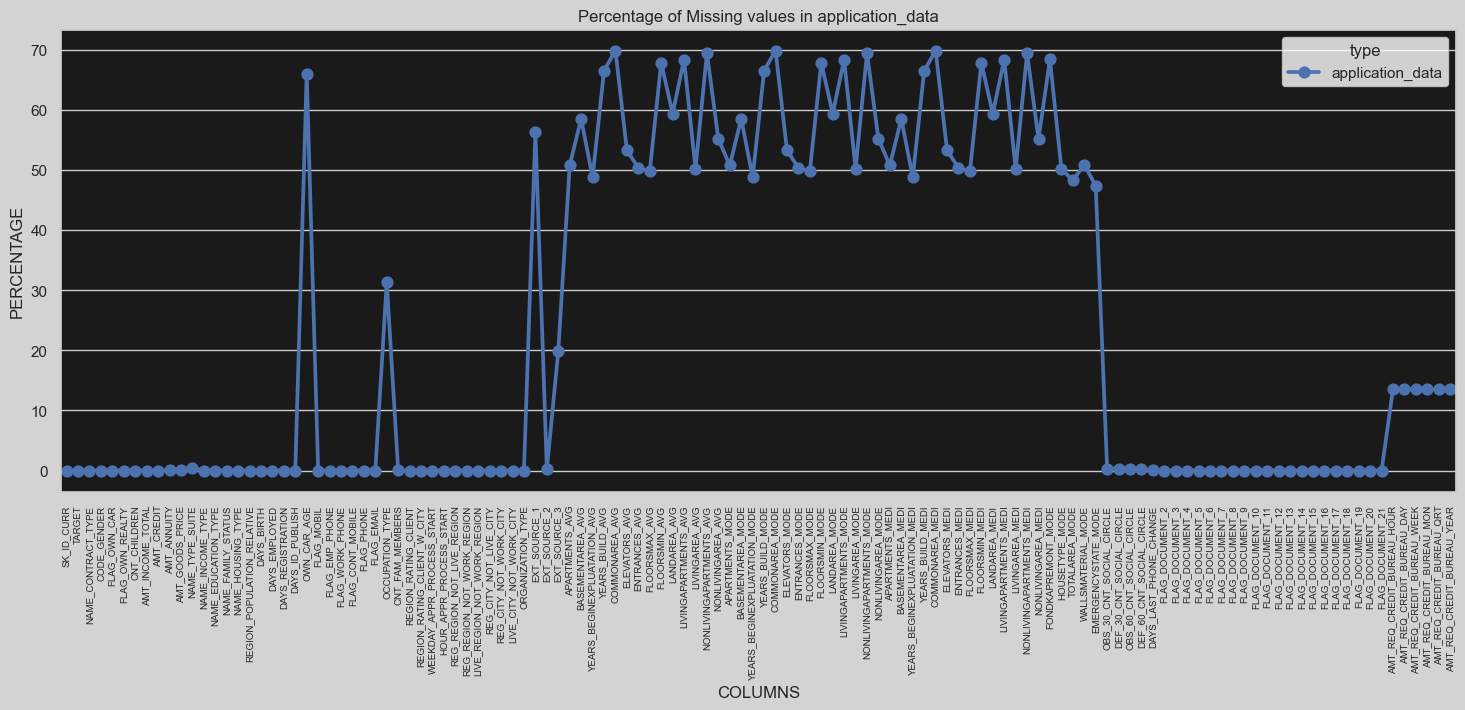

In [136]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot(x="index", y=0, data=miss_application_data, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [137]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                      0.00 
TARGET                          0.00 
NAME_CONTRACT_TYPE              0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT                      0.00 
AMT_ANNUITY                     0.00 
AMT_GOODS_PRICE                 0.09 
NAME_TYPE_SUITE                 0.42 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
OWN_CAR_AGE                     65.99
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE  

### Removing columns with missing values more than 40%

As per Industrial Standard, max Threshold limit can be between 40% to 50 % depending upon the data acquired in specific sector.

In [138]:
application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

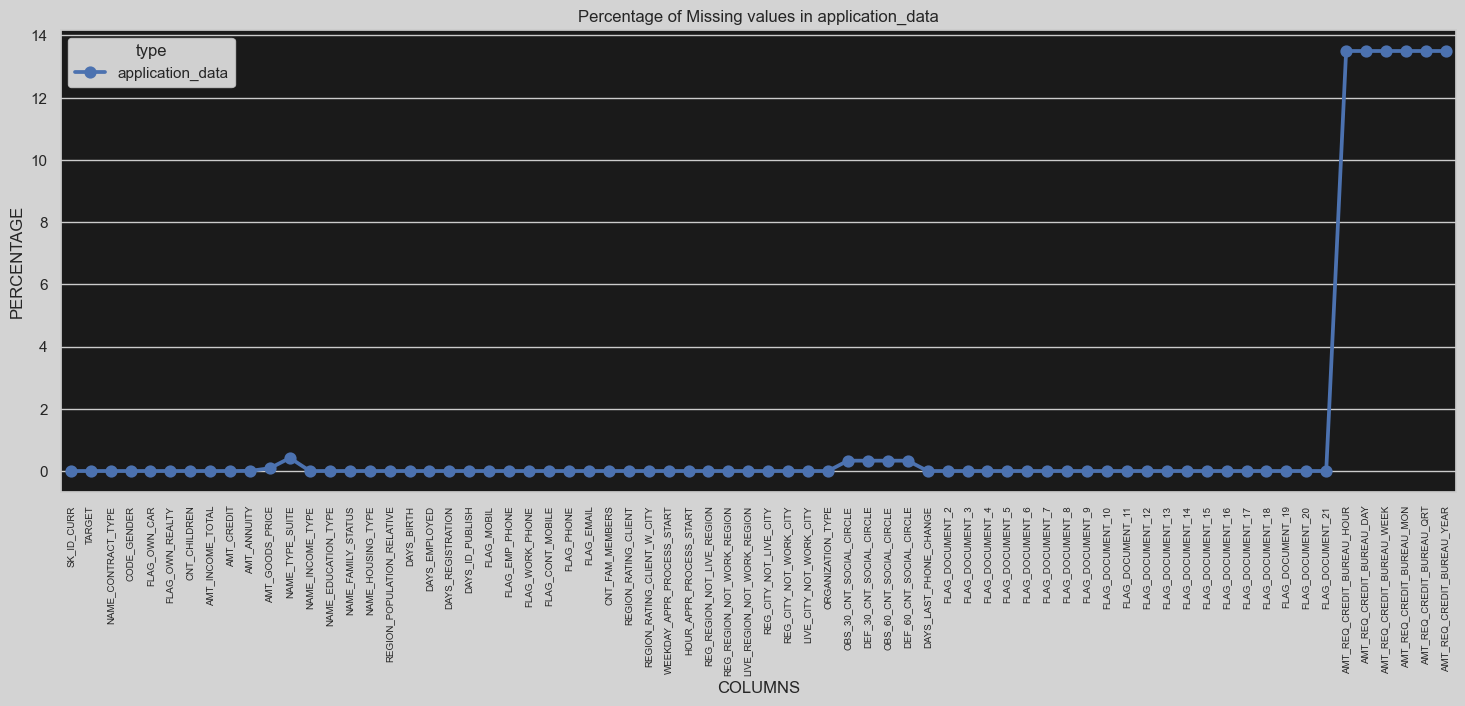

In [139]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum()) * 100 / application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot(x="index", y=0, data=miss_application_data, hue="type")
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")



In [140]:
round(100*(application_data.isnull().sum()/len(application_data.index)),2)

SK_ID_CURR                     0.00 
TARGET                         0.00 
NAME_CONTRACT_TYPE             0.00 
CODE_GENDER                    0.00 
FLAG_OWN_CAR                   0.00 
FLAG_OWN_REALTY                0.00 
CNT_CHILDREN                   0.00 
AMT_INCOME_TOTAL               0.00 
AMT_CREDIT                     0.00 
AMT_ANNUITY                    0.00 
AMT_GOODS_PRICE                0.09 
NAME_TYPE_SUITE                0.42 
NAME_INCOME_TYPE               0.00 
NAME_EDUCATION_TYPE            0.00 
NAME_FAMILY_STATUS             0.00 
NAME_HOUSING_TYPE              0.00 
REGION_POPULATION_RELATIVE     0.00 
DAYS_BIRTH                     0.00 
DAYS_EMPLOYED                  0.00 
DAYS_REGISTRATION              0.00 
DAYS_ID_PUBLISH                0.00 
FLAG_MOBIL                     0.00 
FLAG_EMP_PHONE                 0.00 
FLAG_WORK_PHONE                0.00 
FLAG_CONT_MOBILE               0.00 
FLAG_PHONE                     0.00 
FLAG_EMAIL                     0.00 
C

### Explanation of Chosen Imputation Methods:

#### Mean for `AMT_ANNUITY` and `AMT_GOODS_PRICE`:
- **Reason**: 🧮 Mean is appropriate for normally distributed numerical data because it considers all values, giving a balanced estimate of central tendency.

#### Median for `AMT_REQ_CREDIT_BUREAU_DAY`, `AMT_REQ_CREDIT_BUREAU_HOUR`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_YEAR`, `DEF_30_CNT_SOCIAL_CIRCLE`, `OBS_60_CNT_SOCIAL_CIRCLE`, `DEF_60_CNT_SOCIAL_CIRCLE`, and `CNT_FAM_MEMBERS`:
- **Reason**: 📈 Median is suitable for skewed numerical data as it is not affected by extreme values or outliers, providing a more robust measure of central tendency for such distributions.

#### Mode for `NAME_TYPE_SUITE` and `DAYS_LAST_PHONE_CHANGE`:
- **Reason**: 🗂️ Mode is suitable for categorical data because it identifies the most frequently occurring category, which is a logical choice for filling in missing categorical values to maintain consistency with the majority of the data.


In [141]:
mean_amt_annuity = application_data['AMT_ANNUITY'].mean()
mean_amt_goods_price = application_data['AMT_GOODS_PRICE'].mean()

median_amt_req_credit_bureau_day = application_data['AMT_REQ_CREDIT_BUREAU_DAY'].median()
median_amt_req_credit_bureau_hour = application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
median_amt_req_credit_bureau_mon = application_data['AMT_REQ_CREDIT_BUREAU_MON'].median()
median_amt_req_credit_bureau_qrt = application_data['AMT_REQ_CREDIT_BUREAU_QRT'].median()
median_amt_req_credit_bureau_week = application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
median_amt_req_credit_bureau_year = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
median_def_30_cnt_social_circle = application_data['DEF_30_CNT_SOCIAL_CIRCLE'].median()
median_obs_60_cnt_social_circle = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()
median_def_60_cnt_social_circle = application_data['DEF_60_CNT_SOCIAL_CIRCLE'].median()
median_cnt_fam_members = application_data['CNT_FAM_MEMBERS'].median()

mode_name_type_suite = application_data['NAME_TYPE_SUITE'].mode()[0]
mode_days_last_phone_change = application_data['DAYS_LAST_PHONE_CHANGE'].mode()[0]


imputation_df = pd.DataFrame({
    "Column": ["AMT_ANNUITY", "AMT_GOODS_PRICE",
               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_MON",
               "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_YEAR",
               "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
               "CNT_FAM_MEMBERS", "NAME_TYPE_SUITE", "DAYS_LAST_PHONE_CHANGE"],
    "Imputation Method": ["Mean", "Mean",
                          "Median", "Median", "Median", "Median",
                          "Median", "Median", "Median", "Median", "Median",
                          "Median", "Mode", "Mode"],
    "Imputation Value": [mean_amt_annuity, mean_amt_goods_price,
                         median_amt_req_credit_bureau_day, median_amt_req_credit_bureau_hour,
                         median_amt_req_credit_bureau_mon, median_amt_req_credit_bureau_qrt,
                         median_amt_req_credit_bureau_week, median_amt_req_credit_bureau_year,
                         median_def_30_cnt_social_circle, median_obs_60_cnt_social_circle,
                         median_def_60_cnt_social_circle, median_cnt_fam_members,
                         mode_name_type_suite, mode_days_last_phone_change]
})

print(imputation_df)


                        Column Imputation Method Imputation Value
0   AMT_ANNUITY                 Mean              27108.573909   
1   AMT_GOODS_PRICE             Mean              538396.207429  
2   AMT_REQ_CREDIT_BUREAU_DAY   Median            0.0            
3   AMT_REQ_CREDIT_BUREAU_HOUR  Median            0.0            
4   AMT_REQ_CREDIT_BUREAU_MON   Median            0.0            
5   AMT_REQ_CREDIT_BUREAU_QRT   Median            0.0            
6   AMT_REQ_CREDIT_BUREAU_WEEK  Median            0.0            
7   AMT_REQ_CREDIT_BUREAU_YEAR  Median            1.0            
8   DEF_30_CNT_SOCIAL_CIRCLE    Median            0.0            
9   OBS_60_CNT_SOCIAL_CIRCLE    Median            0.0            
10  DEF_60_CNT_SOCIAL_CIRCLE    Median            0.0            
11  CNT_FAM_MEMBERS             Median            2.0            
12  NAME_TYPE_SUITE             Mode              Unaccompanied  
13  DAYS_LAST_PHONE_CHANGE      Mode              0.0            


## Print the information about the attributes of application_data

# Converting negative values to absolute values


In [142]:
application_data['DAYS_BIRTH'] = abs(application_data['DAYS_BIRTH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH'])
application_data['DAYS_LAST_PHONE_CHANGE'] = abs(application_data['DAYS_LAST_PHONE_CHANGE'])

In [143]:
display("application_data")
display(application_data.head())

'application_data'

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans         M           N             
1  100003      0       Cash loans         F           N             
2  100004      0       Revolving loans    M           Y             
3  100006      0       Cash loans         F           N             
4  100007      0       Cash loans         M           N             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0  Y               0             202500.0          406597.5    24700.5       
1  N               0             270000.0          1293502.5   35698.5       
2  Y               0             67500.0           135000.0    6750.0        
3  Y               0             135000.0          312682.5    29686.5       
4  Y               0             121500.0          513000.0    21865.5       

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0  351000.0         Unaccompanied   Working           
1  1129500.0        Family          State servant     
2  135000.0         Unaccompanied   Working           
3  297000.0         Unaccompanied   Working           
4  513000.0         Unaccompanied   Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special  Civil marriage        House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.010032                    19046      -225           -4260.0              
3  0.008019                    19005      -3039          -9833.0              
4  0.028663                    19932      -3038          -4311.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  2531             1           1               1                 
3  2437             1           1               0                 
4  3458             1           1               0                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           1.0               
3  1                 0           0           2.0               
4  1                 0           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  2                     2                             
3  2                     2                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0  WEDNESDAY                  10                        
1  MONDAY                     11                        
2  MONDAY                     9                         
3  WEDNESDAY                  17                        
4  THURSDAY                   11                        

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                            

   LIVE_REGION_

## Separating numerical and categorical in application_data

In [144]:
obj_dtypes = [i for i in application_data.select_dtypes(include=object).columns if i not in ["type"]]
num_dtypes = [i for i in application_data.select_dtypes(include=np.number).columns if i not in ['SK_ID_CURR', 'TARGET']]


print('Categorical Columns:\n')
for column in obj_dtypes:
    print(column)


print('\nNumerical Columns:\n')
for column in num_dtypes:
    print(column)

Categorical Columns:

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE

Numerical Columns:

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11



## Imbalance percentage

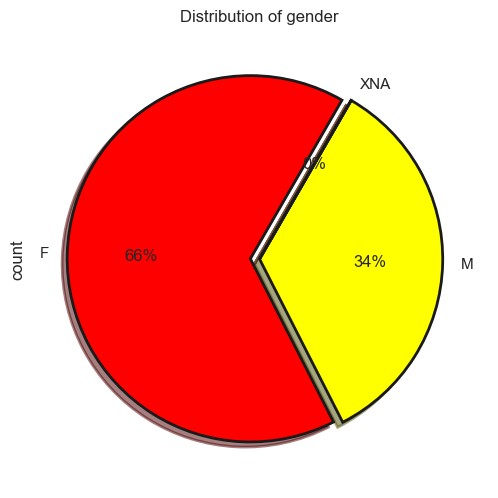

In [145]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
application_data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()


## Distribution of Target variable

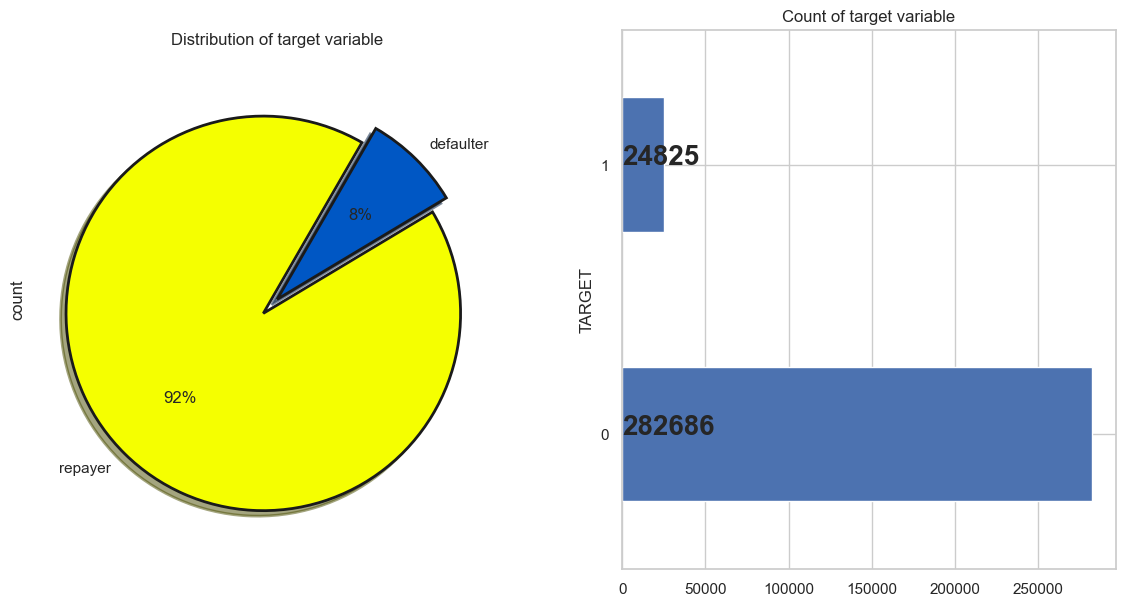

In [146]:
plt.figure(figsize=(14,7))
plt.subplot(121)
application_data["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["repayer","defaulter"],
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = application_data["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(application_data["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()


8% out of total client population have difficulties in repaying loans.

### Concatenating application_data and previous_application

In [147]:
application_data_x = application_data[[x for x in application_data.columns if x not in ["TARGET"]]]
previous_application_x = previous_application[[x for x in previous_application.columns if x not in ["TARGET"]]]
application_data_x["type"] = "application_data"
previous_application_x["type"] = "previous_application"
data = pd.concat([application_data_x,previous_application_x],axis=0) 

## Distribution in Contract types in application_data 


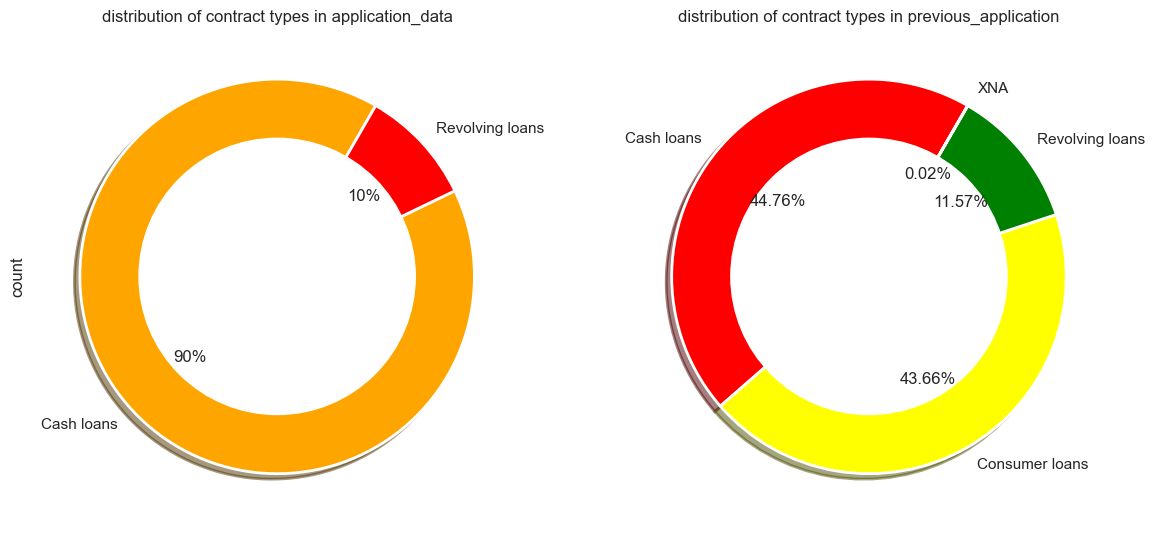

In [148]:
plt.figure(figsize=(14,7))
plt.subplot(121)
data[data["type"] == "application_data"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
data[data["type"] == "previous_application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green",'BLACK'],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

plt.show()



The percentage of revolving loans and cash loans are 10% & 90%.

## Gender Distribution in application_data 

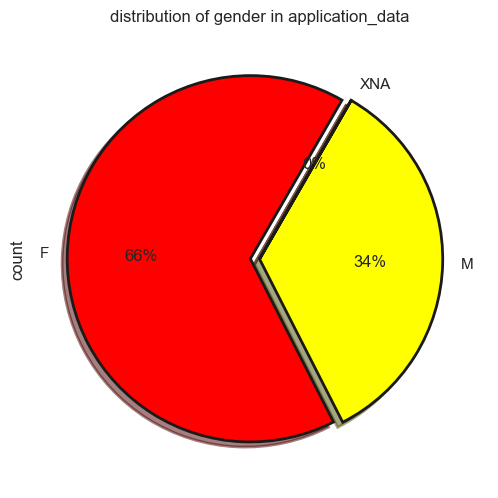

In [149]:
fig = plt.figure(figsize=(13,6))
plt.subplot(121)
data[data["type"] == "application_data"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["red","yellow"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of gender in application_data")
plt.show()

### Point to infer from the graph

Female : 66% 

Male : 34% 

## Distribution of Contract type by gender

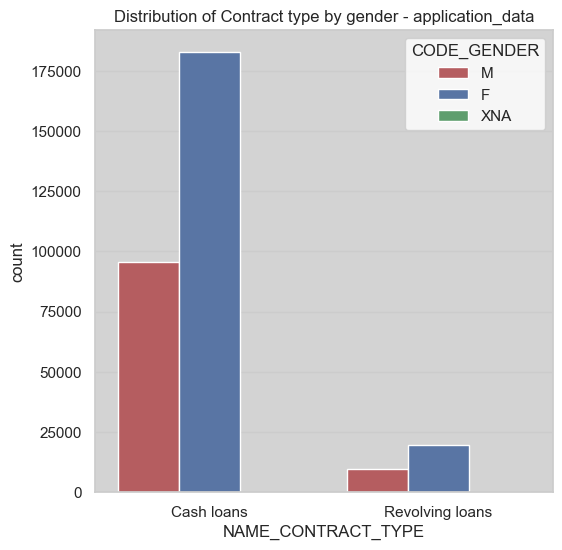

In [150]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
ax = sns.countplot(x="NAME_CONTRACT_TYPE", hue="CODE_GENDER", data=data[data["type"] == "application_data"], palette=["r","b","g"])
ax.set_facecolor("lightgrey")
ax.set_title("Distribution of Contract type by gender - application_data")

plt.show()


Cash loans is always prefered over Revolving loans by both genders

## Distribution of client owning a car and by gender

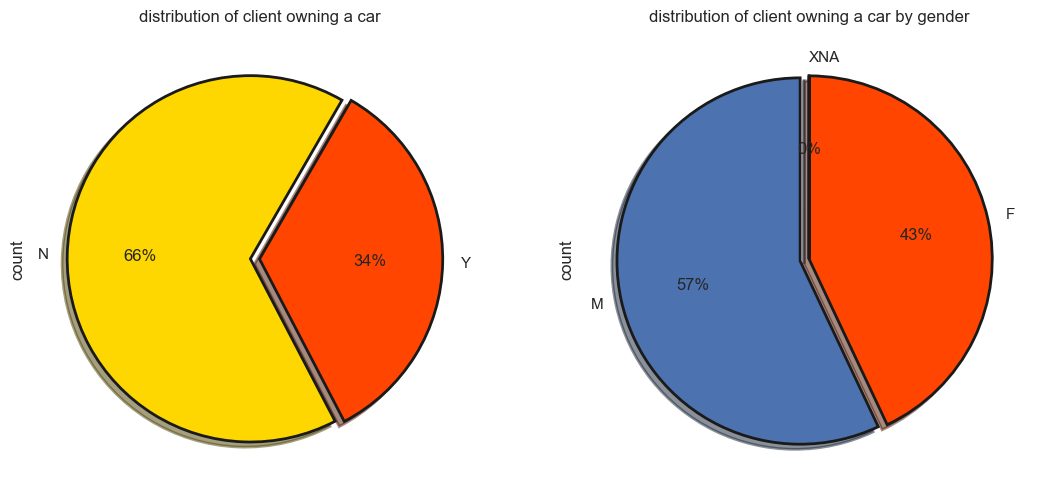

In [151]:
fig = plt.figure(figsize=(13,6))

plt.subplot(121)
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
data[data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

Distribution of client owning a car. 34% of clients own a car .
Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

## Distribution of client owning a house or flat and by gender

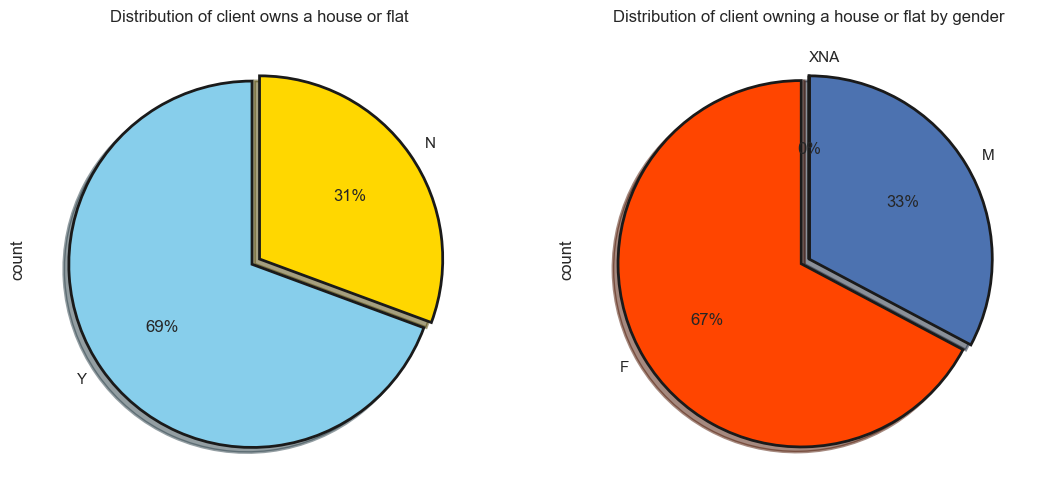

In [152]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
                                              wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
data[data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
                                                                        wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()

SUBPLOT 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .
SUBPLOT 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

## Distribution of Number of children and family members of client by repayment status.

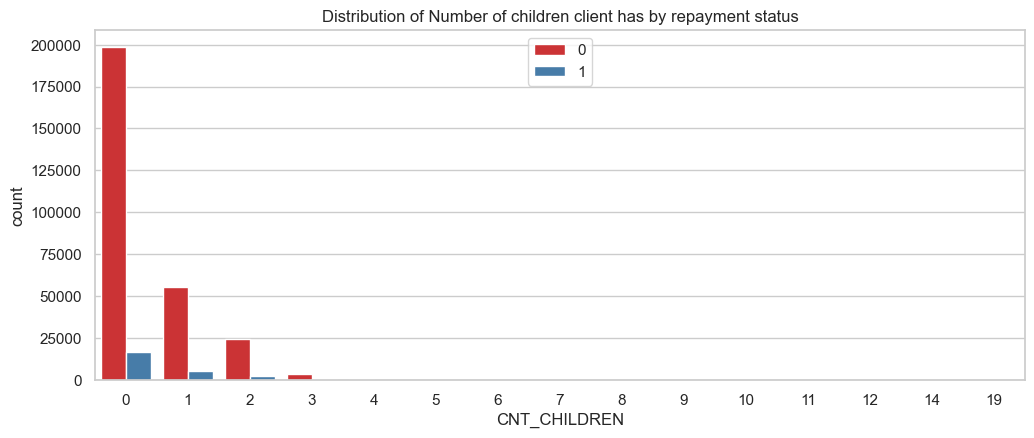

In [153]:
fig = plt.figure(figsize=(12,10))

plt.subplot(211)
sns.countplot(x="CNT_CHILDREN", palette="Set1", hue="TARGET", data=application_data)
plt.legend(loc="upper center")
plt.title("Distribution of Number of children client has by repayment status")

plt.show()


## Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

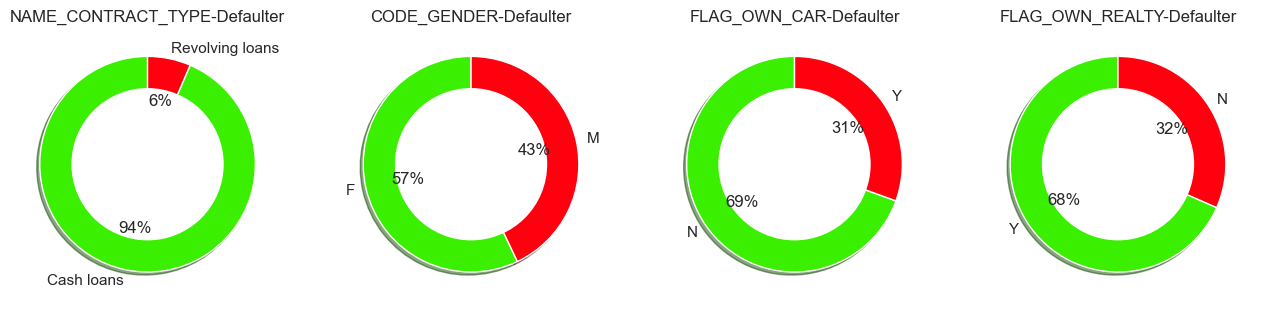

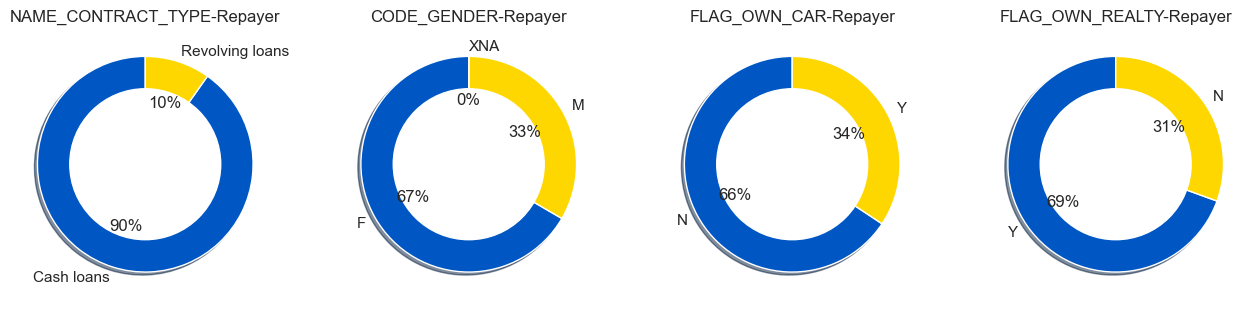

In [154]:
default = application_data[application_data["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
non_default = application_data[application_data["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)

fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 90,
                                        wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Defaulter")


fig = plt.figure(figsize=(16,4))
for i,j in itertools.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 90,
                                           wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    circ = plt.Circle((0,0),.7,color="white")
    plt.gca().add_artist(circ)
    plt.ylabel("")
    plt.title(i+"-Repayer")

Percentage of males is 10% more in defaults than non defaulters.
Percentage of Cash Loans is 4% more in defaults than Revolving Loans.

### Distribution of amount data

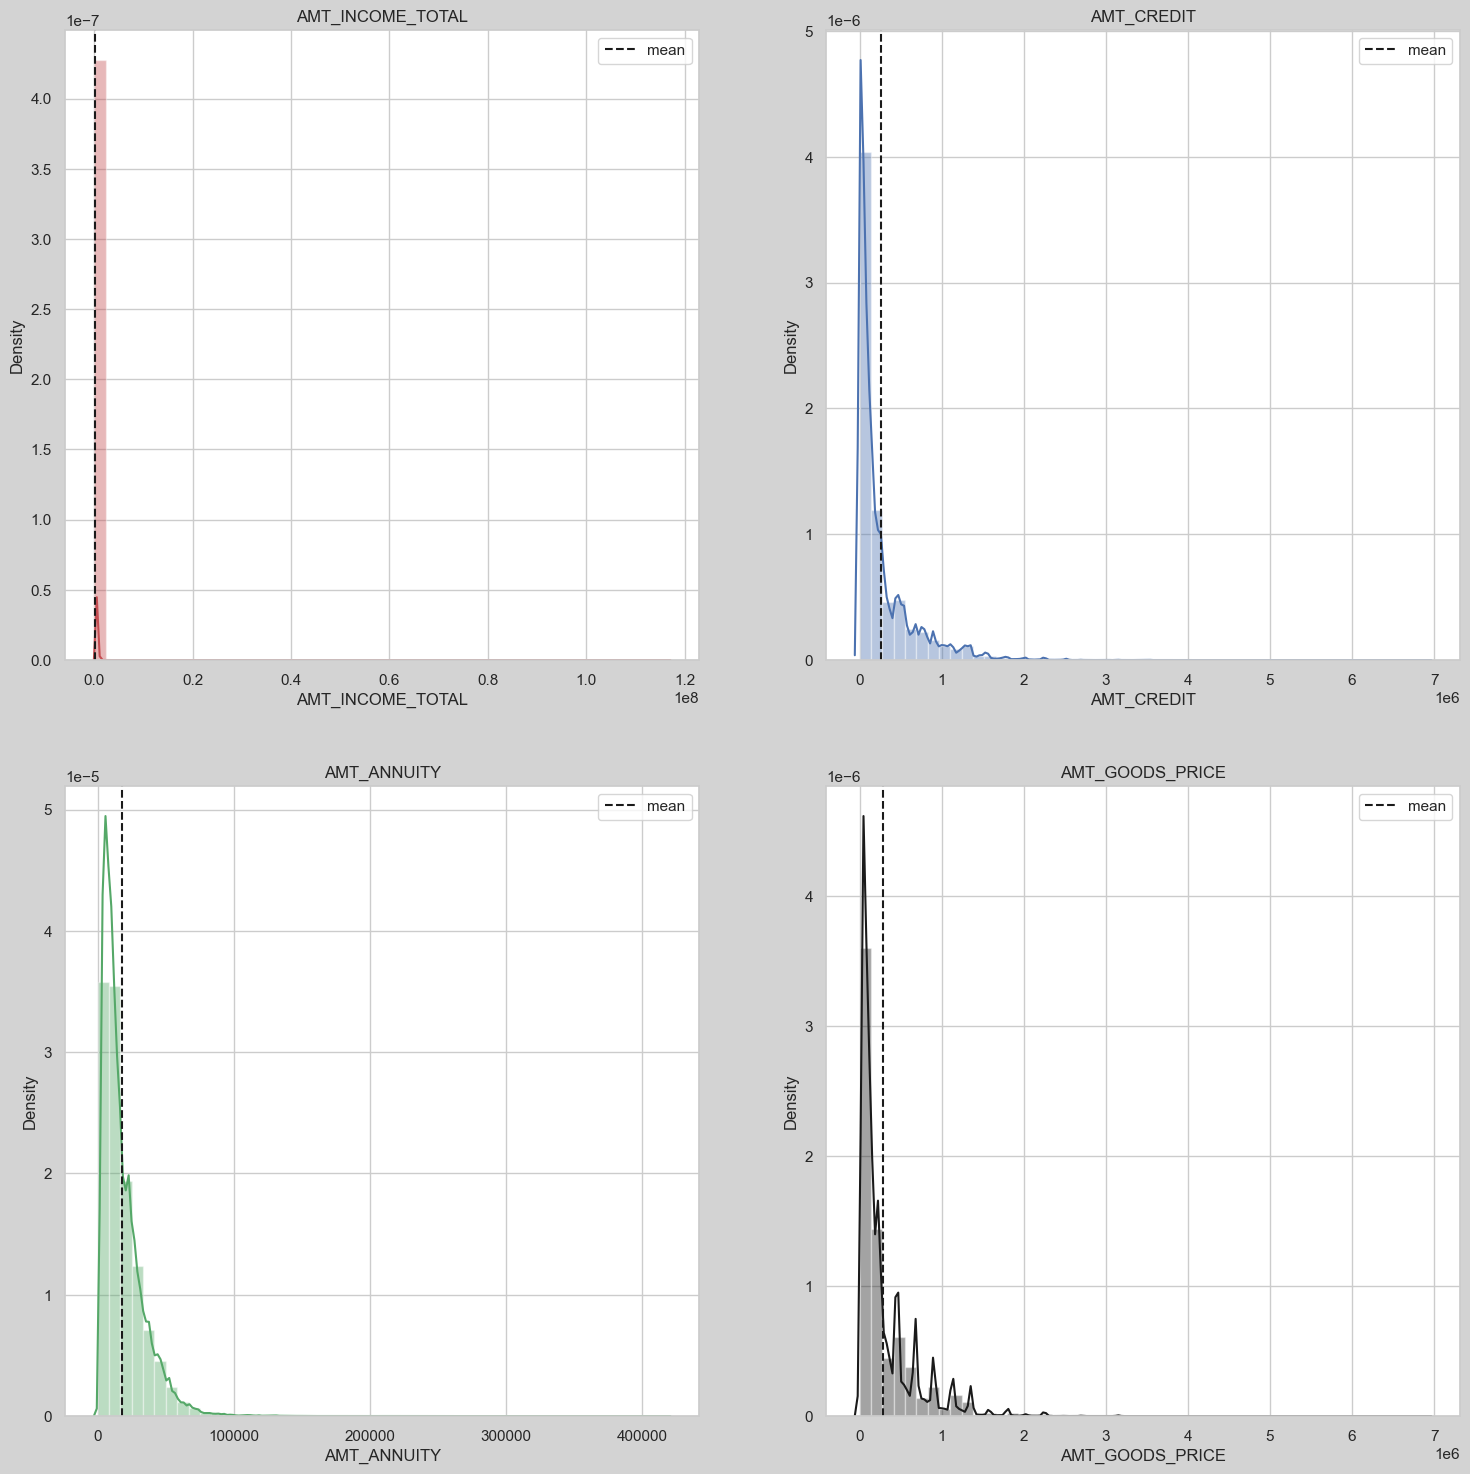

In [155]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(data[data[i].notnull()][i],color=k)
    plt.axvline(data[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)


## Comparing summary statistics between defaulters and non - defaulters for loan amounts.



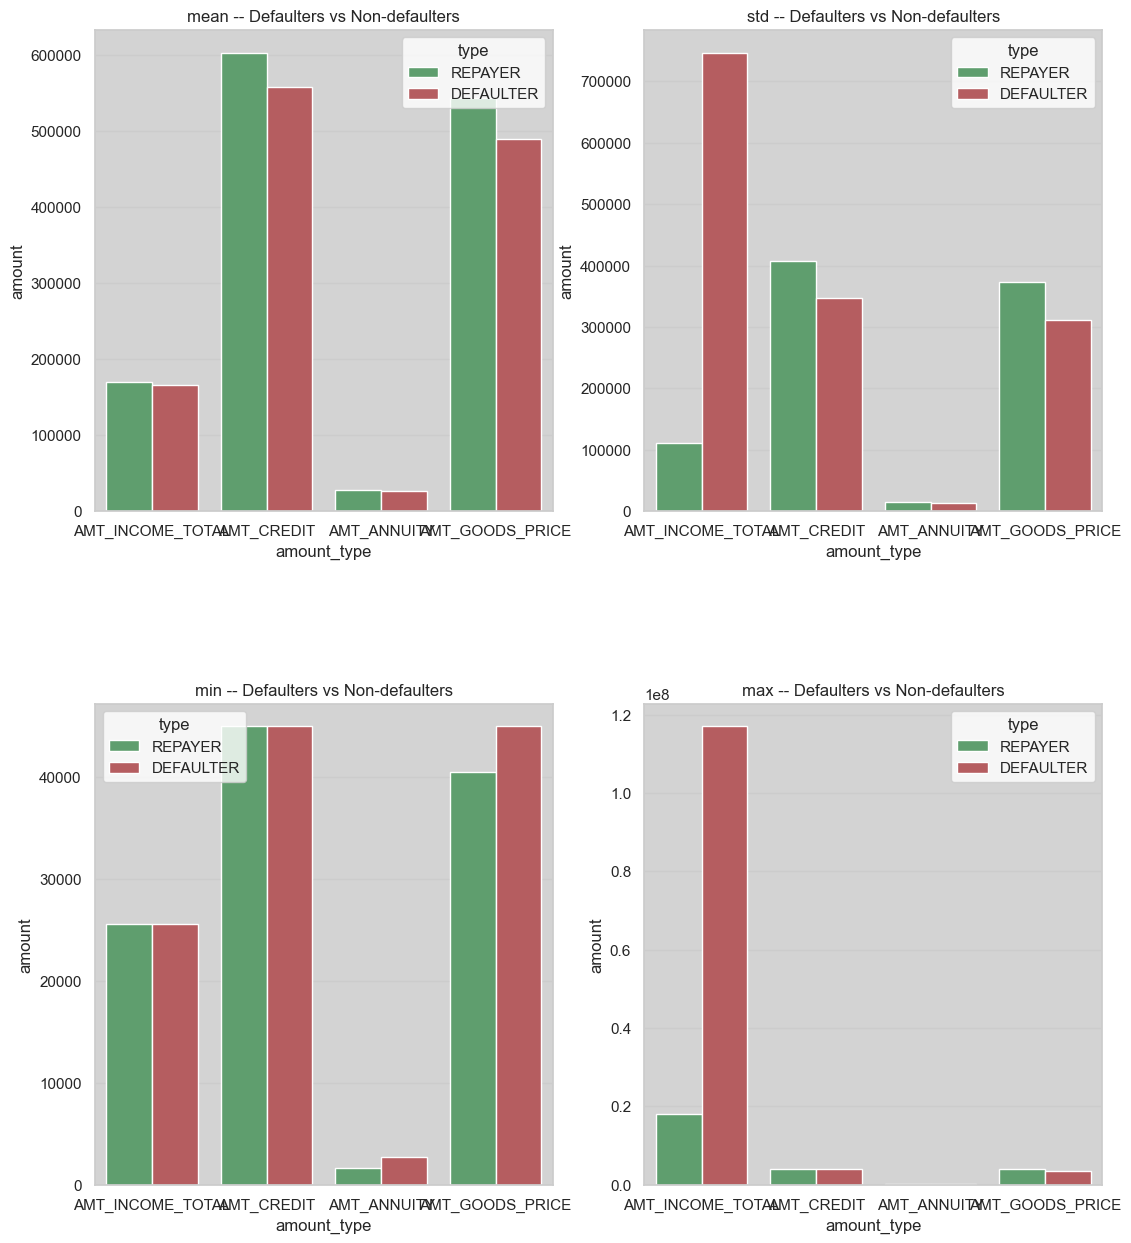

In [156]:
df = application_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin(['mean', 'std', 'min', 'max'])] 


df_x = df[["level_0", "level_1", 0]]
df_y = df[["level_0", "level_1", 1]]
df_x = df_x.rename(columns={'level_0': "amount_type", 'level_1': "statistic", 0: "amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0': "amount_type", 'level_1': "statistic", 1: "amount"})
df_y["type"] = "DEFAULTER"


df_new = pd.concat([df_x, df_y], axis=0)


stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13, 15))


for i, j in itertools.zip_longest(stat, range(length)):
    plt.subplot(2, 2, j + 1)
    sns.barplot(x="amount_type", y="amount", hue="type", data=df_new[df_new["statistic"] == i], palette=["g", "r"])
    plt.title(f"{i} -- Defaulters vs Non-defaulters")
    plt.subplots_adjust(hspace=0.4)
    plt.gca().set_facecolor("lightgrey")

plt.show()

### Point to infer from the graph

#### Income of client -

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

#### Credit amount of the loan ,Loan annuity,Amount goods price -

1 . Statistics between credit amounts,Loan annuity and Amount goods price given to cilents who default and who dont are almost similar.

## Average Income,credit,annuity & goods_price by gender


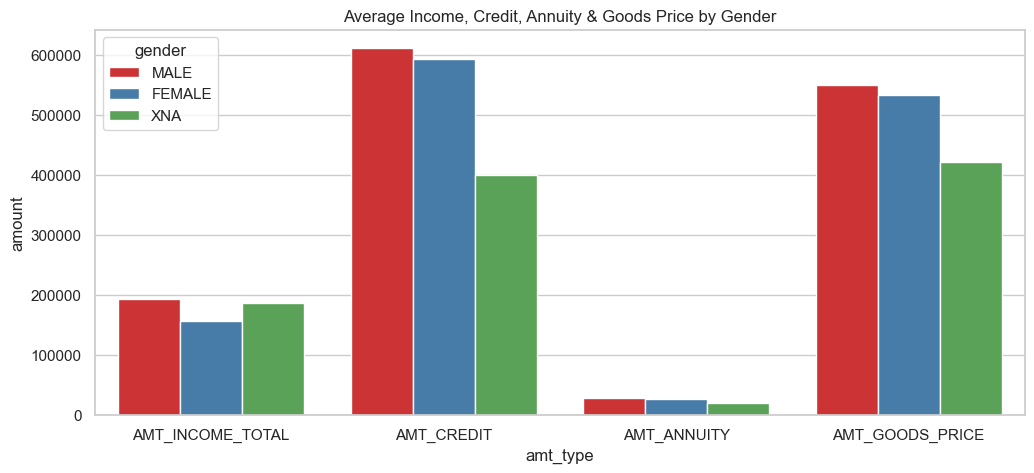

In [157]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
df1 = data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()


df_f = df1[["index", "F"]].rename(columns={'index': "amt_type", 'F': "amount"})
df_f["gender"] = "FEMALE"
df_m = df1[["index", "M"]].rename(columns={'index': "amt_type", 'M': "amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index", "XNA"]].rename(columns={'index': "amt_type", 'XNA': "amount"})
df_xna["gender"] = "XNA"


df_gen = pd.concat([df_m, df_f, df_xna], axis=0)


plt.figure(figsize=(12, 5))
ax = sns.barplot(x="amt_type", y="amount", data=df_gen, hue="gender", palette="Set1")
plt.title("Average Income, Credit, Annuity & Goods Price by Gender")
plt.show()

## Scatter plot between credit amount and annuity amount

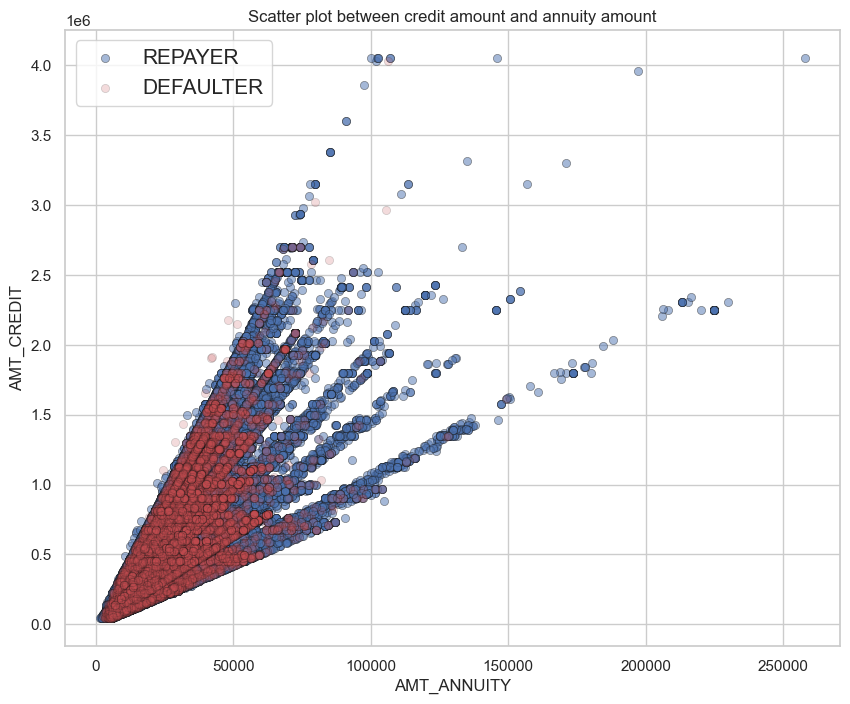

In [158]:
fig = plt.figure(figsize=(10,8))
plt.scatter(application_data[application_data["TARGET"]==0]['AMT_ANNUITY'],application_data[application_data["TARGET"]==0]['AMT_CREDIT'],s=35,
            color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(application_data[application_data["TARGET"]==1]['AMT_ANNUITY'],application_data[application_data["TARGET"]==1]['AMT_CREDIT'],s=35,
            color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

## Pair Plot between amount variables

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

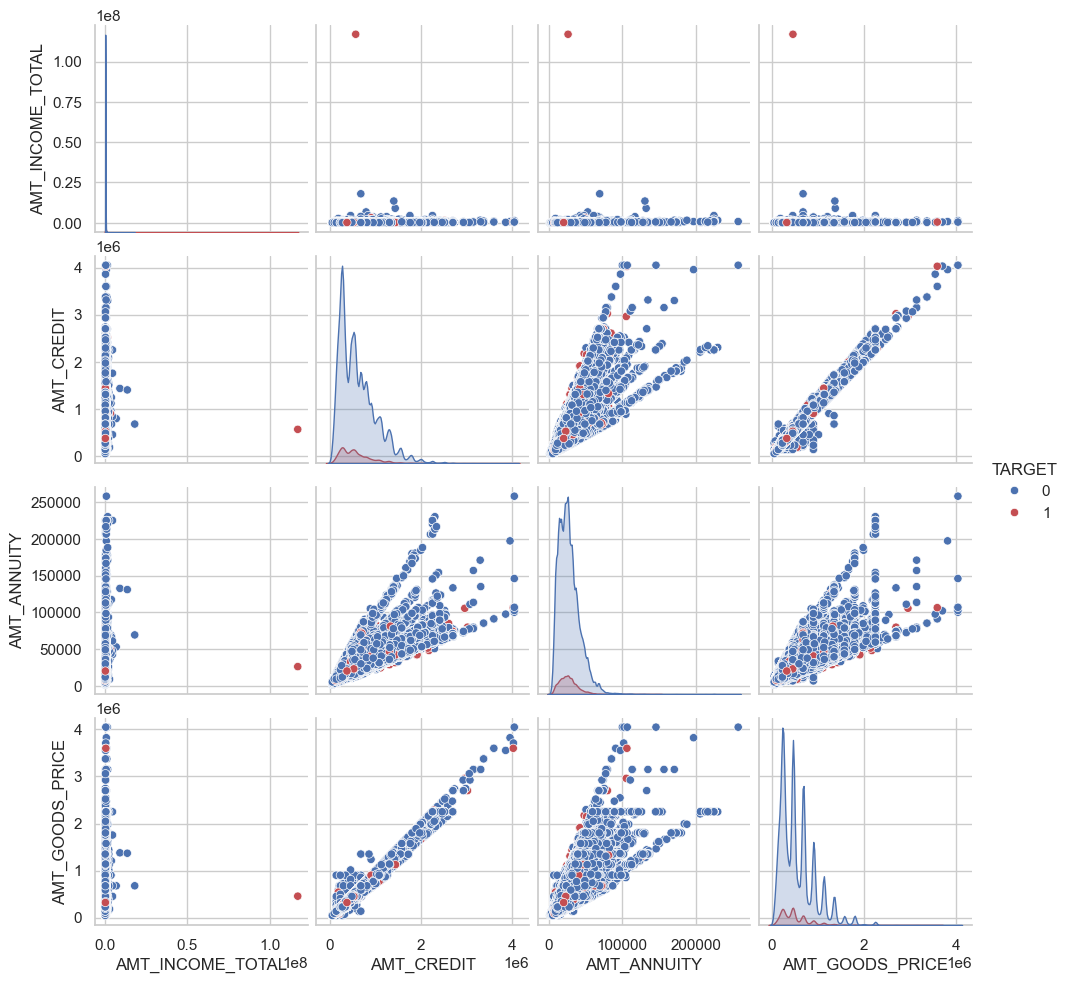

In [159]:
amt = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()


### Distribution of Education type by loan repayment status

NAME_EDUCATION_TYPE Level of highest education the client achieved..



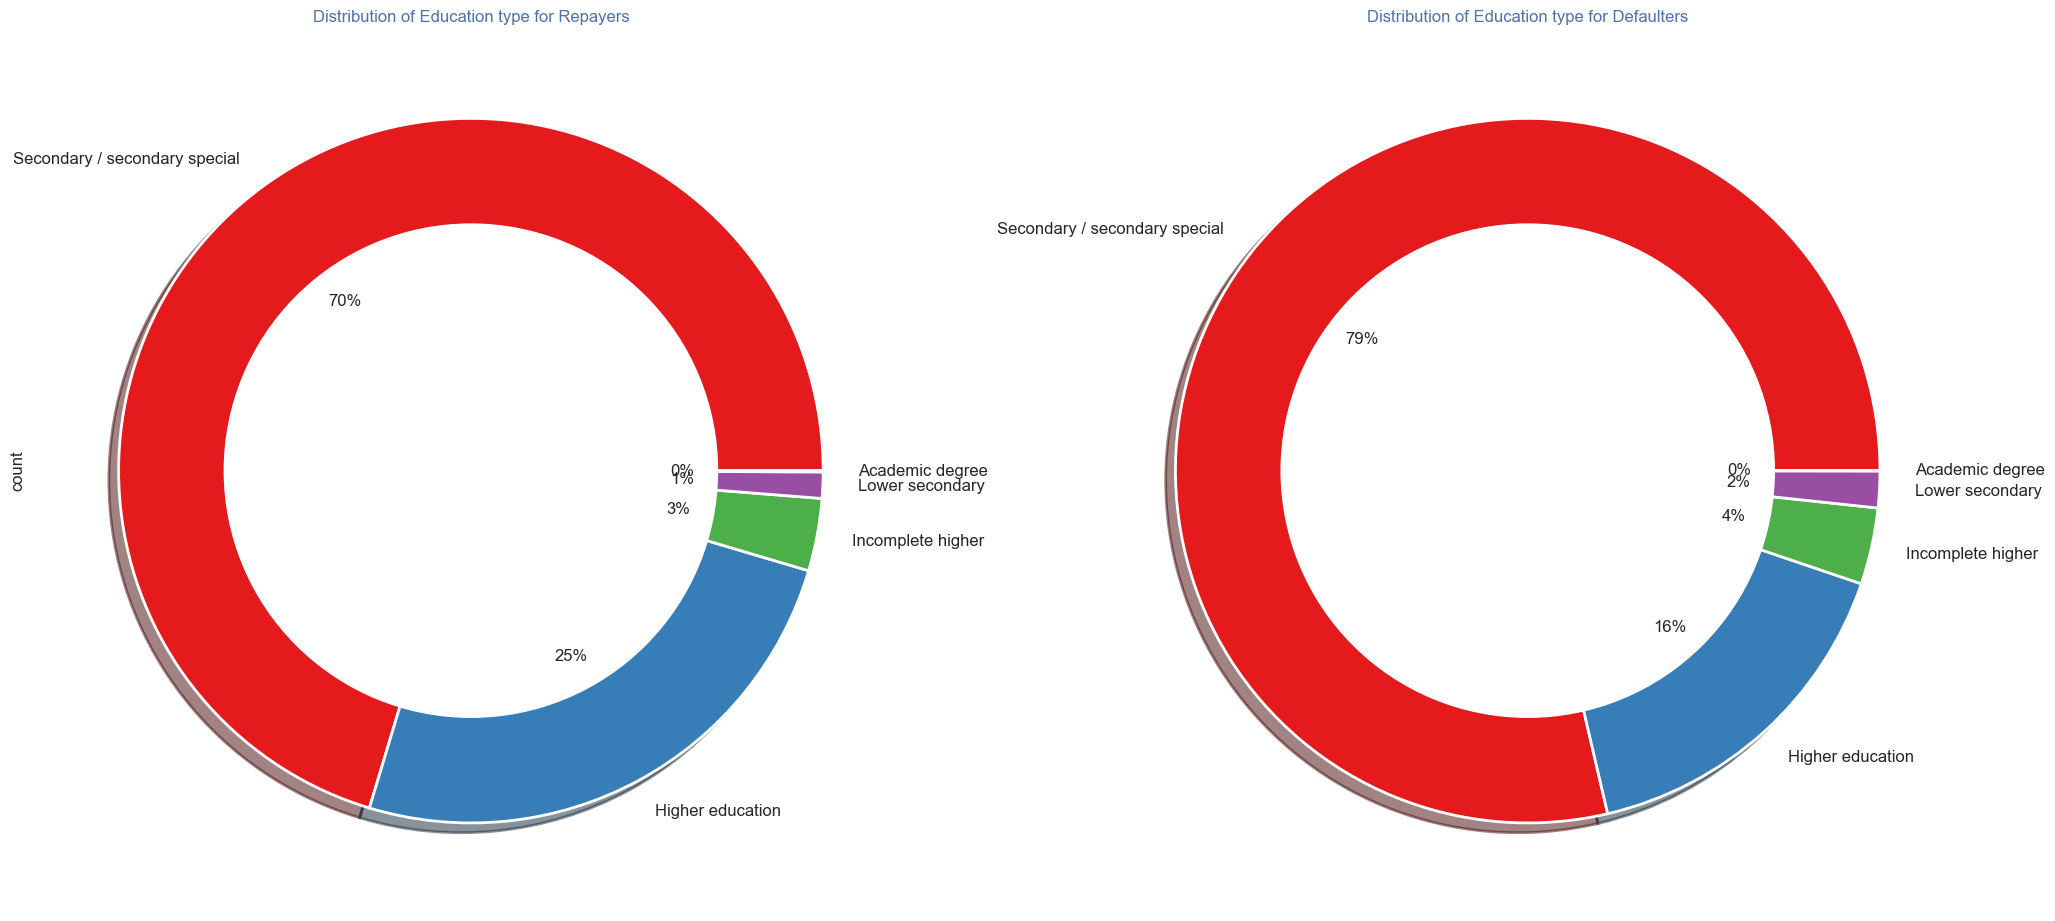

In [160]:
plt.figure(figsize=(25,25))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
                                                                                                 colors = sns.color_palette("Set1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Clients who default have proportionally 9% less higher education compared to clients who do not default.

### Average Earnings by different professions and education types

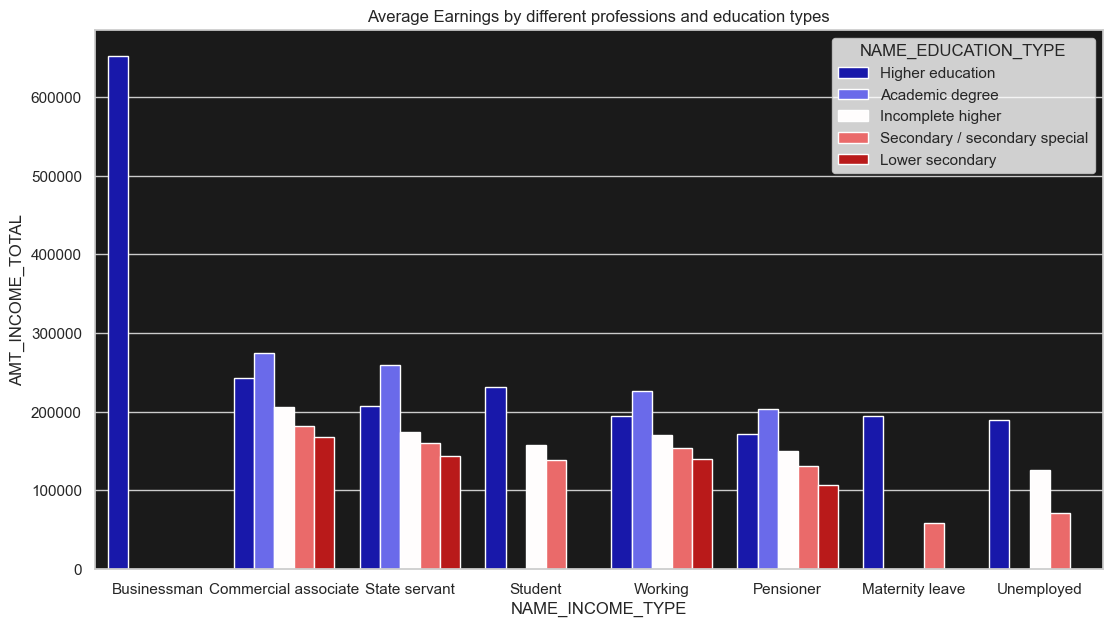

In [161]:
edu = data.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending=False)
fig = plt.figure(figsize=(13, 7))
ax = sns.barplot(x='NAME_INCOME_TYPE', y='AMT_INCOME_TOTAL', data=edu, hue='NAME_EDUCATION_TYPE', palette="seismic")
ax.set_facecolor("k")
plt.title("Average Earnings by different professions and education types")
plt.show()


### Distribution of Education type by loan repayment status

NAME_FAMILY_STATUS - Family status of the client

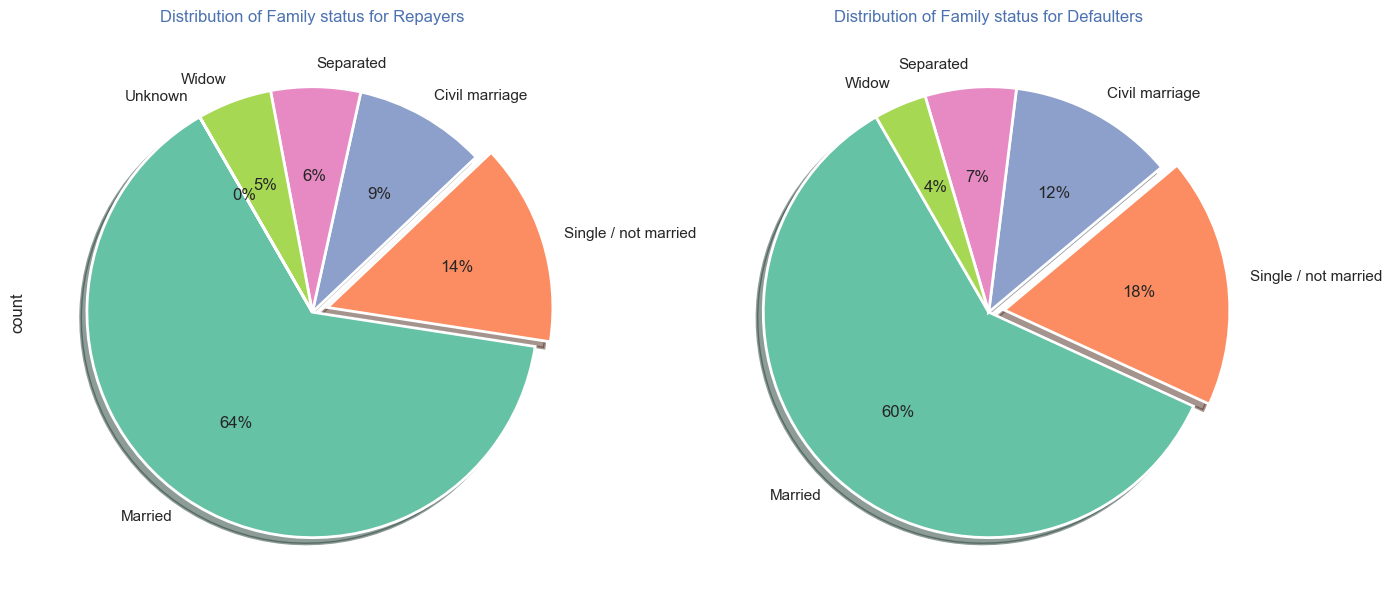

In [162]:
plt.figure(figsize=(16,8))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                             startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                    startangle=120,colors = sns.color_palette("Set2",7),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Point to infer from the graph

Percentage of single people are more in defaulters than non defaulters.


### Distribution of Housing type by loan repayment status

NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

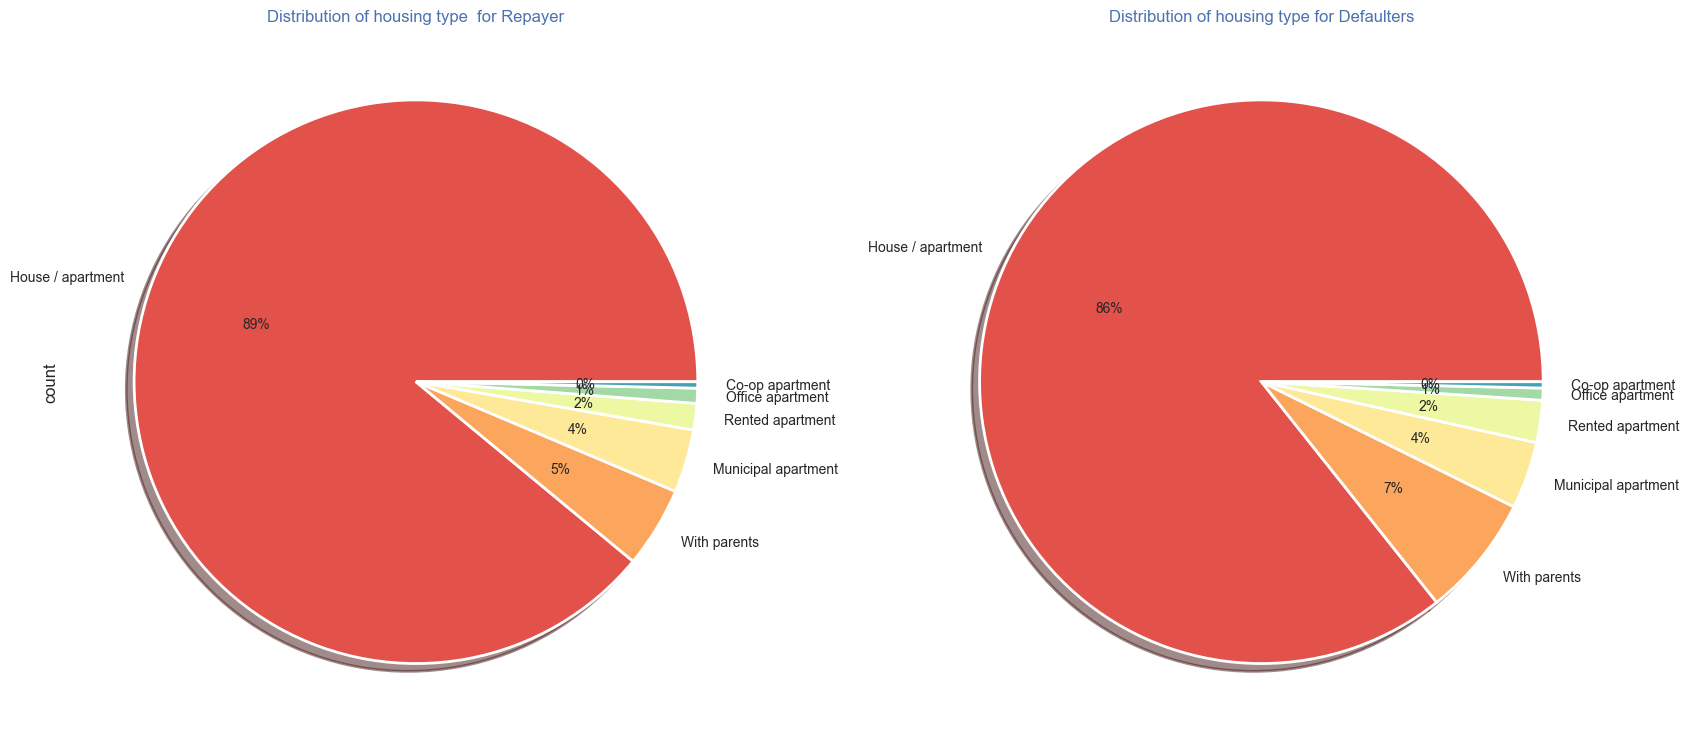

In [163]:
plt.figure(figsize=(20,20))
plt.subplot(121)
application_data[application_data["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                             colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
application_data[application_data["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
                                                    colors = sns.color_palette("Spectral"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()


### Distribution normalized population of region where client lives by loan repayment status

REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).



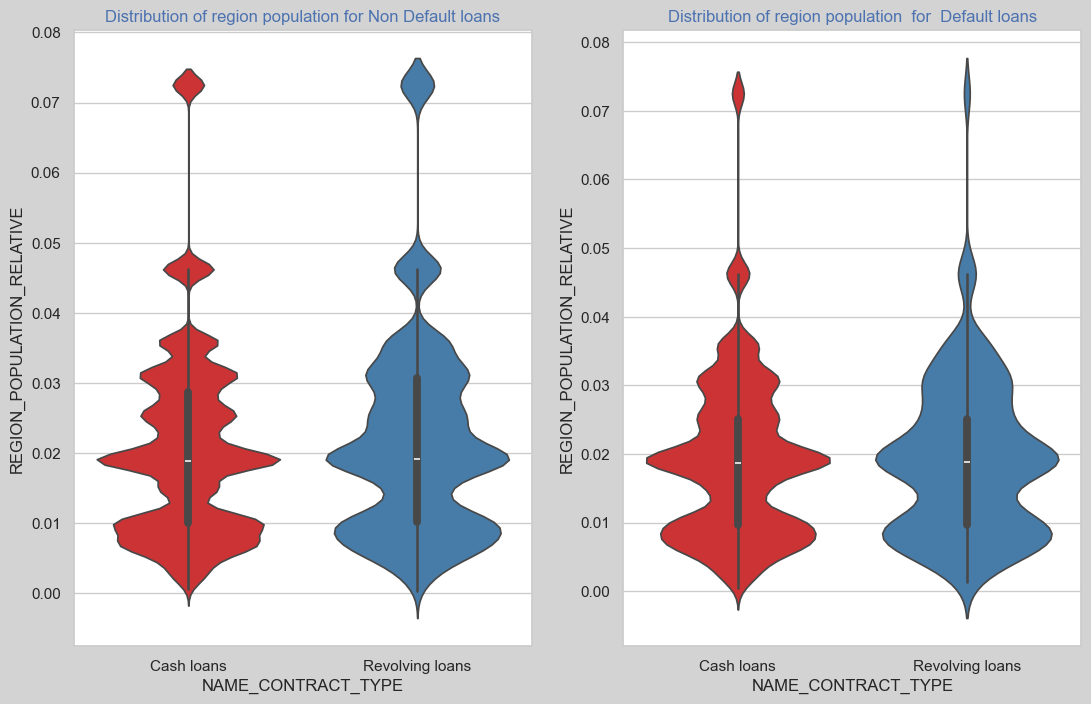

In [164]:
fig = plt.figure(figsize=(13,8))

plt.subplot(121)
sns.violinplot(y=application_data[application_data["TARGET"]==0]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==0]["NAME_CONTRACT_TYPE"],
               palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")
plt.subplot(122)
sns.violinplot(y = application_data[application_data["TARGET"]==1]["REGION_POPULATION_RELATIVE"]
               ,x=application_data[application_data["TARGET"]==1]["NAME_CONTRACT_TYPE"]
               ,palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

### Point to infer from the graph

In High population density regions people are less likely to default on loans.


### Client's age

DAYS_BIRTH - Client's age in days at the time of application.



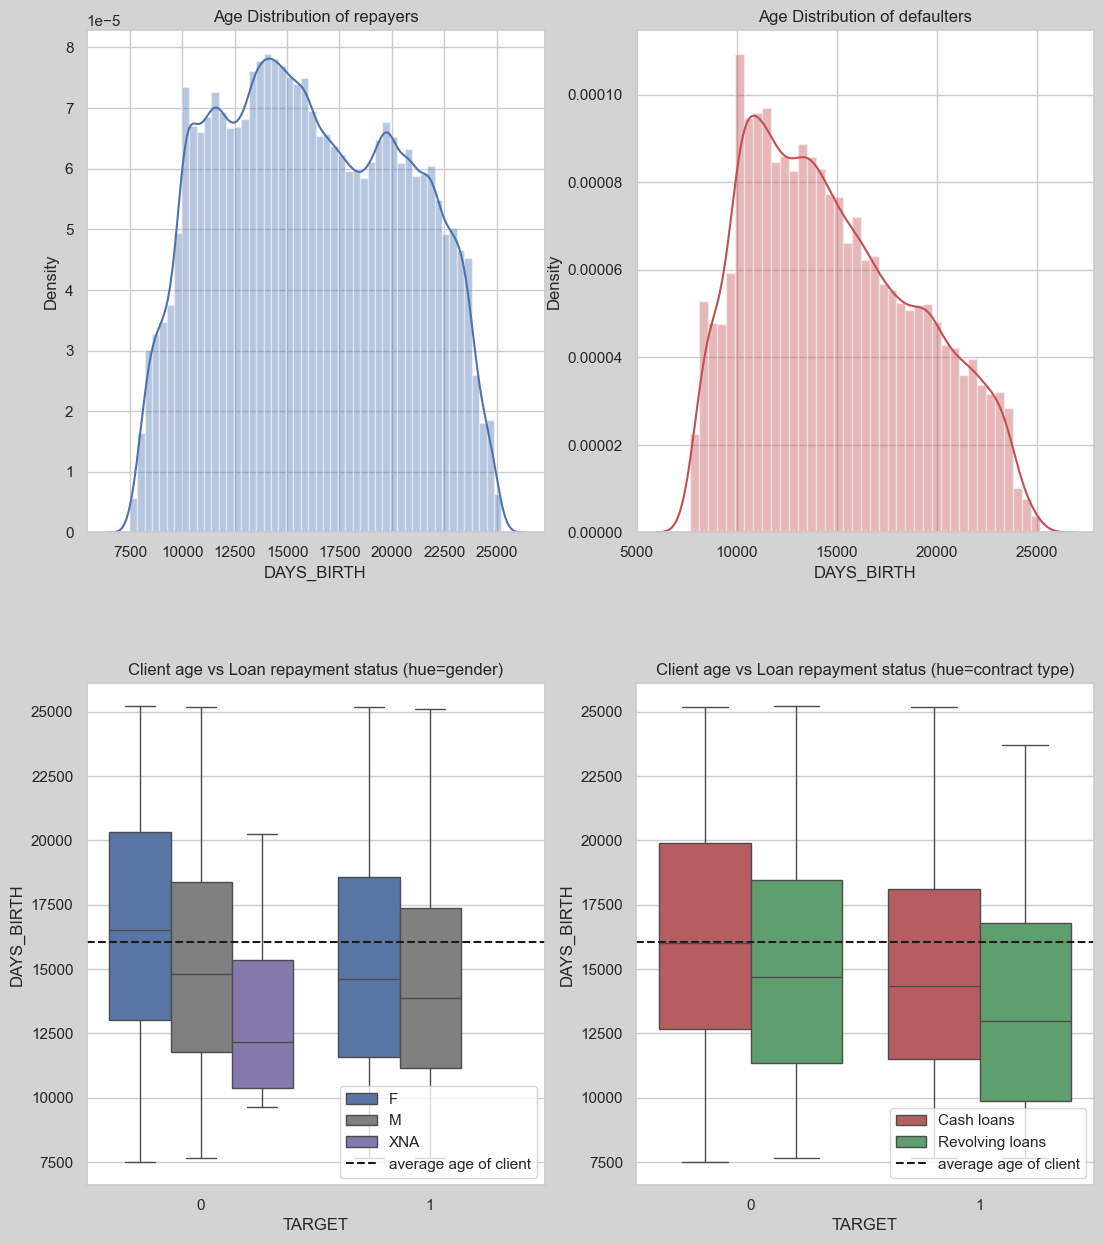

In [165]:
fig = plt.figure(figsize=(13, 15))

plt.subplot(221)
sns.distplot(application_data[application_data["TARGET"] == 0]["DAYS_BIRTH"], color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(application_data[application_data["TARGET"] == 1]["DAYS_BIRTH"], color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.boxplot(x=application_data["TARGET"], y=application_data["DAYS_BIRTH"], hue=application_data["CODE_GENDER"], palette=["b", "grey", "m"])
plt.axhline(application_data["DAYS_BIRTH"].mean(), linestyle="dashed", color="k", label="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status (hue=gender)")

plt.subplot(224)
sns.boxplot(x=application_data["TARGET"], y=application_data["DAYS_BIRTH"], hue=application_data["NAME_CONTRACT_TYPE"], palette=["r", "g"])
plt.axhline(application_data["DAYS_BIRTH"].mean(), linestyle="dashed", color="k", label="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status (hue=contract type)")

plt.subplots_adjust(wspace=0.2, hspace=0.3)

fig.set_facecolor("lightgrey")
plt.show()


### Point to infer from the graph

Average clients age is comparatively less in non repayers than repayers in every aspect.

Younger people tend to default more than elder people.

### Distribution of days employed for target variable.

DAYS_EMPLOYED - How many days before the application for target variable the person started current employment

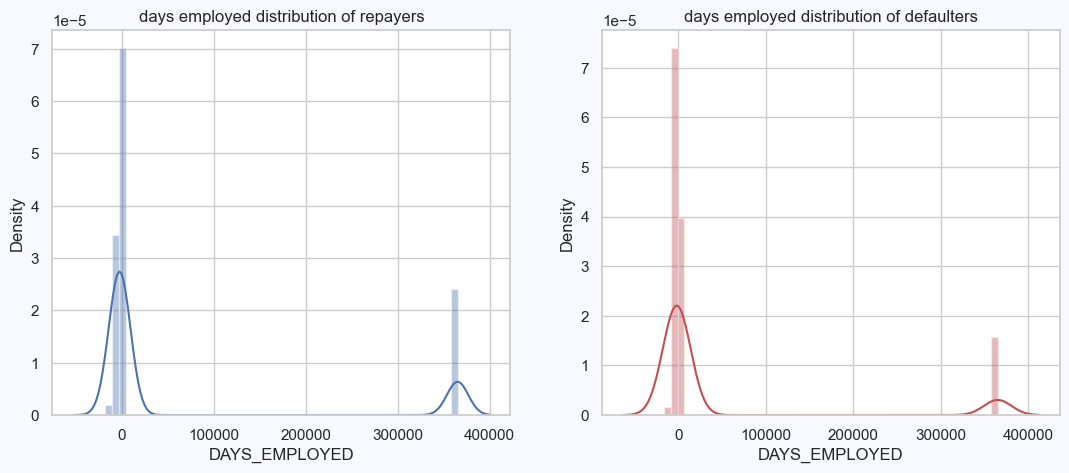

In [166]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

fig.set_facecolor("ghostwhite")

### Distribution of registration days for target variable.

DAYS_REGISTRATION How many days before the application did client change his registration

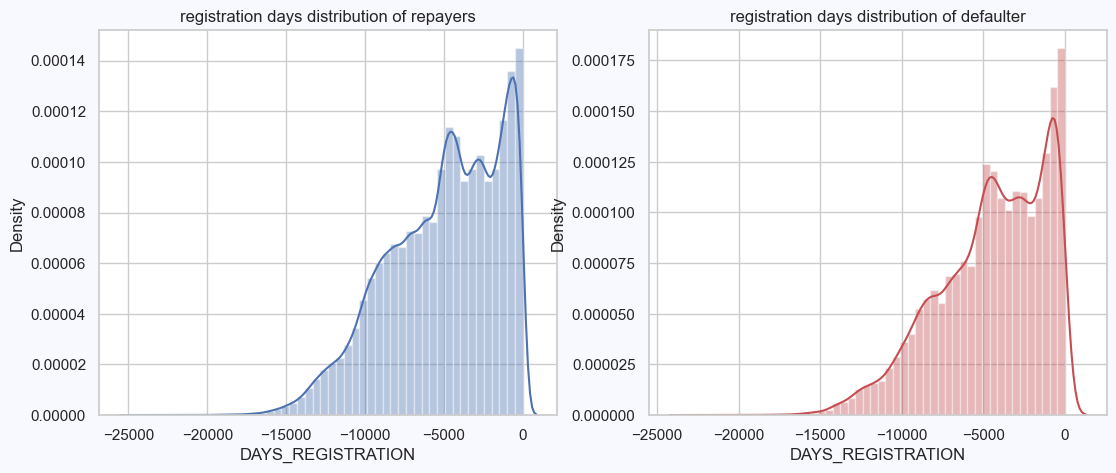

In [167]:
fig = plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(application_data[application_data["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(application_data[application_data["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")

fig.set_facecolor("ghostwhite")

### Distribution in contact information provided by client

FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

FLAG_EMP_PHONE - Did client provide work phone (1=YES, 0=NO)

FLAG_WORK_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)

FLAG_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_EMAIL - Did client provide email (1=YES, 0=NO)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

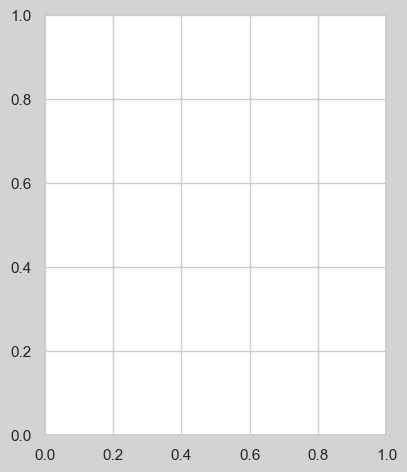

In [168]:
x   = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")


### Distribution of registration days for target variable.

REGION_RATING_CLIENT - Home credit rating of the region where client lives (1,2,3).

REGION_RATING_CLIENT_W_CITY - Home credit rating of the region where client lives with taking city into account (1,2,3). Percentage of defaulters are less in 1-rated regions compared to repayers.

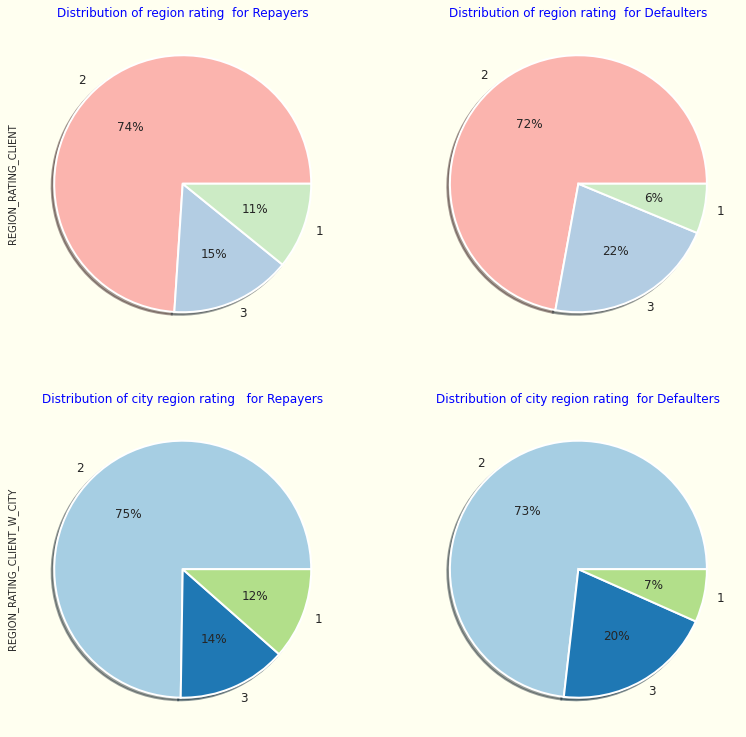

In [ ]:
fig = plt.figure(figsize=(13,13))
plt.subplot(221)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Pastel1"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
application_data[application_data["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                             colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
application_data[application_data["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
                                                    colors = sns.color_palette("Paired"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")
fig.set_facecolor("ivory")

### Point to infer from the graph

Percentage of defaulters are less in 1-rated regions compared to repayers.

Percentage of defaulters are more in 3-rated regions compared to repayers.


### Distribution in organization types for repayers and defaulters

ORGANIZATION_TYPE - Type of organization where client works.



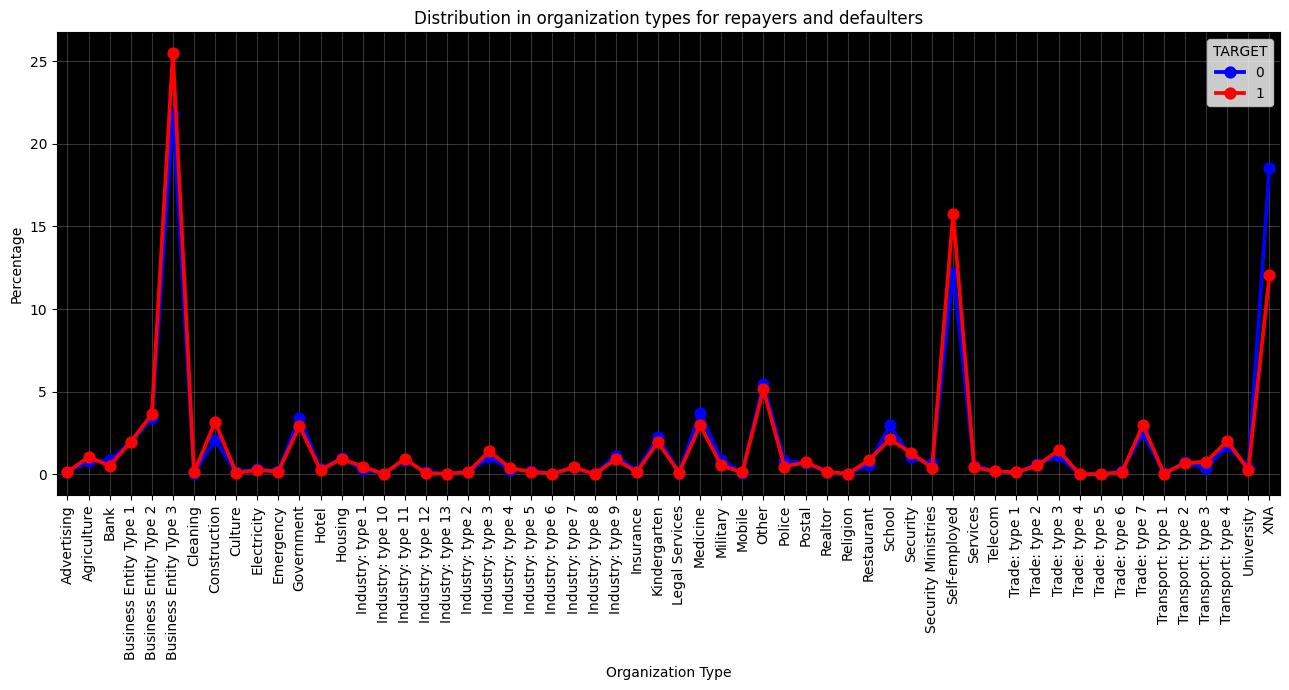

In [ ]:
org = application_data.groupby("TARGET")["ORGANIZATION_TYPE"].value_counts().unstack()

org_percentage = (org.div(org.sum(axis=1), axis=0) * 100).stack().reset_index(name="percentage")

org_percentage.rename(columns={"ORGANIZATION_TYPE": "Organization Type", "percentage": "Percentage"}, inplace=True)
org_percentage.sort_values(by=["Organization Type", "TARGET"], inplace=True)

plt.figure(figsize=(13, 7))
ax = sns.pointplot(x="Organization Type", y="Percentage", hue="TARGET", data=org_percentage, palette=["b", "r"])
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
ax.set_facecolor("k")
ax.set_title("Distribution in organization types for repayers and defaulters")
plt.tight_layout()
plt.show()

### Point to infer from the graph

Organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

### Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)

OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

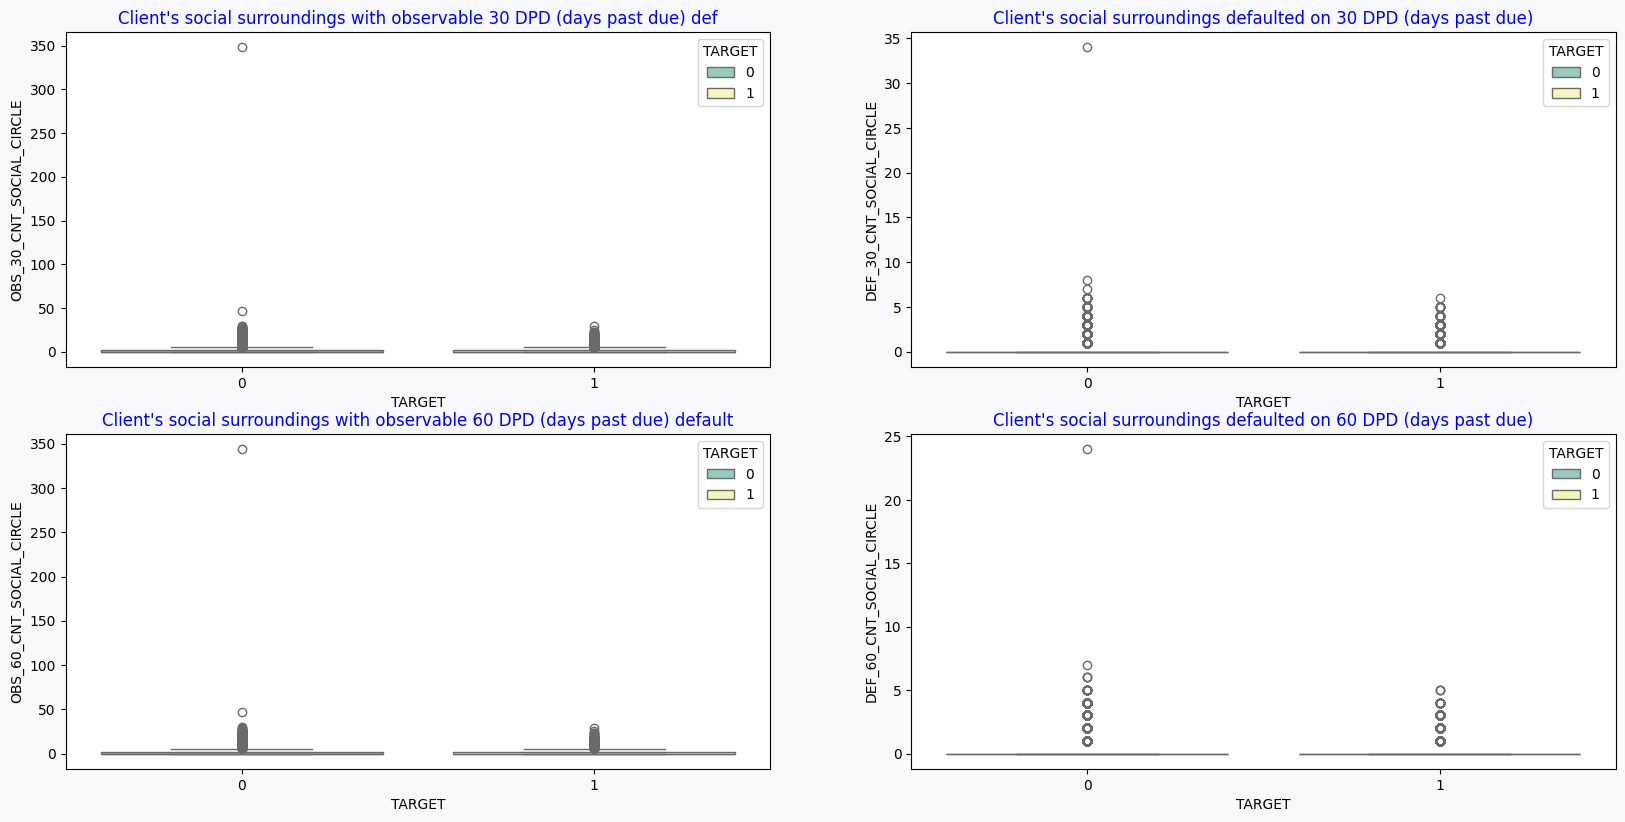

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=application_data,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")
plt.subplot(422)
sns.boxplot(data=application_data,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")
plt.subplot(423)
sns.boxplot(data=application_data,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")
plt.subplot(424)
sns.boxplot(data=application_data,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE',
            hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")
fig.set_facecolor("ghostwhite")

### Number of days before application client changed phone .

DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone.



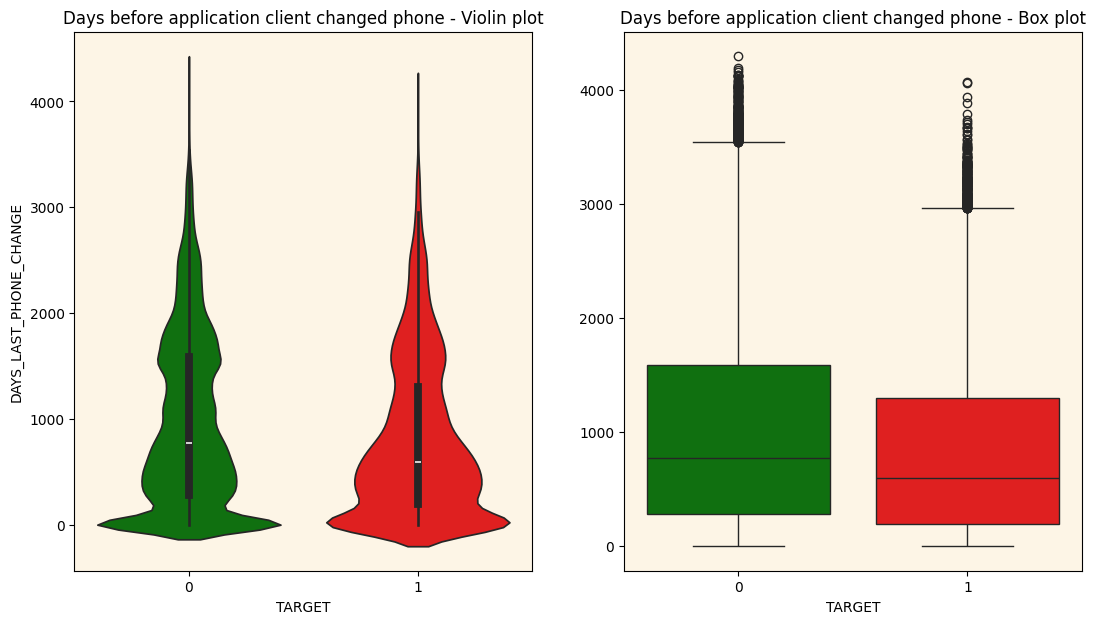

In [ ]:
plt.figure(figsize=(13, 7))

plt.subplot(121)
ax = sns.violinplot(x=application_data["TARGET"], y=application_data["DAYS_LAST_PHONE_CHANGE"], palette=["g", "r"])
ax.set_facecolor("oldlace")
ax.set_title("Days before application client changed phone - Violin plot")

plt.subplot(122)
ax1 = sns.boxplot(x=application_data["TARGET"], y=application_data["DAYS_LAST_PHONE_CHANGE"], palette=["g", "r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("Days before application client changed phone - Box plot")

plt.subplots_adjust(wspace=0.2)
plt.show()

### Point to infer from the graph

Average days of defaulters phone change is less than average days of repayers phone change.

### Documents provided by the clients.

FLAG_DOCUMENT - Did client provide documents.(1,0)

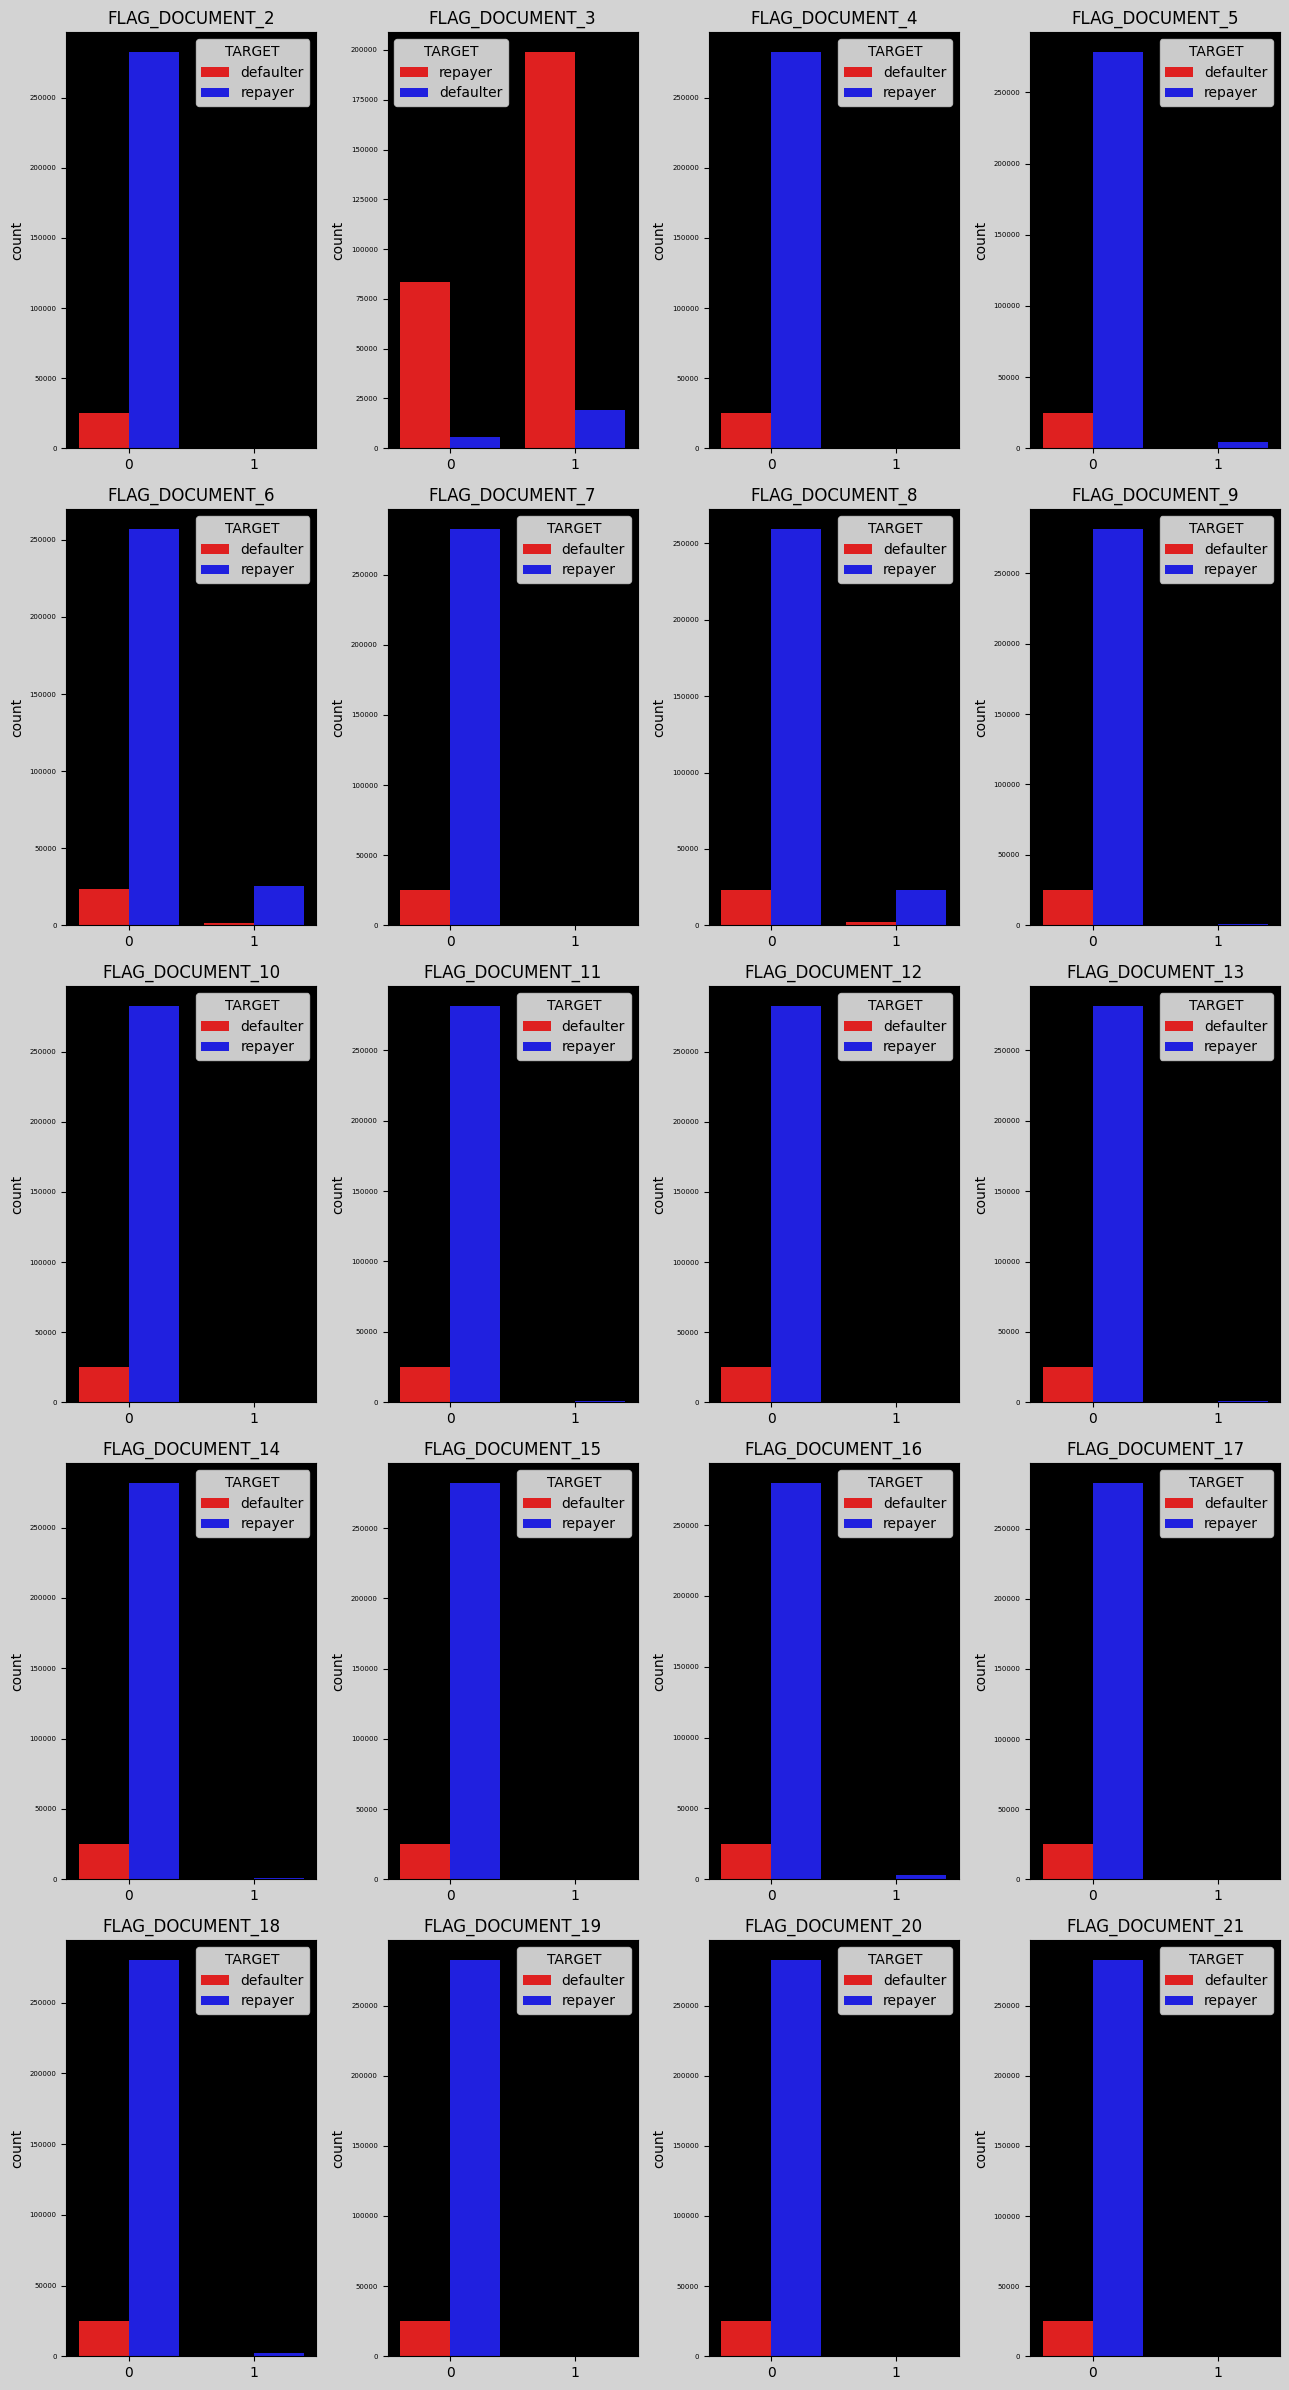

In [ ]:
df_flag = application_data[cols + ["TARGET"]]


df_flag["TARGET"] = df_flag["TARGET"].map({1: "defaulter", 0: "repayer"})


fig = plt.figure(figsize=(13, 24))
fig.set_facecolor("lightgrey")


for i, j in zip(cols, range(len(cols))):
    plt.subplot(5, 4, j + 1)
    ax = sns.countplot(data=df_flag, x=i, hue="TARGET", palette=["r", "b"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
    ax.set_facecolor("k")

plt.tight_layout()  
plt.show()

### Equiries to Credit Bureau about the client before application.

AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application.

AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

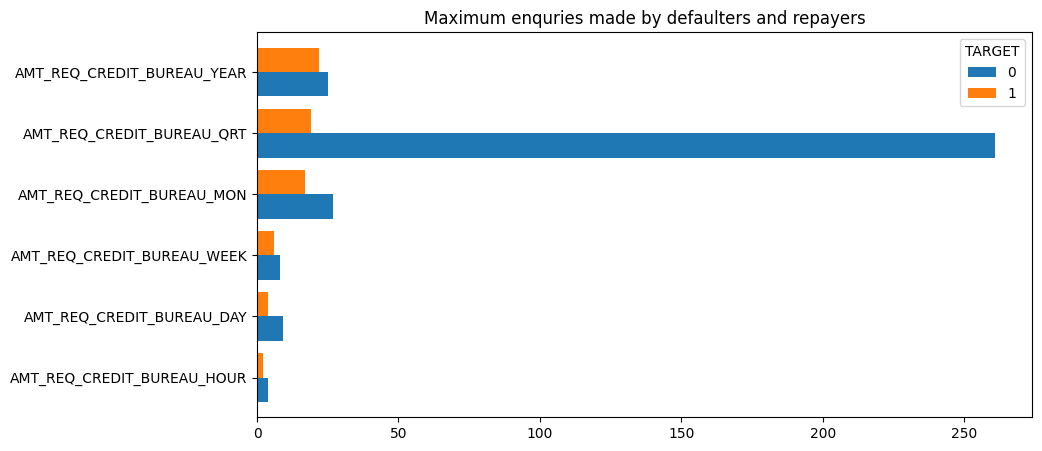

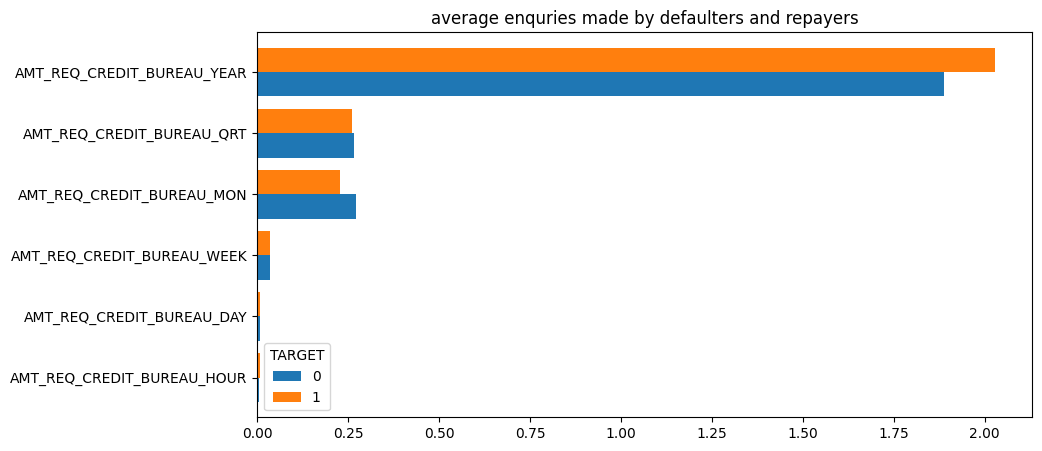

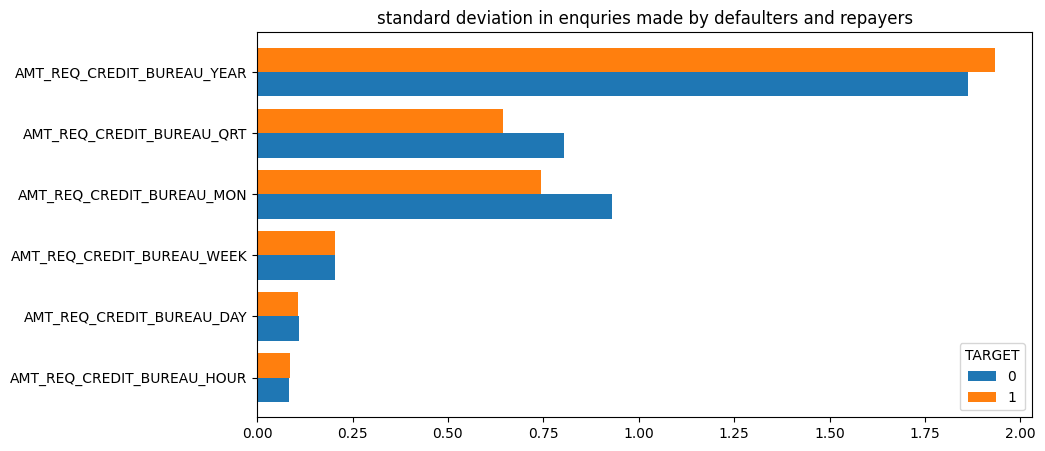

In [ ]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_data.groupby("TARGET")[cols].max().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",
                                                                  figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")
application_data.groupby("TARGET")[cols].std().transpose().plot(kind="barh",
                                                                 figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()


### Current loan id having previous loan applications.

SK_ID_PREV - ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).

SK_ID_CURR ID of loan in our sample.


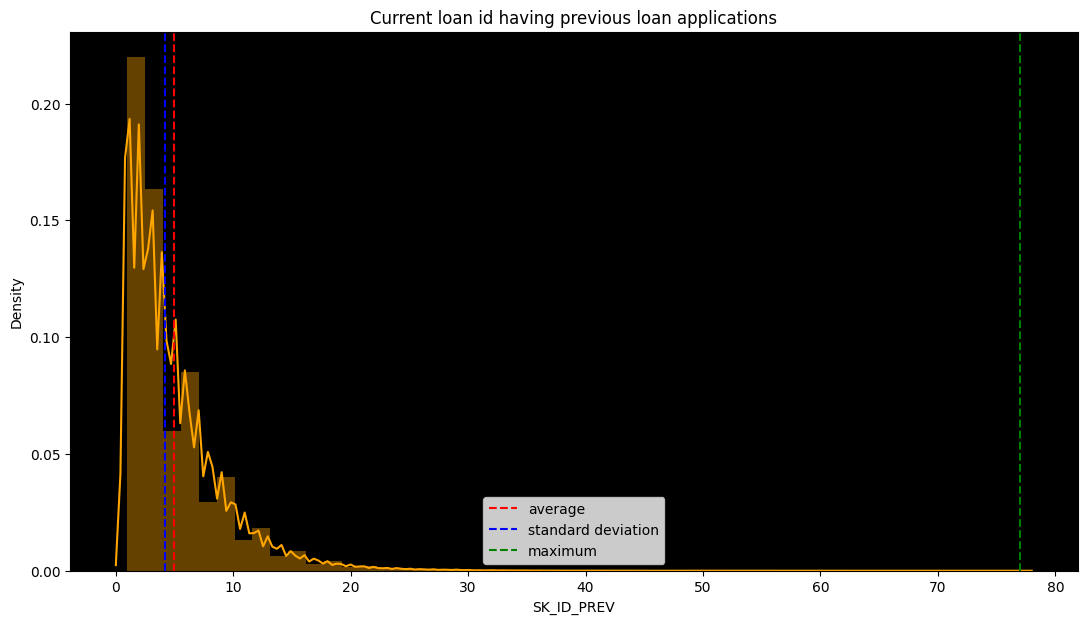

In [ ]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

### Point to infer from the graph
On average current loan ids have 4 to 5 loan applications previously


### Contract types in previous applications

NAME_CONTRACT_TYPE Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.


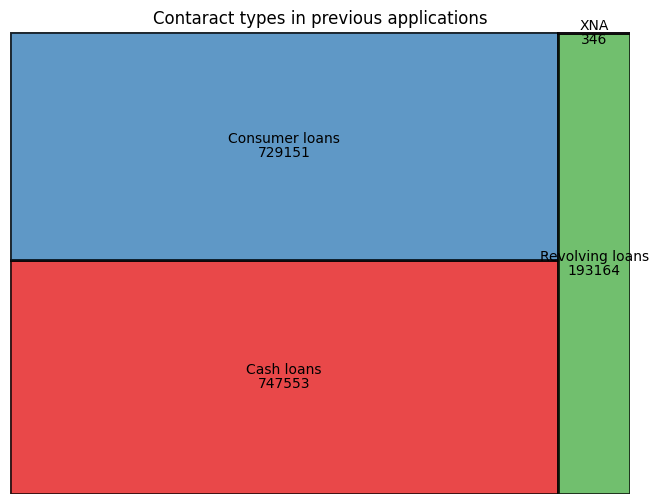

In [ ]:
cnts = previous_application["NAME_CONTRACT_TYPE"].value_counts()
import squarify
plt.figure(figsize=(8,6))
squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,edgecolor="k",alpha=.8,color=sns.color_palette("Set1"))
plt.axis("off")
plt.title("Contaract types in previous applications")
plt.show()


### Point to infer from the graph


Cash loan applications are maximum followed by consumer loan applications.

### Previous loan amounts applied and loan amounts credited.

AMT_APPLICATION-For how much credit did client ask on the previous application.

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT.

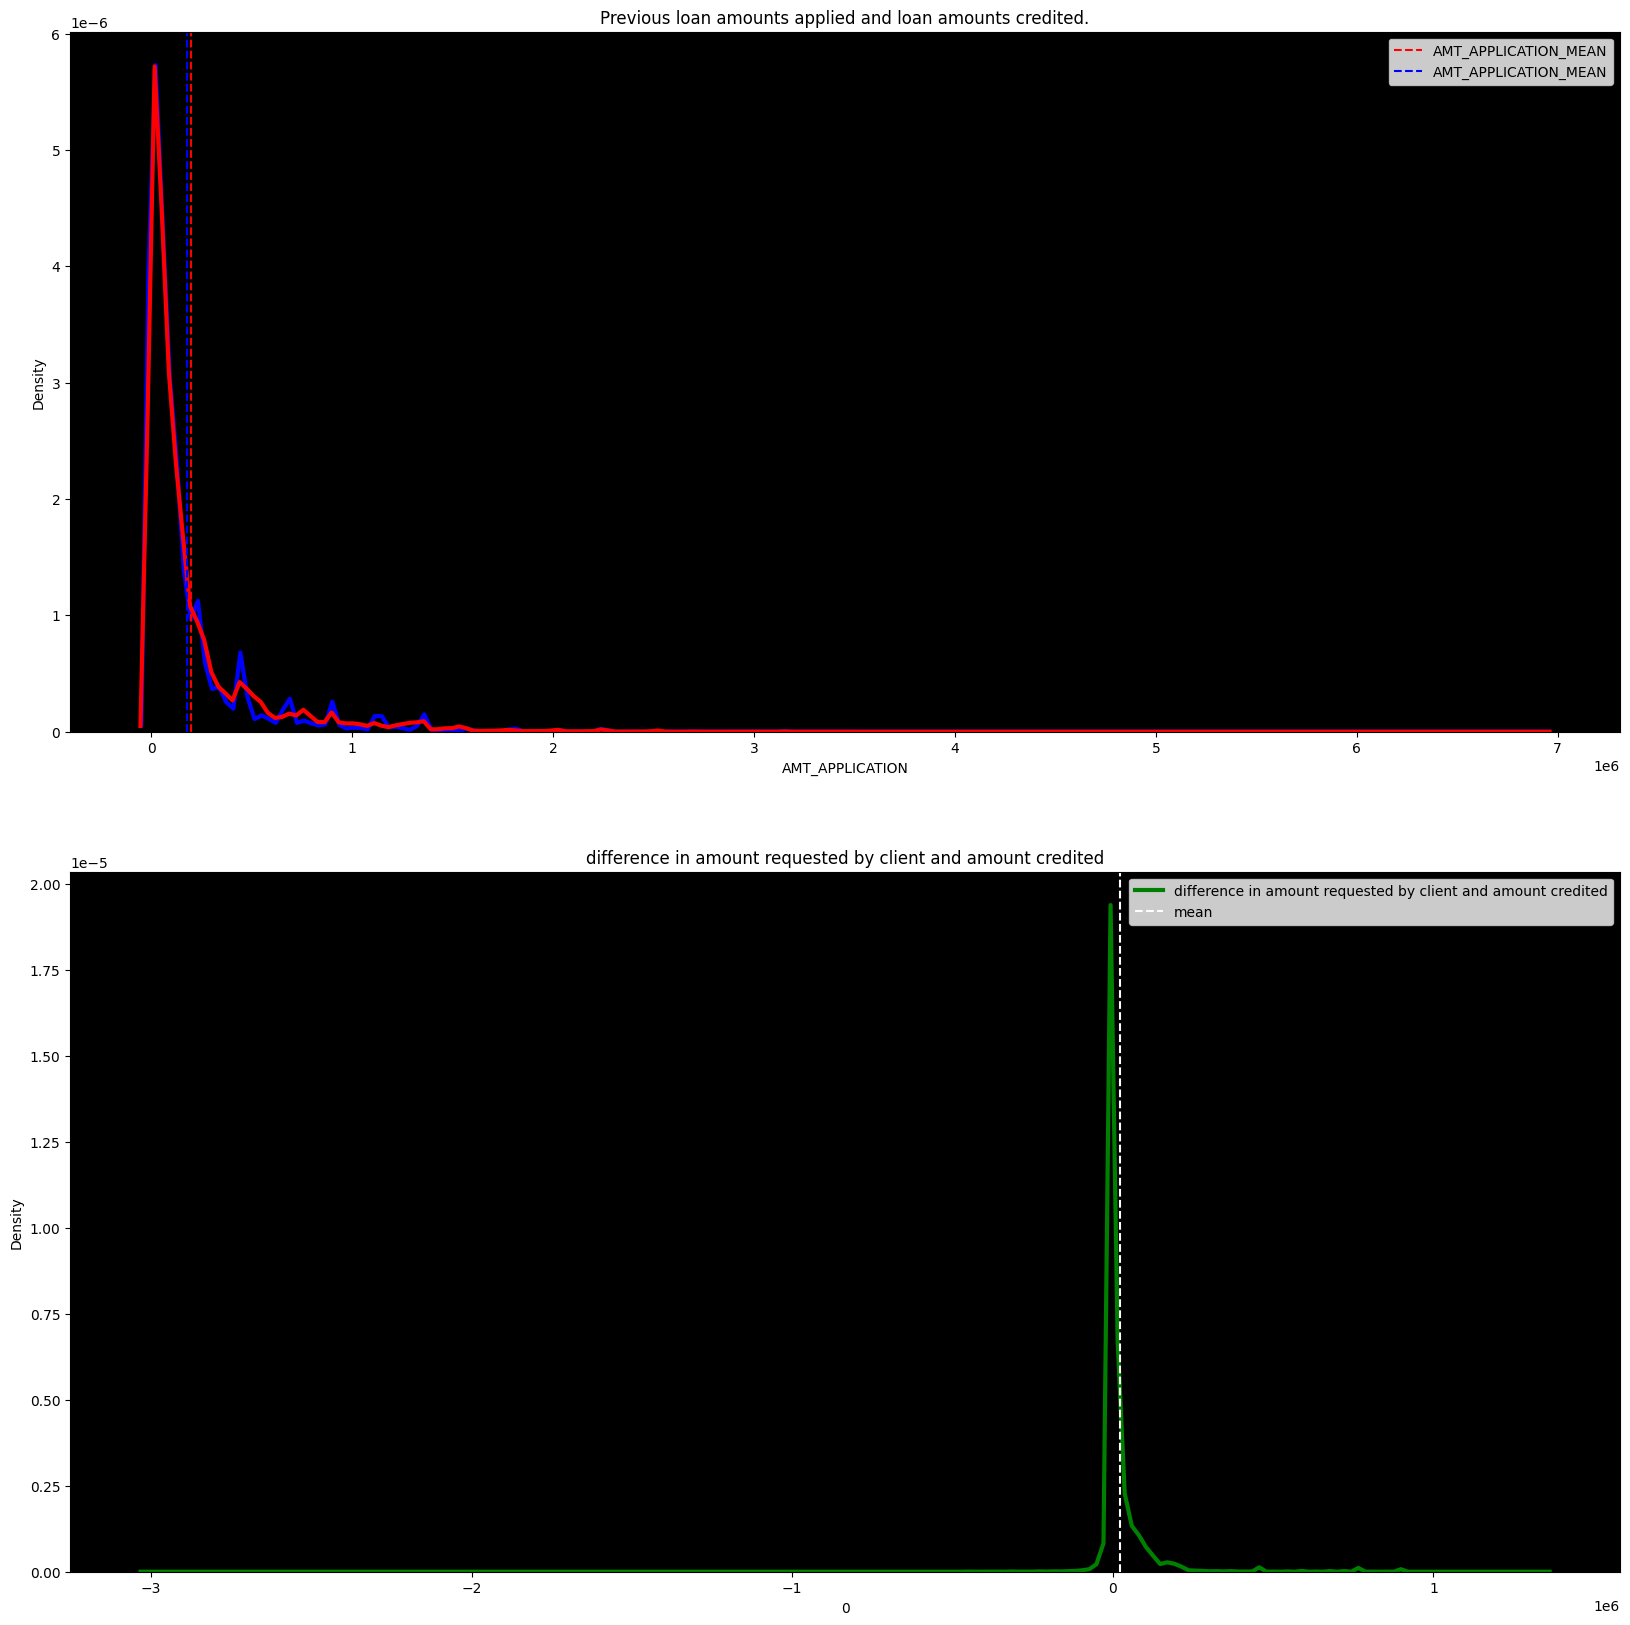

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.kdeplot(previous_application["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"],color="r",linewidth=3)
plt.axvline(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(previous_application["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")
ax.set_facecolor("k")

plt.subplot(212)
diff = (previous_application["AMT_CREDIT"] - previous_application["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")
ax1.set_facecolor("k")

### Total and average amounts applied and credited in previous applications

AMT_APPLICATION-For how much credit did client ask on the previous application. >AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

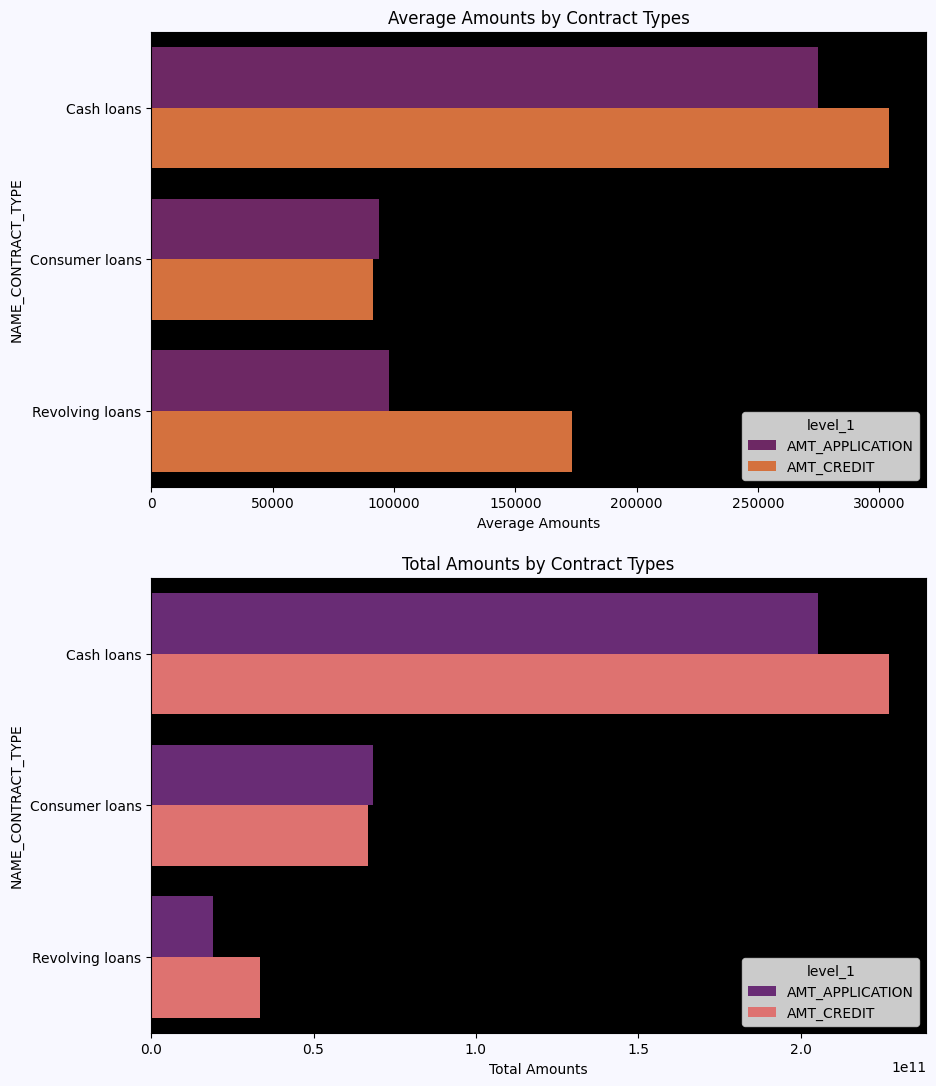

In [ ]:
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION", "AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION", "AMT_CREDIT"]].sum().stack().reset_index()

fig = plt.figure(figsize=(10, 13))
fig.set_facecolor("ghostwhite")

plt.subplot(211)
ax = sns.barplot(x=0, y="NAME_CONTRACT_TYPE", data=mn[:6], hue="level_1", palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("Average Amounts")
ax.set_title("Average Amounts by Contract Types")

plt.subplot(212)
ax1 = sns.barplot(x=0, y="NAME_CONTRACT_TYPE", data=tt[:6], hue="level_1", palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("Total Amounts")
ax1.set_title("Total Amounts by Contract Types")

plt.subplots_adjust(hspace=0.2)
plt.show()

### Annuity of previous application

AMT_ANNUITY - Annuity of previous application

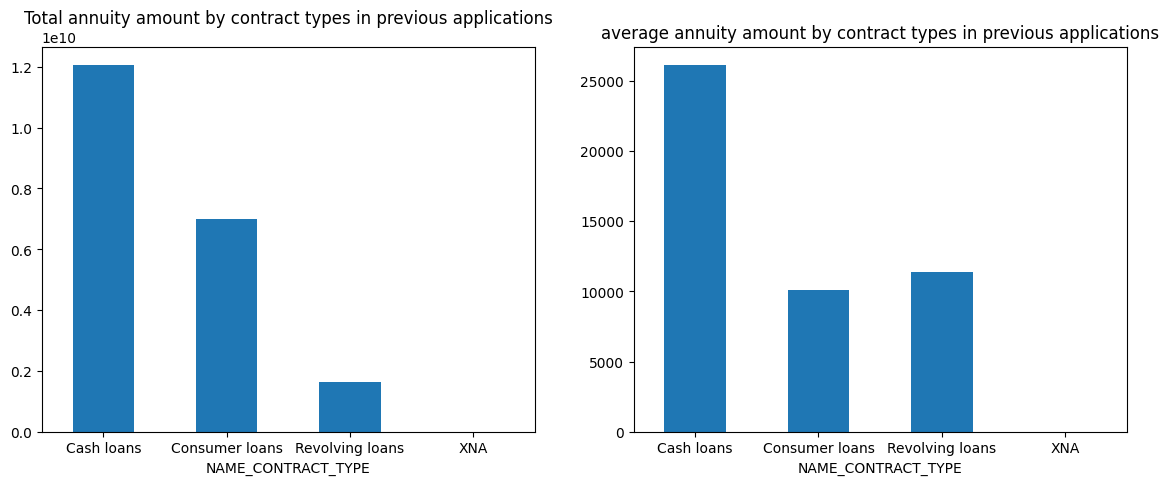

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(121)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()


### Count of application status by application type.

NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.



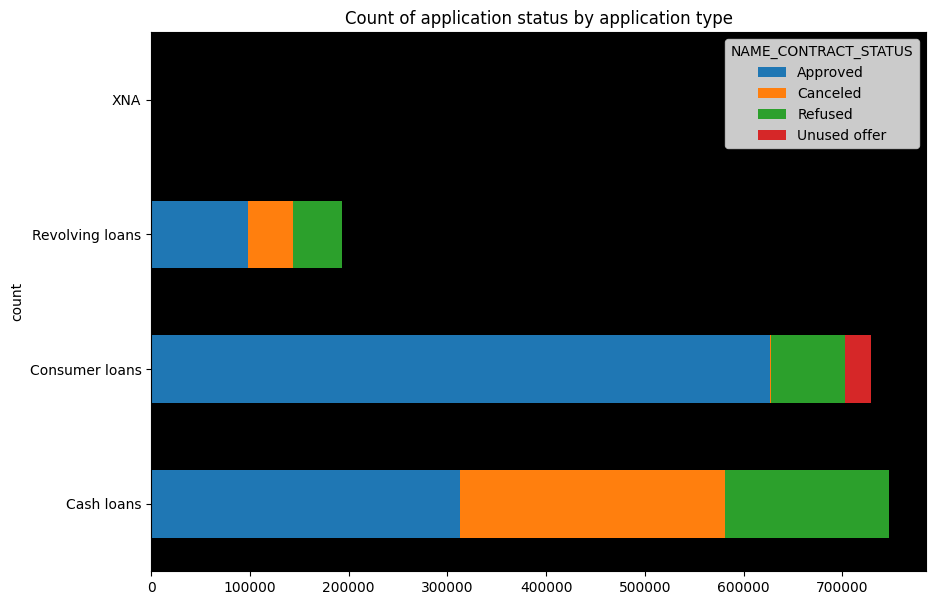

In [ ]:
ax = pd.crosstab(previous_application["NAME_CONTRACT_TYPE"],previous_application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

### Point to infer from the graph

Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

### Contract status by weekdays

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

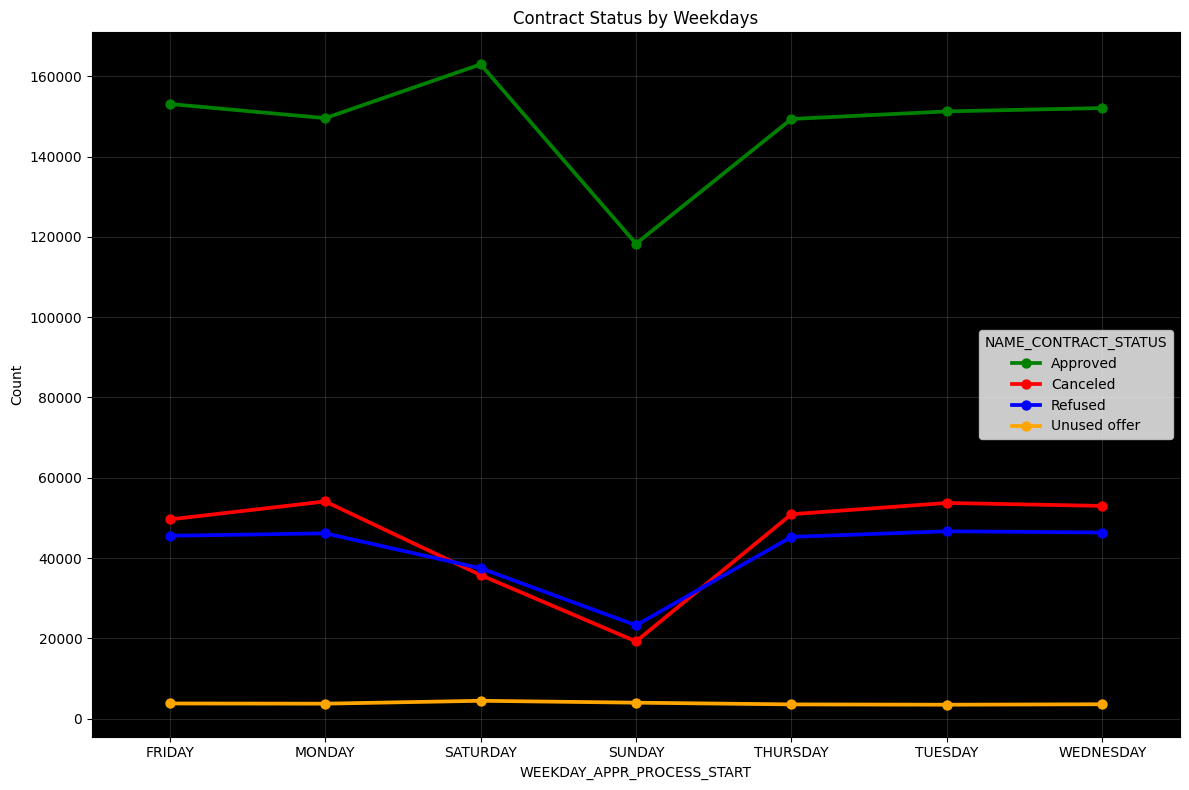

In [ ]:
hr = pd.crosstab(previous_application["WEEKDAY_APPR_PROCESS_START"], previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.pointplot(x="WEEKDAY_APPR_PROCESS_START", y=0, hue="NAME_CONTRACT_STATUS", data=hr, palette=["g", "r", "b", "orange"], scale=1)
ax.set_facecolor("k")
ax.set_ylabel("Count")
ax.set_title("Contract Status by Weekdays")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### Contract status by hour of the day

HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.



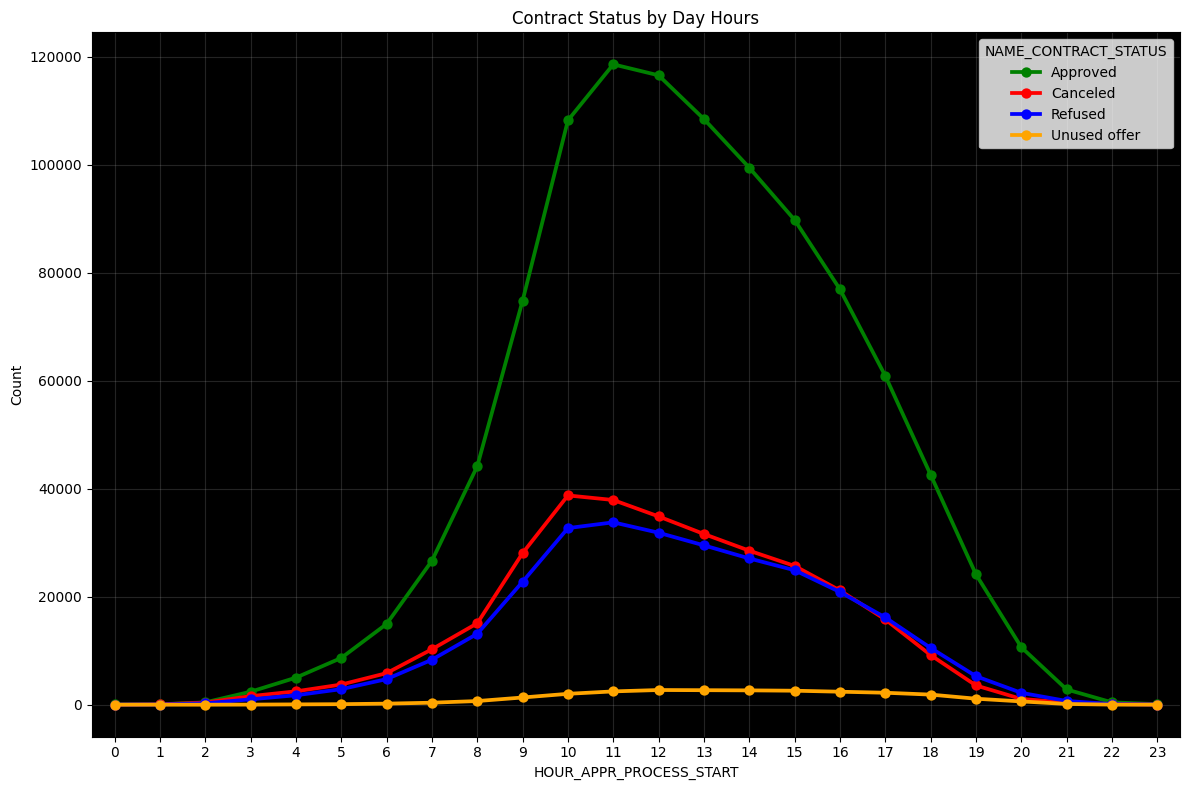

In [ ]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"], previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()

plt.figure(figsize=(12, 8))
ax = sns.pointplot(x="HOUR_APPR_PROCESS_START", y=0, hue="NAME_CONTRACT_STATUS", data=hr, palette=["g", "r", "b", "orange"], scale=1)
ax.set_facecolor("k")
ax.set_ylabel("Count")
ax.set_title("Contract Status by Day Hours")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### Point to infer from the graph

Morning 11'o clock have maximum number of approvals.

Morning 10'o clock have maximum number of refused and cancelled contracts.

### Peak hours for week days for applying loans.

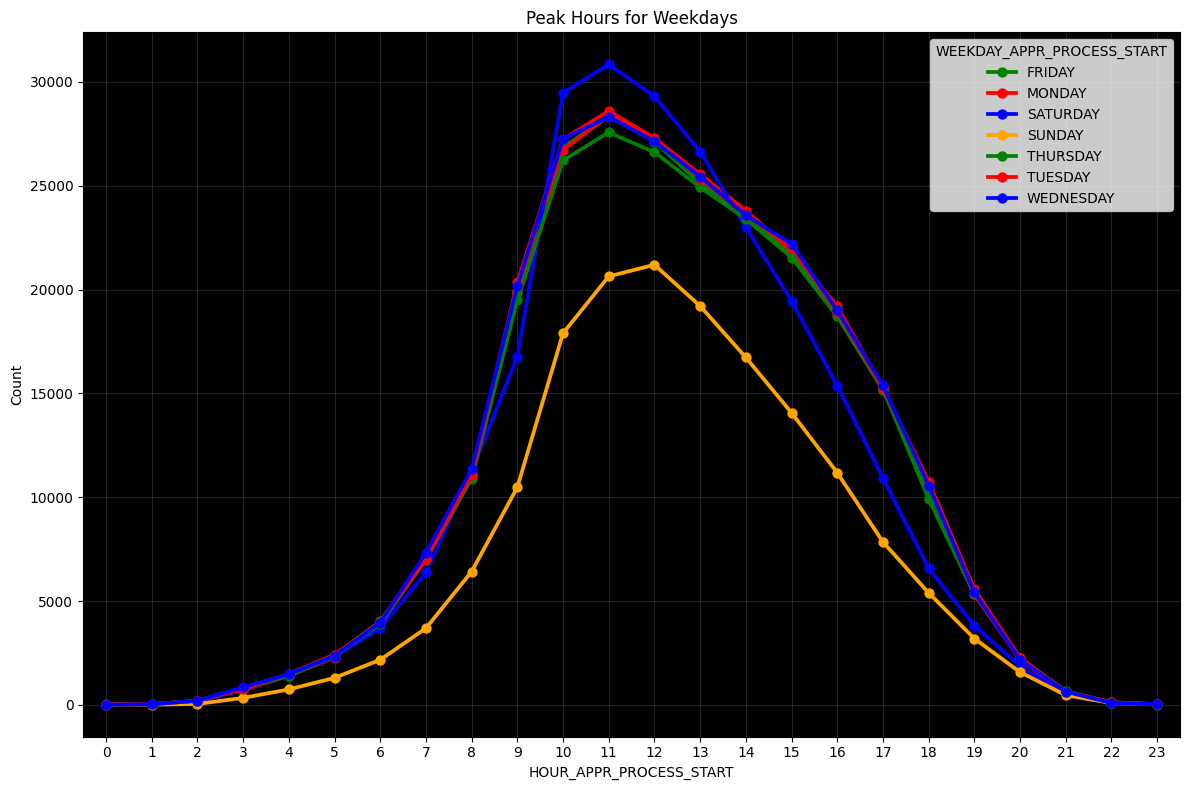

In [ ]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"], previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(12, 8))
ax = sns.pointplot(x="HOUR_APPR_PROCESS_START", y=0, hue="WEEKDAY_APPR_PROCESS_START", data=hr, palette=["g", "r", "b", "orange"], scale=1)
ax.set_facecolor("k")
ax.set_ylabel("Count")
ax.set_title("Peak Hours for Weekdays")
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


### Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.



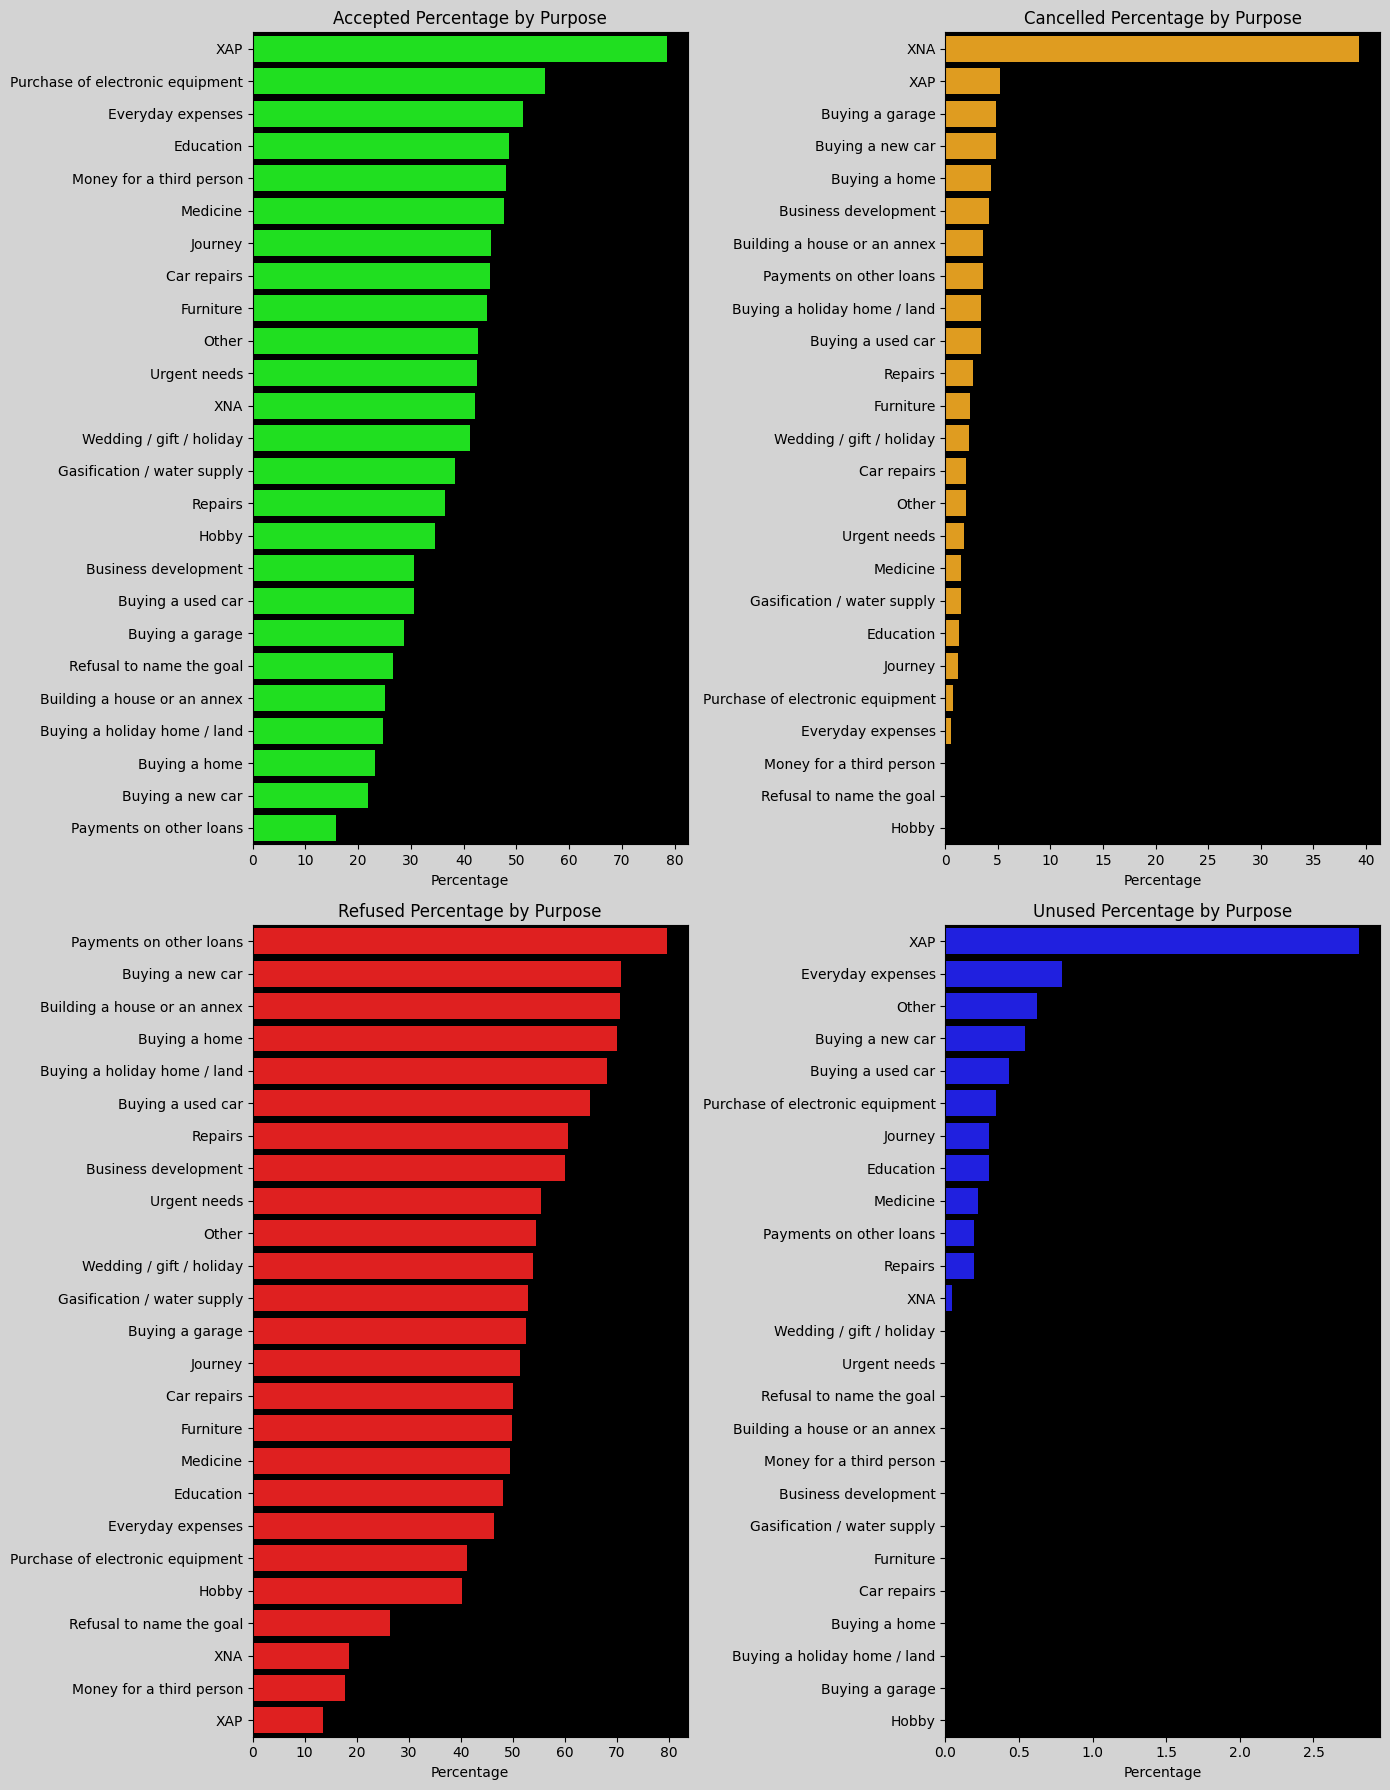

In [ ]:
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"], previous_application["NAME_CONTRACT_STATUS"])

# Calculating percentages
purpose["accepted_percentage"] = (purpose["Approved"] * 100) / (purpose.sum(axis=1))
purpose["cancelled_percentage"] = (purpose["Canceled"] * 100) / (purpose.sum(axis=1))
purpose["refused_percentage"] = (purpose["Refused"] * 100) / (purpose.sum(axis=1))
purpose["unused_percentage"] = (purpose["Unused offer"] * 100) / (purpose.sum(axis=1))

# Reshaping the DataFrame
purpose_new = purpose[["accepted_percentage", "cancelled_percentage", "refused_percentage", "unused_percentage"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({
    "accepted_percentage": "Accepted Percentage",
    "cancelled_percentage": "Cancelled Percentage",
    "refused_percentage": "Refused Percentage",
    "unused_percentage": "Unused Percentage"
})

# Plotting
lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
cs = ["lime", "orange", "r", "b"]

fig = plt.figure(figsize=(14, 18))
fig.set_facecolor("lightgrey")

for i, j, k in zip(lst, range(len(lst)), cs):
    plt.subplot(2, 2, j + 1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(x=0, y="NAME_CASH_LOAN_PURPOSE", data=dat.sort_values(by=0, ascending=False), color=k)
    plt.ylabel("")
    plt.xlabel("Percentage")
    plt.title(i + " by Purpose")
    plt.subplots_adjust(wspace=0.7)
    ax.set_facecolor("k")

plt.tight_layout()
plt.show()

### Point to infer from the graph
Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

40% of XNA purpose loans are cancalled.

### Contract status relative to decision made about previous application.

DAYS_DECISION - Relative to current application when was the decision about previous application made.



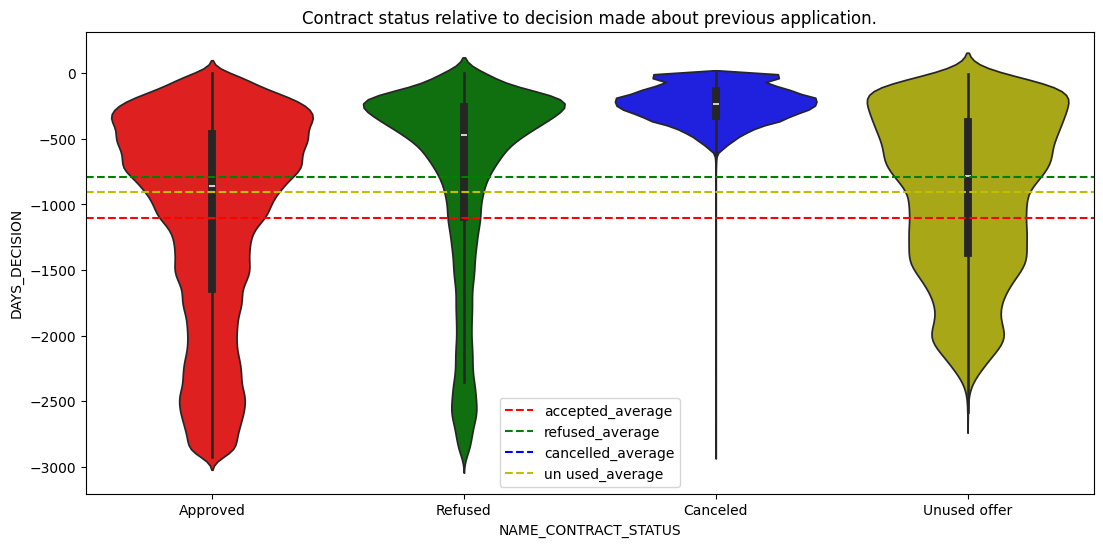

In [ ]:
plt.figure(figsize=(13,6))
sns.violinplot(y= previous_application["DAYS_DECISION"],
               x = previous_application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

### Point to infer from the graph

On average approved contract types have higher number of decision days compared to cancelled and refused contracts.


#### Distribution in Client suite type & client type.

NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.



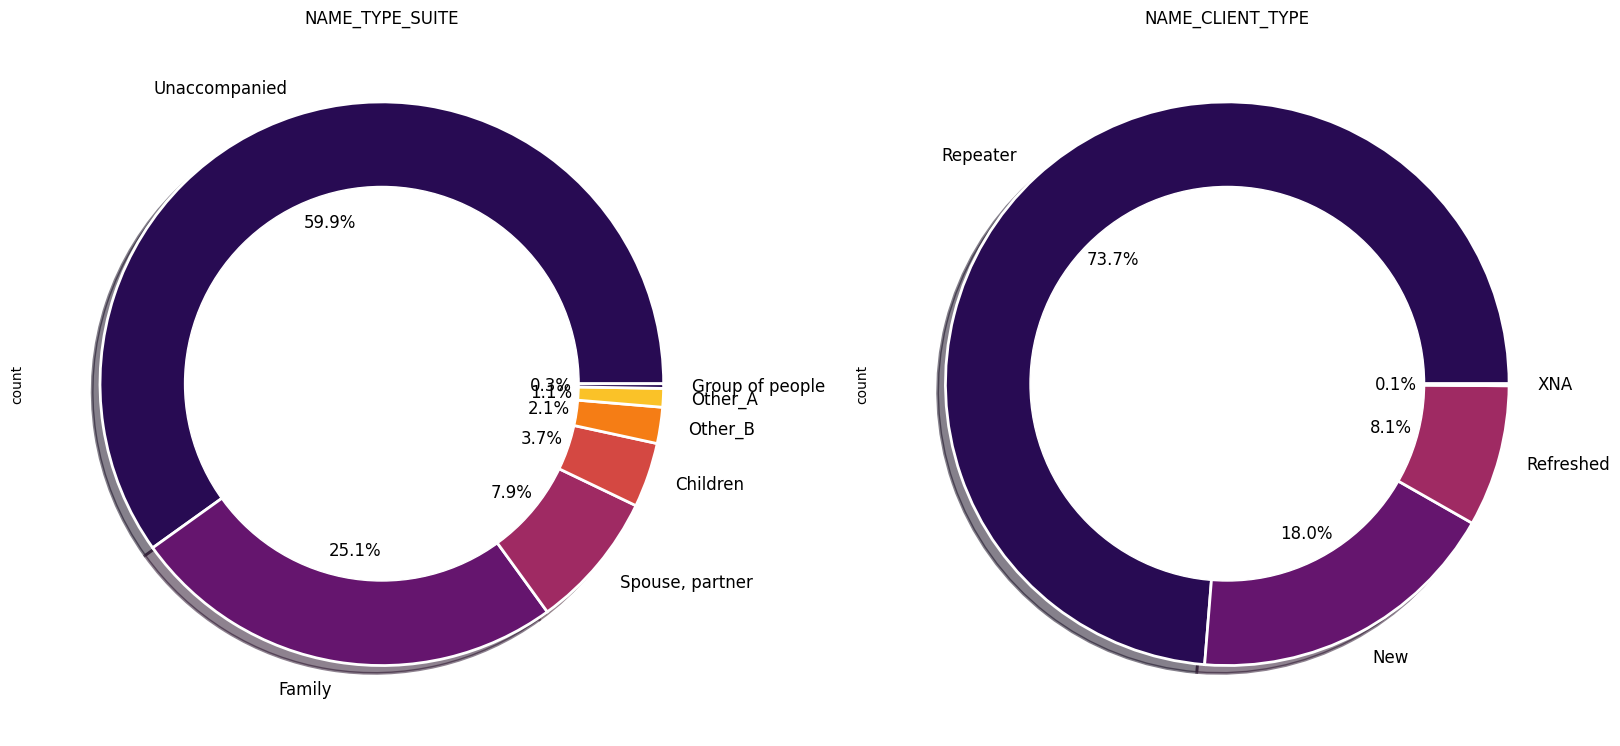

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

### Point to infer from the graph
About 60% clients are un-accompained when applying for loans.

73% clients are old clients


### Previous applications portfolio and product types

NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …

NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in.

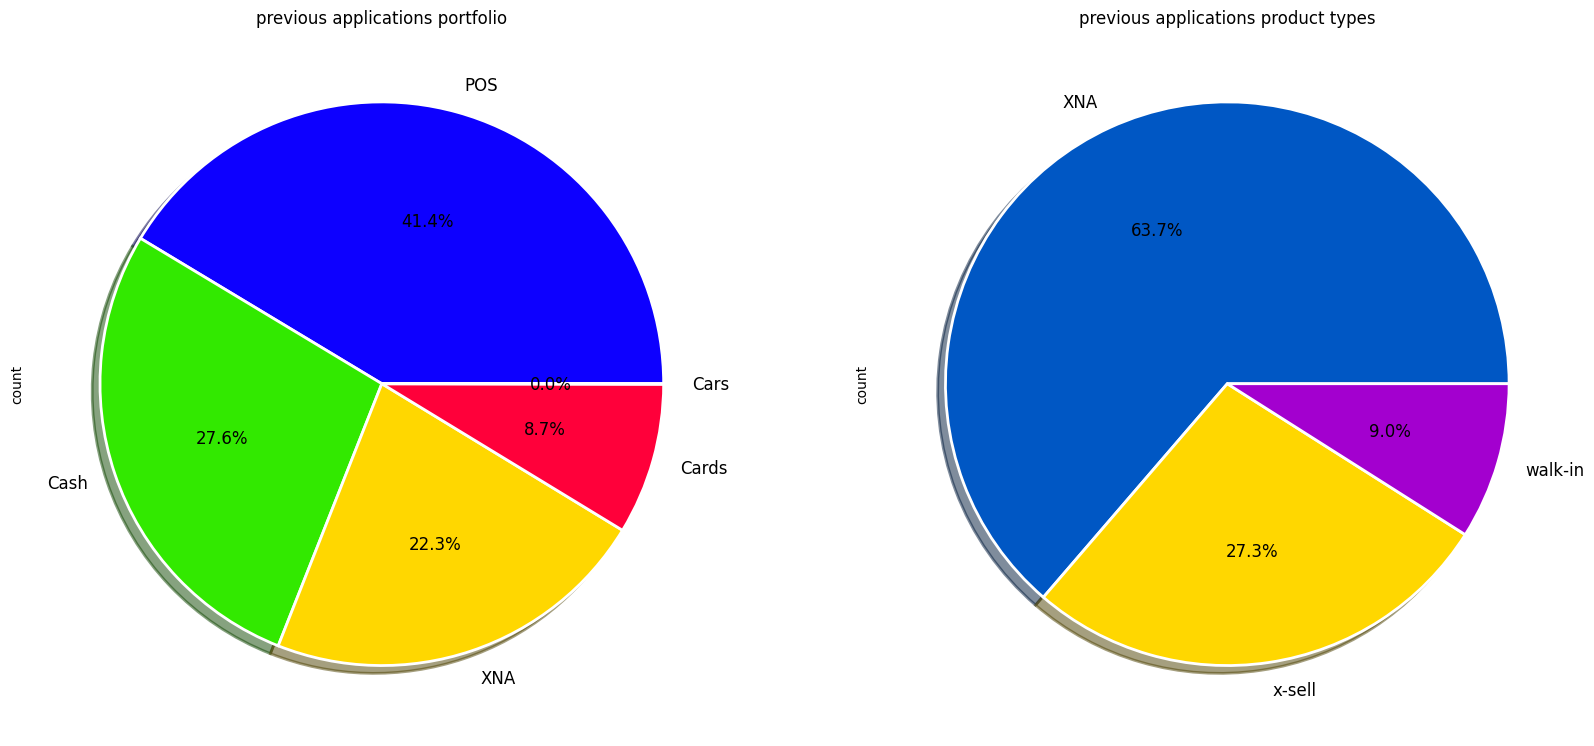

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()


### Approval,canceled and refusal rates by channel types.

CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.



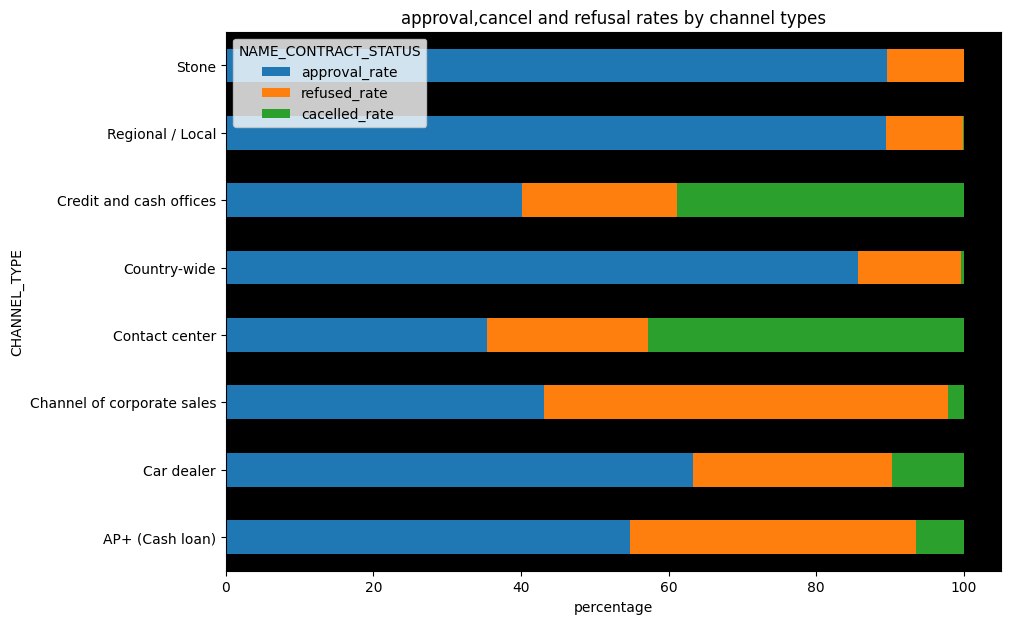

In [ ]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

### Point to infer from the graph

Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

### Highest amount credited seller areas and industries.

SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

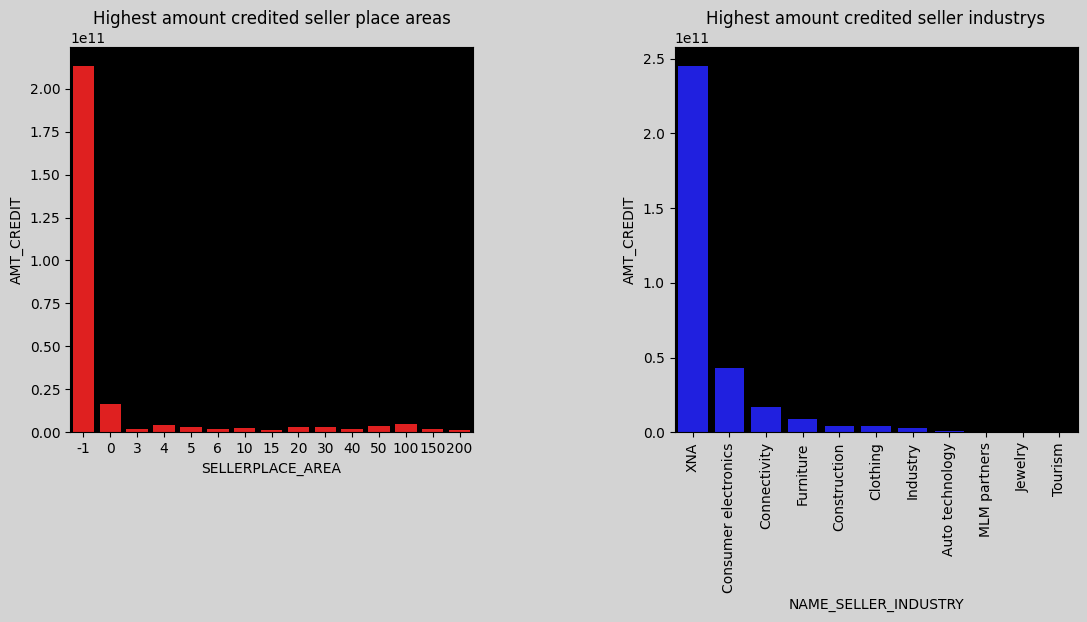

In [ ]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = previous_application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = previous_application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")


### Popular terms of previous credit at application.

CNT_PAYMENT - Term of previous credit at application of the previous application.



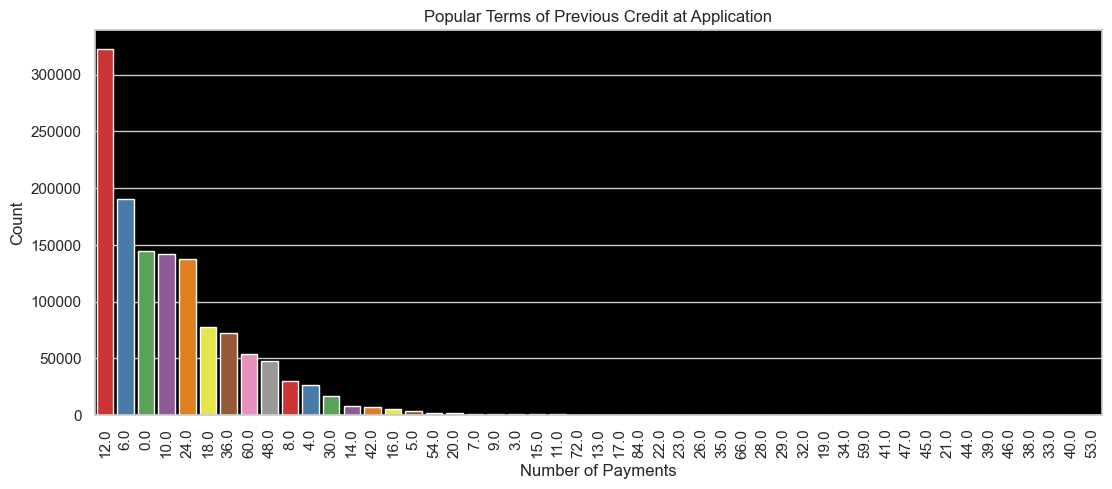

In [ ]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")

ax = sns.countplot(x=previous_application["CNT_PAYMENT"], palette="Set1", order=previous_application["CNT_PAYMENT"].value_counts().index)

ax.set_facecolor("black")
plt.xticks(rotation=90)
plt.title("Popular Terms of Previous Credit at Application")
plt.xlabel("Number of Payments")
plt.ylabel("Count")


plt.show()

### Point to infer from the graph

Popular term of previous credit are 6months ,10months ,1year ,2years & 3 years.

### Detailed product combination of the previous application

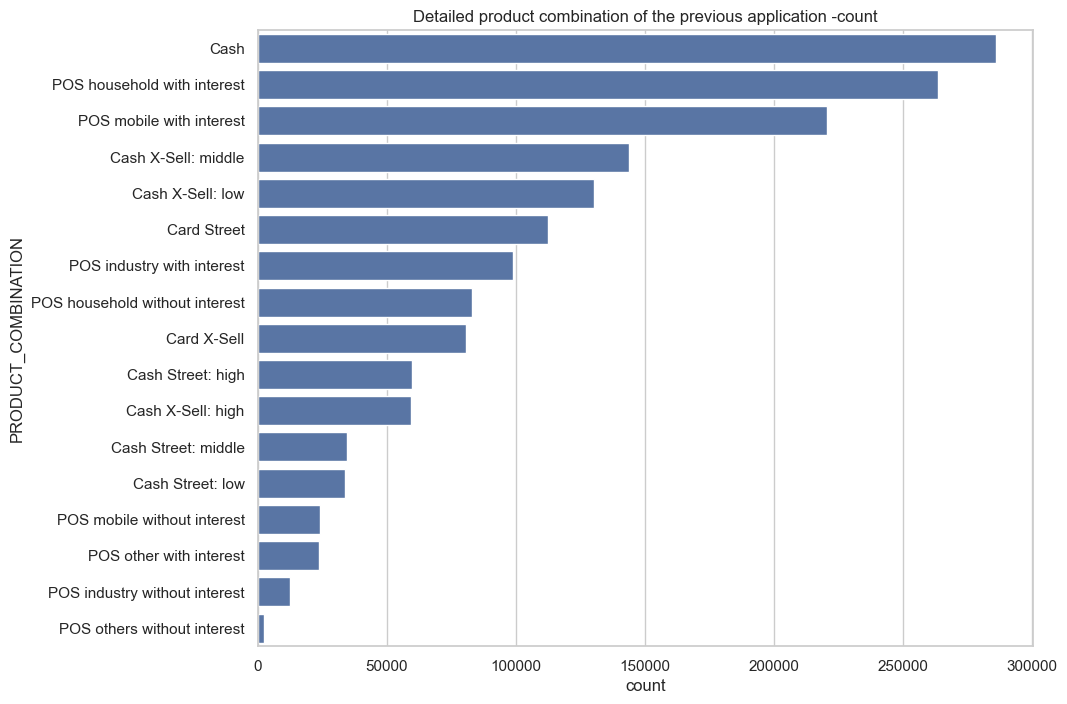

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = previous_application["PRODUCT_COMBINATION"],order=previous_application["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()


### Frequency distribution of intrest rates and client insurance requests

NAME_YIELD_GROUP - Grouped interest rate into small medium and high of the previous application.

NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application.

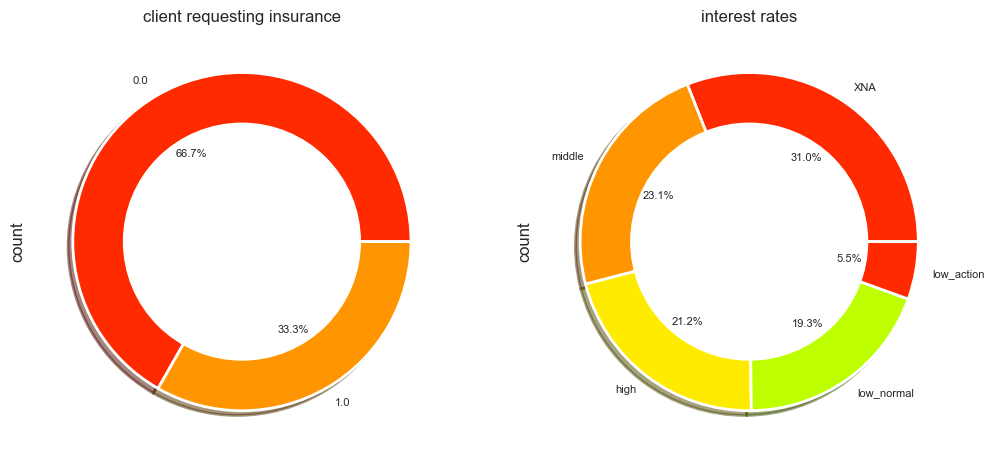

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

### Days variables - Relative to application date of current application

DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

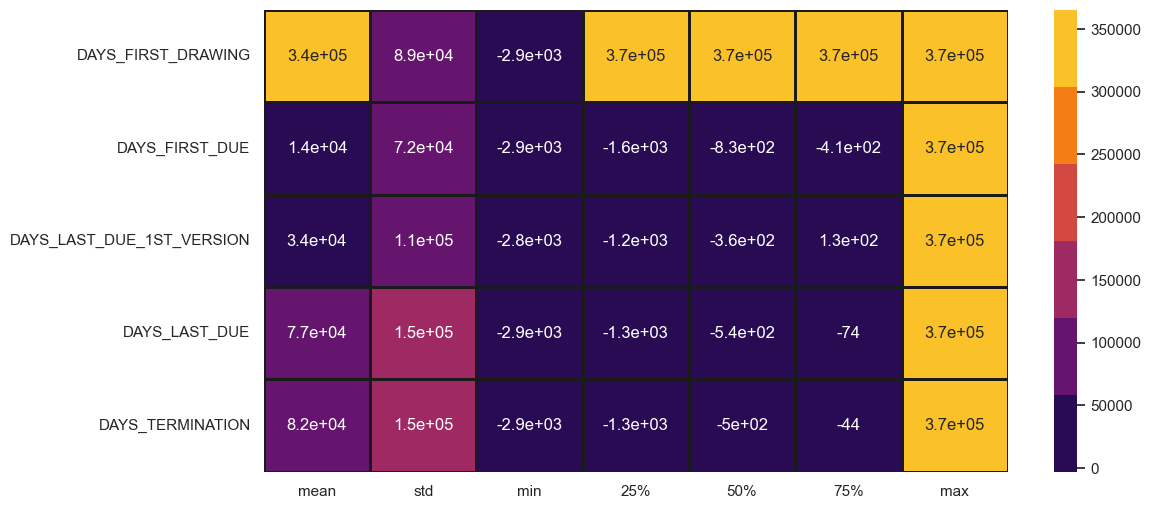

In [ ]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

# Corelation between variables


### Application Data

In [ ]:
corrmat = application_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

ValueError: could not convert string to float: 'Cash loans'


# Previous Application 

In [ ]:
corrmat = previous_application.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

ValueError: could not convert string to float: 'Consumer loans'

In [ ]:
corrmat = previous_application.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                Var2  Correlation
88   AMT_GOODS_PRICE            AMT_APPLICATION     1.00       
89   AMT_GOODS_PRICE            AMT_CREDIT          0.99       
71   AMT_CREDIT                 AMT_APPLICATION     0.98       
269  DAYS_TERMINATION           DAYS_LAST_DUE       0.93       
87   AMT_GOODS_PRICE            AMT_ANNUITY         0.82       
70   AMT_CREDIT                 AMT_ANNUITY         0.82       
53   AMT_APPLICATION            AMT_ANNUITY         0.81       
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING  0.80       
173  CNT_PAYMENT                AMT_APPLICATION     0.68       
174  CNT_PAYMENT                AMT_CREDIT          0.67

# Application Data


## Top 10 Correlation Fields for Repayer

In [ ]:
df_repayer = application_data[application_data['TARGET'] == 0]
df_defaulter = application_data[application_data['TARGET'] == 1]

In [ ]:
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
776   FLAG_EMP_PHONE               DAYS_EMPLOYED               1.00       
1798  OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE    1.00       
358   AMT_GOODS_PRICE              AMT_CREDIT                  0.99       
1199  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.95       
1064  CNT_FAM_MEMBERS              CNT_CHILDREN                0.88       
1858  DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.86       
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.86       
1619  LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY      0.83       
359   AMT_GOODS_PRICE              AMT_ANNUITY                 0.78       
299   AMT_ANNUITY                  AMT_CREDIT                  0.77

## Top 10 Correlation Fields for Defaulter

In [ ]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
1798  OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE    1.00       
776   FLAG_EMP_PHONE               DAYS_EMPLOYED               1.00       
358   AMT_GOODS_PRICE              AMT_CREDIT                  0.98       
1199  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.96       
1064  CNT_FAM_MEMBERS              CNT_CHILDREN                0.89       
1858  DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.87       
1439  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION  0.85       
1619  LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY      0.78       
299   AMT_ANNUITY                  AMT_CREDIT                  0.75       
359   AMT_GOODS_PRICE              AMT_ANNUITY                 0.75

In [ ]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans           M           N             
1  100003      0       Cash loans           F           N             
2  100003      0       Cash loans           F           N             
3  100003      0       Cash loans           F           N             
4  100004      0       Revolving loans      M           Y             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0  Y               0             202500.0          406597.5       
1  N               0             270000.0          1293502.5      
2  N               0             270000.0          1293502.5      
3  N               0             270000.0          1293502.5      
4  Y               0             67500.0           135000.0       

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  24700.5        351000.0           Unaccompanied     Working           
1  35698.5        1129500.0          Family            State servant     
2  35698.5        1129500.0          Family            State servant     
3  35698.5        1129500.0          Family            State servant     
4  6750.0         135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                      

In [ ]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

TARGET  count
SK_ID_CURR               
100002      1       1    
100003      0       3    
100004      0       1    
100006      0       9    
100007      0       6    
100008      0       5    
100009      0       7    
100010      0       1    
100011      0       4    
100012      0       4

In [ ]:
dfA.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681      0       73   
173680      0       72   
242412      0       68   
206783      0       67   
389950      0       64   
382179      0       64   
198355      0       63   
345161      0       62   
446486      0       62   
238250      0       61

In [ ]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

### Repayers' Borrowing History 

In [ ]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681      0       73   
173680      0       72   
242412      0       68   
206783      0       67   
382179      0       64   
389950      0       64   
198355      0       63   
446486      0       62   
345161      0       62   
280586      0       61

### Defaulters' Borrowing History 

In [ ]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
100002      1       1    
333349      1       1    
333587      1       1    
333582      1       1    
333534      1       1    
333506      1       1    
333419      1       1    
333355      1       1    
333337      1       1    
334761      1       1

In [ ]:
mergeddf.isnull().sum()

SK_ID_CURR                      0     
TARGET                          0     
NAME_CONTRACT_TYPE_x            0     
CODE_GENDER                     0     
FLAG_OWN_CAR                    0     
FLAG_OWN_REALTY                 0     
CNT_CHILDREN                    0     
AMT_INCOME_TOTAL                0     
AMT_CREDIT_x                    0     
AMT_ANNUITY_x                   93    
AMT_GOODS_PRICE_x               1208  
NAME_TYPE_SUITE_x               3526  
NAME_INCOME_TYPE                0     
NAME_EDUCATION_TYPE             0     
NAME_FAMILY_STATUS              0     
NAME_HOUSING_TYPE               0     
REGION_POPULATION_RELATIVE      0     
DAYS_BIRTH                      0     
DAYS_EMPLOYED                   0     
DAYS_REGISTRATION               0     
DAYS_ID_PUBLISH                 0     
FLAG_MOBIL                      0     
FLAG_EMP_PHONE                  0     
FLAG_WORK_PHONE                 0     
FLAG_CONT_MOBILE                0     
FLAG_PHONE               

In [ ]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

SK_ID_CURR                      0.00 
TARGET                          0.00 
NAME_CONTRACT_TYPE_x            0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT_x                    0.00 
AMT_ANNUITY_x                   0.01 
AMT_GOODS_PRICE_x               0.09 
NAME_TYPE_SUITE_x               0.25 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE                      0.00 
FLAG_EMAIL  

In [ ]:
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0  100002      1       Cash loans           M           N             
1  100003      0       Cash loans           F           N             
2  100003      0       Cash loans           F           N             
3  100003      0       Cash loans           F           N             
4  100004      0       Revolving loans      M           Y             

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0  Y               0             202500.0          406597.5       
1  N               0             270000.0          1293502.5      
2  N               0             270000.0          1293502.5      
3  N               0             270000.0          1293502.5      
4  Y               0             67500.0           135000.0       

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  24700.5        351000.0           Unaccompanied     Working           
1  35698.5        1129500.0          Family            State servant     
2  35698.5        1129500.0          Family            State servant     
3  35698.5        1129500.0          Family            State servant     
4  6750.0         135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                      

In [ ]:
#dropping SK_ID_CURR since it all unique values

mergeddf.drop(['SK_ID_CURR'], 1, inplace = True)


In [ ]:
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  1       Cash loans           M           N            Y                
1  0       Cash loans           F           N            N                
2  0       Cash loans           F           N            N                
3  0       Cash loans           F           N            N                
4  0       Revolving loans      M           Y            Y                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                            

   

Now we will take care of null values in each column one by one.

In [ ]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

TARGET                          0.00 
NAME_CONTRACT_TYPE_x            0.00 
CODE_GENDER                     0.00 
FLAG_OWN_CAR                    0.00 
FLAG_OWN_REALTY                 0.00 
CNT_CHILDREN                    0.00 
AMT_INCOME_TOTAL                0.00 
AMT_CREDIT_x                    0.00 
AMT_ANNUITY_x                   0.01 
AMT_GOODS_PRICE_x               0.09 
NAME_TYPE_SUITE_x               0.25 
NAME_INCOME_TYPE                0.00 
NAME_EDUCATION_TYPE             0.00 
NAME_FAMILY_STATUS              0.00 
NAME_HOUSING_TYPE               0.00 
REGION_POPULATION_RELATIVE      0.00 
DAYS_BIRTH                      0.00 
DAYS_EMPLOYED                   0.00 
DAYS_REGISTRATION               0.00 
DAYS_ID_PUBLISH                 0.00 
FLAG_MOBIL                      0.00 
FLAG_EMP_PHONE                  0.00 
FLAG_WORK_PHONE                 0.00 
FLAG_CONT_MOBILE                0.00 
FLAG_PHONE                      0.00 
FLAG_EMAIL                      0.00 
CNT_FAM_MEMB

In [ ]:
enq_cs =['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for i in enq_cs:
    mergeddf[i] = mergeddf[i].fillna(0)

In [ ]:
amt_cs = ["AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]
for i in amt_cs:
    mergeddf[i] = mergeddf[i].fillna(mergeddf[i].mean())
    

In [ ]:
cols = ["DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION",
        "DAYS_LAST_DUE","DAYS_TERMINATION",'CNT_PAYMENT']
for i in cols :
    mergeddf[i]  = mergeddf[i].fillna(mergeddf[i].median())

In [ ]:
cols = ["NAME_TYPE_SUITE_y","NFLAG_INSURED_ON_APPROVAL"]
for i in cols :
    mergeddf[i]  = mergeddf[i].fillna(mergeddf[i].mode()[0])

In [ ]:
# Rest missing values are under 1.5% so we can drop these rows.
mergeddf.dropna(inplace = True)

In [ ]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

TARGET                          0.0
NAME_CONTRACT_TYPE_x            0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT_x                    0.0
AMT_ANNUITY_x                   0.0
AMT_GOODS_PRICE_x               0.0
NAME_TYPE_SUITE_x               0.0
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                      0.0
CNT_FAM_MEMBERS                 0.0
REGION_RATING_CLIENT        

In [ ]:
mergeddf.isnull().sum()

TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_P

In [ ]:
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  1       Cash loans           M           N            Y                
1  0       Cash loans           F           N            N                
2  0       Cash loans           F           N            N                
3  0       Cash loans           F           N            N                
4  0       Revolving loans      M           Y            Y                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                            

   

# Data Preparation

Converting some binary variables (Y/N) to 1/0

In [ ]:
# List of variables to map

varlist =  ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_LAST_APPL_PER_CONTRACT']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
mergeddf[varlist] = mergeddf[varlist].apply(binary_map)
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  1       Cash loans           M           0             1                 
1  0       Cash loans           F           0             0                 
2  0       Cash loans           F           0             0                 
3  0       Cash loans           F           0             0                 
4  0       Revolving loans      M           1             1                 

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                     

In [ ]:
#dropping SK_ID_PREV since non required technical field 

mergeddf.drop(['SK_ID_PREV'], 1, inplace = True)
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0  1       Cash loans           M           0             1                 
1  0       Cash loans           F           0             0                 
2  0       Cash loans           F           0             0                 
3  0       Cash loans           F           0             0                 
4  0       Revolving loans      M           1             1                 

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0  2120             1           1               0                 
1  291              1           1               0                 
2  291              1           1               0                 
3  291              1           1               0                 
4  2531             1           1               1                 

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0  1                 1           0           1.0               
1  1                 1           0           2.0               
2  1                 1           0           2.0               
3  1                 1           0           2.0               
4  1                 1           0           1.0               

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0  2                     2                             
1  1                     1                             
2  1                     1                             
3  1                     1                             
4  2                     2                             

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0  WEDNESDAY                    10                          
1  MONDAY                       11                          
2  MONDAY                       11                          
3  MONDAY                       11                          
4  MONDAY                       9                           

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0  0                           0                            
1  0                           0                            
2  0                           0                            
3  0                           0                            
4  0                           0                     

In [ ]:
mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
 'NFLAG_INSURED_ON_APPROVAL']]= mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                        'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                        'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                                        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                        'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                        'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                        'NFLAG_INSURED_ON_APPROVAL']].astype('category')

In [ ]:
obj_dtypes = [i for i in mergeddf.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in mergeddf.select_dtypes(include = np.number).columns if i not in [ 'TARGET']]

In [ ]:
num_dtypes

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START_x',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'HOUR_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [ ]:
obj_dtypes

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START_x',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_y',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                  'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                  'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                  'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                  'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                  'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                                  'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                  'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                  'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                  'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                  'NFLAG_INSURED_ON_APPROVAL','NAME_CONTRACT_TYPE_x','CODE_GENDER',
                                  'NAME_TYPE_SUITE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                                  'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                                  'CODE_REJECT_REASON','NAME_TYPE_SUITE_y','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                                  'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                                  'NAME_YIELD_GROUP','PRODUCT_COMBINATION']], drop_first=True)
dummy1.head()

FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_EMP_PHONE_1  FLAG_WORK_PHONE_1  \
0  0               1                  1                 0                   
1  0               0                  1                 0                   
2  0               0                  1                 0                   
3  0               0                  1                 0                   
4  1               1                  1                 1                   

   FLAG_CONT_MOBILE_1  FLAG_PHONE_1  FLAG_EMAIL_1  REGION_RATING_CLIENT_2  \
0  1                   1             0             1                        
1  1                   1             0             0                        
2  1                   1             0             0                        
3  1                   1             0             0                        
4  1                   1             0             1                        

   REGION_RATING_CLIENT_3  REGION_RATING_CLIENT_W_CITY_2  \
0  0                       1                               
1  0                       0                               
2  0                       0                               
3  0                       0                               
4  0                       1                               

   REGION_RATING_CLIENT_W_CITY_3  REG_REGION_NOT_LIVE_REGION_1  \
0  0                              0                              
1  0                              0                              
2  0                              0                              
3  0                              0                              
4  0                              0                              

   REG_REGION_NOT_WORK_REGION_1  LIVE_REGION_NOT_WORK_REGION_1  \
0  0                             0                               
1  0                             0                               
2  0                             0                               
3  0                             0                               
4  0                             0                               

   REG_CITY_NOT_LIVE_CITY_1  REG_CITY_NOT_WORK_CITY_1  FLAG_DOCUMENT_2_1  \
0  0                         0                         0                   
1  0                         0                         0                   
2  0                         0                         0                   
3  0                         0                         0                   
4  0                         0                         0                   

   FLAG_DOCUMENT_3_1  FLAG_DOCUMENT_4_1  FLAG_DOCUMENT_5_1  FLAG_DOCUMENT_6_1  \
0  1                  0                  0                  0                   
1  1                  0                  0                  0                   
2  1                  0                  0                  0                   
3  1                  0                  0                  0                   
4  0                  0                  0                  0                   

   FLAG_DOCUMENT_7_1  FLAG_DOCUMENT_8_1  FLAG_DOCUMENT_9_1  \
0  0                  0                  0                   
1  0                  0                  0                   
2  0                  0                  0                   
3  0                  0                  0                   
4  0                  0                  0                   

   FLAG_DOCUMENT_10_1  FLAG_DOCUMENT_11_1  FLAG_DOCUMENT_12_1  \
0  0                   0                   0                    
1  0                   0                   0                    
2  0                   0                   0                    
3  0                   0                   0                    
4  0                   0                   0                    

   FLAG_DOCUMENT_13_1  FLAG_DOCUMENT_14_1  FLAG_DOCUMENT_15_1  \
0  0                   0                   0                    
1  0                   0                   0                    
2  0               

In [ ]:
# Adding the results to the master dataframe
mergeddf = pd.concat([mergeddf, dummy1], axis=1)
mergeddf.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0  1       Cash loans           M           0            1                
1  0       Cash loans           F           0            0                
2  0       Cash loans           F           0            0                
3  0       Cash loans           F           0            0                
4  0       Revolving loans      M           1            1                

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  0             202500.0          406597.5      24700.5         
1  0             270000.0          1293502.5     35698.5         
2  0             270000.0          1293502.5     35698.5         
3  0             270000.0          1293502.5     35698.5         
4  0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0  351000.0           Unaccompanied     Working           
1  1129500.0          Family            State servant     
2  1129500.0          Family            State servant     
3  1129500.0          Family            State servant     
4  135000.0           Unaccompanied     Working           

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Higher education               Married               House / apartment   
2  Higher education               Married               House / apartment   
3  Higher education               Married               House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0  0.018801                    9461       -637           -3648.0              
1  0.003541                    16765      -1188          -1186.0              
2  0.003541                    16765      -1188          -1186.0              
3  0.003541                    16765      -1188          -1186.0              
4  0.010032                    19046      -225           -4260.0              

   DAYS_ID_PUBLISH FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE  \
0  2120             1          1              0               1                 
1  291              1          1              0               1                 
2  291              1          1              0               1                 
3  291              1          1              0               1                 
4  2531             1          1              1               1                 

  FLAG_PHONE FLAG_EMAIL  CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
0  1          0          1.0              2                     
1  1          0          2.0              1                     
2  1          0          2.0              1                     
3  1          0          2.0              1                     
4  1          0          1.0              2                     

  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  \
0  2                           WEDNESDAY                     
1  1                           MONDAY                        
2  1                           MONDAY                        
3  1                           MONDAY                        
4  2                           MONDAY                        

   HOUR_APPR_PROCESS_START_x REG_REGION_NOT_LIVE_REGION  \
0  10                         0                           
1  11                         0                           
2  11                         0                           
3  11                         0                           
4  9                          0                           

  REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
0  0                          0                            
1  0                          0                            
2  0                          0                            
3  0            

In [ ]:
mergeddf = mergeddf.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                          'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                          'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                          'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                          'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                          'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                          'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                          'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                          'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                          'NFLAG_INSURED_ON_APPROVAL','NAME_CONTRACT_TYPE_x','CODE_GENDER',
                          'NAME_TYPE_SUITE_x','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                          'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                          'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                          'CODE_REJECT_REASON','NAME_TYPE_SUITE_y','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                          'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                          'NAME_YIELD_GROUP','PRODUCT_COMBINATION'], axis = 1)
mergeddf.head()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0  1       0             202500.0          406597.5      24700.5         
1  0       0             270000.0          1293502.5     35698.5         
2  0       0             270000.0          1293502.5     35698.5         
3  0       0             270000.0          1293502.5     35698.5         
4  0       0             67500.0           135000.0      6750.0          

   AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  351000.0           0.018801                    9461       -637             
1  1129500.0          0.003541                    16765      -1188            
2  1129500.0          0.003541                    16765      -1188            
3  1129500.0          0.003541                    16765      -1188            
4  135000.0           0.010032                    19046      -225             

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
0 -3648.0             2120             1.0               
1 -1186.0             291              2.0               
2 -1186.0             291              2.0               
3 -1186.0             291              2.0               
4 -4260.0             2531             1.0               

   HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
0  10                         0                         
1  11                         0                         
2  11                         0                         
3  11                         0                         
4  9                          0                         

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0  2.0                       2.0                        
1  1.0                       0.0                        
2  1.0                       0.0                        
3  1.0                       0.0                        
4  0.0                       0.0                        

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0  2.0                       2.0                       1134.0                   
1  1.0                       0.0                       828.0                    
2  1.0                       0.0                       828.0                    
3  1.0                       0.0                       828.0                    
4  0.0                       0.0                       815.0                    

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0  0.0                         0.0                         
1  0.0                         0.0                         
2  0.0                         0.0                         
3  0.0                         0.0                         
4  0.0                         0.0                         

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0  0.0                         0.0                         
1  0.0                         0.0                         
2  0.0                         0.0                         
3  0.0                         0.0                         
4  0.0                         0.0                         

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  \
0  0.0                        1.0                         9251.775        
1  0.0                        0.0                         98356.995       
2  0.0                        0.0                         64567.665       
3  0.0                        0.0                         6737.310        
4  0.0                        0.0                         5357.250        

   AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  \
0  179055.0         179055.0      179055.0            
1  900000.0         1035882.0     900000.0            
2  337500.0         348637.5      337500.0            
3  68809.5          68053.5       68809.5             
4  24282.0          20106.0       24282.0             

   HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT

In [ ]:
mergeddf.shape

(1406625, 292)

In [ ]:
mergeddfs=mergeddf.sample(n = 7000) 

In [ ]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = mergeddfs.drop(['TARGET'], axis=1)

In [ ]:
X.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
1291099  0             112500.0          444420.0      24106.5         
349593   0             135000.0          755190.0      38556.0         
474829   0             112500.0          1006920.0     46660.5         
413559   0             135000.0          508495.5      26127.0         
211954   0             135000.0          153576.0      12262.5         

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1291099  337500.0           0.008230                    21782        
349593   675000.0           0.008230                    19193        
474829   900000.0           0.019101                    20878        
413559   454500.0           0.006296                    18157        
211954   121500.0           0.022625                    19079        

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1291099 -8621          -4672.0             4342             2.0               
349593  -9811          -11745.0            2723             2.0               
474829   365243        -9935.0             3535             2.0               
413559  -415           -11686.0            1618             2.0               
211954  -726           -10211.0            2540             1.0               

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
1291099  17                         0                         
349593   13                         0                         
474829   20                         0                         
413559   14                         0                         
211954   12                         0                         

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1291099  0.0                       0.0                        
349593   3.0                       0.0                        
474829   0.0                       0.0                        
413559   0.0                       0.0                        
211954   0.0                       0.0                        

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1291099  0.0                       0.0                        
349593   3.0                       0.0                        
474829   0.0                       0.0                        
413559   0.0                       0.0                        
211954   0.0                       0.0                        

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1291099  80.0                    0.0                          
349593   1331.0                  0.0                          
474829   1718.0                  0.0                          
413559   1138.0                  0.0                          
211954   2393.0                  0.0                          

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1291099  0.0                        0.0                          
349593   0.0                        0.0                          
474829   0.0                        0.0                          
413559   0.0                        0.0                          
211954   0.0                        0.0                          

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1291099  0.0                        0.0                         
349593   0.0                        0.0                         
474829   0.0                        0.0                         
413559   0.0                        0.0                         
211954   0.0                        0.0                         

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
1291099  0.0                         15837.184952   0.0               
349593   1.0                         2576.250000    25861.5           
474829   2.0                         19391.130000   171000.0          
413559   1.0                         9335.025000    134100.0          
211954   4.0         

In [ ]:
X.shape

(7000, 291)

In [ ]:
# Putting response variable to y
y = mergeddfs['TARGET']

In [ ]:
y.head()

1291099    0
349593     0
474829     0
413559     0
211954     0
Name: TARGET, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=70)

In [ ]:
X_train.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
637284   0             112500.0          1125000.0     36423.0         
387810   0             117000.0          254700.0      24939.0         
920539   0             112500.0          454500.0      21190.5         
1300084  1             247500.0          473760.0      48676.5         
192285   0             67500.0           135000.0      6750.0          

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
637284   1125000.0          0.018209                    22699        
387810   225000.0           0.018029                    24849        
920539   454500.0           0.019101                    15080        
1300084  450000.0           0.031329                    17943        
192285   135000.0           0.018029                    21203        

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
637284   365243        -5053.0             5116             2.0               
387810  -1170          -10520.0            4465             2.0               
920539  -5576          -3541.0             3548             2.0               
1300084 -3347          -1538.0             1496             3.0               
192285   365243        -7973.0             4239             2.0               

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
637284   9                          0                         
387810   9                          0                         
920539   9                          1                         
1300084  15                         0                         
192285   9                          0                         

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
637284   0.0                       0.0                        
387810   1.0                       0.0                        
920539   0.0                       0.0                        
1300084  4.0                       0.0                        
192285   7.0                       0.0                        

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
637284   0.0                       0.0                        
387810   1.0                       0.0                        
920539   0.0                       0.0                        
1300084  4.0                       0.0                        
192285   7.0                       0.0                        

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
637284   247.0                   0.0                          
387810   1098.0                  0.0                          
920539   0.0                     0.0                          
1300084  1353.0                  0.0                          
192285   2432.0                  0.0                          

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
637284   0.0                        0.0                          
387810   0.0                        0.0                          
920539   0.0                        0.0                          
1300084  0.0                        0.0                          
192285   0.0                        0.0                          

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
637284   0.0                        0.0                         
387810   0.0                        0.0                         
920539   1.0                        0.0                         
1300084  0.0                        0.0                         
192285   0.0                        0.0                         

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
637284   0.0                         23225.220      251716.5          
387810   3.0                         15827.130      74254.5           
920539   1.0                         8224.695       75600.0           
1300084  0.0                         6644.385       37080.0           
192285   0.0         

In [ ]:
X_train.shape

(4900, 291)

In [ ]:
X_test.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
1245805  0             166500.0          835605.0      24561.0         
1411563  0             90000.0           247500.0      12375.0         
553130   0             180000.0          630000.0      32296.5         
146704   0             202500.0          247500.0      12375.0         
1304226  1             90000.0           675000.0      24376.5         

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1245805  697500.0           0.046220                    21834        
1411563  247500.0           0.025164                    22520        
553130   630000.0           0.014520                    10116        
146704   247500.0           0.003813                    23275        
1304226  675000.0           0.026392                    14939        

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1245805  365243        -8203.0             4996             2.0               
1411563 -5109          -9191.0             4327             2.0               
553130  -389           -1256.0             1674             2.0               
146704   365243        -13686.0            5098             1.0               
1304226 -1899          -9098.0             4174             3.0               

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
1245805  15                         0                         
1411563  13                         0                         
553130   12                         0                         
146704   12                         0                         
1304226  18                         0                         

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1245805  2.0                       0.0                        
1411563  2.0                       0.0                        
553130   1.0                       0.0                        
146704   0.0                       0.0                        
1304226  0.0                       0.0                        

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1245805  2.0                       0.0                        
1411563  2.0                       0.0                        
553130   1.0                       0.0                        
146704   0.0                       0.0                        
1304226  0.0                       0.0                        

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1245805  3302.0                  0.0                          
1411563  1514.0                  0.0                          
553130   0.0                     0.0                          
146704   2423.0                  0.0                          
1304226  16.0                    0.0                          

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1245805  0.0                        0.0                          
1411563  0.0                        0.0                          
553130   0.0                        0.0                          
146704   0.0                        0.0                          
1304226  0.0                        0.0                          

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1245805  0.0                        0.0                         
1411563  0.0                        0.0                         
553130   0.0                        1.0                         
146704   0.0                        0.0                         
1304226  0.0                        0.0                         

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
1245805  2.0                         4617.630000    29115.0           
1411563  5.0                         9065.880000    135000.0          
553130   1.0                         16335.000000   148500.0          
146704   6.0                         4865.220000    34204.5           
1304226  2.0         

In [ ]:
X_test.shape

(2100, 291)

In [ ]:
y_train.head()

637284     0
387810     0
920539     0
1300084    0
192285     0
Name: TARGET, dtype: int64

In [ ]:
y_train.shape

(4900,)

In [ ]:
y_test.head()

1245805    0
1411563    0
553130     0
146704     0
1304226    0
Name: TARGET, dtype: int64

In [ ]:
y_test.shape

(2100,)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
         'DAYS_TERMINATION']] = scaler.fit_transform(X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                                                               'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']])

X_train.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
637284  -0.559436     -0.671635          1.397112      0.691929        
387810  -0.559436     -0.620862         -0.861920     -0.141796        
920539  -0.559436     -0.671635         -0.343300     -0.413933        
1300084  0.885602      0.851539         -0.293307      1.581518        
192285  -0.559436     -1.179359         -1.172624     -1.462296        

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
637284   1.702026          -0.190849                    1.483936     
387810  -0.855063          -0.204177                    1.982872     
920539  -0.203006          -0.124799                   -0.284155     
1300084 -0.215791           0.780638                    0.380242     
192285  -1.110772          -0.204177                    1.136769     

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
637284   2.063167      -0.006276           1.377437        -0.142741          
387810  -0.475661      -1.566160           0.946936        -0.142741          
920539  -0.506189       0.425139           0.340531        -0.142741          
1300084 -0.490745       0.996649          -1.016441         1.000117          
192285   2.063167      -0.839431           0.797484        -0.142741          

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
637284  -0.900324                  -0.464305                  
387810  -0.900324                  -0.464305                  
920539  -0.900324                   2.153756                  
1300084  0.932365                  -0.464305                  
192285  -0.900324                  -0.464305                  

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
637284  -0.619798                 -0.328904                   
387810  -0.233508                 -0.328904                   
920539  -0.619798                 -0.328904                   
1300084  0.925361                 -0.328904                   
192285   2.084229                 -0.328904                   

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
637284  -0.618634                 -0.286258                   
387810  -0.228806                 -0.286258                   
920539  -0.618634                 -0.286258                   
1300084  0.940681                 -0.286258                   
192285   2.110167                 -0.286258                   

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
637284  -1.061047               -0.068761                     
387810   0.000741               -0.068761                     
920539  -1.369228               -0.068761                     
1300084  0.318903               -0.068761                     
192285   1.665166               -0.068761                     

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
637284  -0.047805                  -0.151274                     
387810  -0.047805                  -0.151274                     
920539  -0.047805                  -0.151274                     
1300084 -0.047805                  -0.151274                     
192285  -0.047805                  -0.151274                     

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
637284  -0.278815                  -0.438698                    
387810  -0.278815                  -0.438698                    
920539   0.759326                  -0.438698                    
1300084 -0.278815                  -0.438698                    
192285  -0.278815                  -0.438698                    

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
637284  -1.122648                    0.576586       0.270242          
387810   0.214813                    0.004861      -0.351532          
920539  -0.676828                   -0.582657      -0.346818          
1300084 -1.122648                   -0.704783      -0.481781          
192285  -1.122648    

In [ ]:
X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE',
         'DAYS_TERMINATION']] = scaler.transform(X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_FIRST_DRAWING',
                                                               'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']])

X_test.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
1245805 -0.559436     -0.062365          0.645932     -0.169239        
1411563 -0.559436     -0.925497         -0.880609     -1.053928        
553130  -0.559436      0.089952          0.112244      0.392350        
146704  -0.559436      0.343814         -0.880609     -1.053928        
1304226  0.885602     -0.925497          0.229050     -0.182633        

         AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1245805  0.487409           1.883260                    1.283201     
1411563 -0.791136           0.324143                    1.442396     
553130   0.295627          -0.464005                   -1.436118     
146704  -0.791136          -1.256818                    1.617604     
1304226  0.423482           0.415072                   -0.316876     

         DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
1245805  2.063167      -0.905057           1.298082        -0.142741          
1411563 -0.502954      -1.186960           0.855678        -0.142741          
553130  -0.470249       1.077111          -0.898731        -0.142741          
146704   2.063167      -2.469505           1.365534        -1.285598          
1304226 -0.480712      -1.160424           0.754500         1.000117          

         HOUR_APPR_PROCESS_START_x  LIVE_CITY_NOT_WORK_CITY  \
1245805  0.932365                  -0.464305                  
1411563  0.321469                  -0.464305                  
553130   0.016020                  -0.464305                  
146704   0.016020                  -0.464305                  
1304226  1.848710                  -0.464305                  

         OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
1245805  0.152781                 -0.328904                   
1411563  0.152781                 -0.328904                   
553130  -0.233508                 -0.328904                   
146704  -0.619798                 -0.328904                   
1304226 -0.619798                 -0.328904                   

         OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
1245805  0.161023                 -0.286258                   
1411563  0.161023                 -0.286258                   
553130  -0.228806                 -0.286258                   
146704  -0.618634                 -0.286258                   
1304226 -0.618634                 -0.286258                   

         DAYS_LAST_PHONE_CHANGE  AMT_REQ_CREDIT_BUREAU_HOUR  \
1245805  2.750661               -0.068761                     
1411563  0.519782               -0.068761                     
553130  -1.369228               -0.068761                     
146704   1.653937               -0.068761                     
1304226 -1.349265               -0.068761                     

         AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
1245805 -0.047805                  -0.151274                     
1411563 -0.047805                  -0.151274                     
553130  -0.047805                  -0.151274                     
146704  -0.047805                  -0.151274                     
1304226 -0.047805                  -0.151274                     

         AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
1245805 -0.278815                  -0.438698                    
1411563 -0.278815                  -0.438698                    
553130  -0.278815                   1.035665                    
146704  -0.278815                  -0.438698                    
1304226 -0.278815                  -0.438698                    

         AMT_REQ_CREDIT_BUREAU_YEAR  AMT_ANNUITY_y  AMT_APPLICATION  \
1245805 -0.231008                   -0.861411      -0.509688          
1411563  1.106453                   -0.517650      -0.138698          
553130  -0.676828                    0.044109      -0.091398          
146704   1.552273                   -0.842277      -0.491856          
1304226 -0.231008    

In [ ]:
# Checking the Converted Rate
Target = round((sum(mergeddf['TARGET'])/len(mergeddf['TARGET'].index))*100,2)
print("We have almost {} %  Converted rate after successful data manipulation".format(Target))

We have almost 8.66 %  Converted rate after successful data manipulation


# Model Building

# SVM (Support Vector Machine)

It is a classification method. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()

In [ ]:
# fit the model with the training data
model.fit(X_train,y_train)

SVC()

In [ ]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9179591836734694


# VIF

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.tail()

Features  VIF
230  NAME_GOODS_CATEGORY_Education NaN 
246  NAME_GOODS_CATEGORY_Weapon    NaN 
248  NAME_PORTFOLIO_Cars           NaN 
254  CHANNEL_TYPE_Car dealer       NaN 
269  NAME_SELLER_INDUSTRY_Tourism  NaN

In [ ]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['CNT_CHILDREN', 'NAME_GOODS_CATEGORY_Medicine', 'NAME_GOODS_CATEGORY_Jewelry', 'NAME_GOODS_CATEGORY_Insurance', 'NAME_GOODS_CATEGORY_Homewares', 'NAME_GOODS_CATEGORY_Gardening', 'NAME_GOODS_CATEGORY_Furniture', 'NAME_GOODS_CATEGORY_Fitness', 'NAME_GOODS_CATEGORY_Direct Sales', 'NAME_GOODS_CATEGORY_Consumer Electronics', 'NAME_GOODS_CATEGORY_Construction Materials', 'NAME_GOODS_CATEGORY_Computers', 'NAME_GOODS_CATEGORY_Clothing and Accessories', 'NAME_GOODS_CATEGORY_Auto Accessories', 'NAME_GOODS_CATEGORY_Audio/Video', 'CODE_REJECT_REASON_XNA', 'CODE_REJECT_REASON_XAP', 'CODE_REJECT_REASON_VERIF', 'CODE_REJECT_REASON_SYSTEM', 'CODE_REJECT_REASON_SCOFR', 'CODE_REJECT_REASON_SCO', 'CODE_REJECT_REASON_LIMIT', 'CODE_REJECT_REASON_HC', 'NAME_CONTRACT_STATUS_Unused offer', 'NAME_CONTRACT_STATUS_Refused', 'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_CONTRACT_TYPE_y_Revolving loans', 'NAME_CONTRACT_TYPE_y_Consumer loans', 'ORGANIZATION_TYPE_XNA', 'NAME_FAMILY_STATUS_Widow', 'NAME_FAMILY_STATUS_Single /

In [ ]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
637284  -0.671635          0.691929      -0.190849                     
387810  -0.620862         -0.141796      -0.204177                     
920539  -0.671635         -0.413933      -0.124799                     
1300084  0.851539          1.581518       0.780638                     
192285  -1.179359         -1.462296      -0.204177                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
637284   1.483936   -0.006276           1.377437          
387810   1.982872   -1.566160           0.946936          
920539  -0.284155    0.425139           0.340531          
1300084  0.380242    0.996649          -1.016441          
192285   1.136769   -0.839431           0.797484          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
637284  -0.900324                  -0.328904                   
387810  -0.900324                  -0.328904                   
920539  -0.900324                  -0.328904                   
1300084  0.932365                  -0.328904                   
192285  -0.900324                  -0.328904                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
637284  -0.286258                 -1.061047                 
387810  -0.286258                  0.000741                 
920539  -0.286258                 -1.369228                 
1300084 -0.286258                  0.318903                 
192285  -0.286258                  1.665166                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
637284  -0.068761                   -0.047805                    
387810  -0.068761                   -0.047805                    
920539  -0.068761                   -0.047805                    
1300084 -0.068761                   -0.047805                    
192285  -0.068761                   -0.047805                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
637284  -0.151274                   -0.278815                    
387810  -0.151274                   -0.278815                    
920539  -0.151274                    0.759326                    
1300084 -0.151274                   -0.278815                    
192285  -0.151274                   -0.278815                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
637284  -0.438698                  -1.122648                     
387810  -0.438698                   0.214813                     
920539  -0.438698                  -0.676828                     
1300084 -0.438698                  -1.122648                     
192285  -0.438698                  -1.122648                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
637284  -1.013792                   0.081077                      
387810   0.489986                   0.081077                      
920539   0.489986                   0.081077                      
1300084  0.489986                   0.081077                      
192285  -0.713036                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
637284   0.055413                0.819503      -0.137967           
387810   0.055413                0.114822      -0.138921           
920539   0.055413               -0.410209      -0.145123           
1300084  0.055413                0.212238      -0.152279           
192285   0.055413               -0.403883       0.029006           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
637284  -0.146025        0               1                  0                   
387810  -0.155452        0               1                  0                   
920539  -0.162987        1               1                  0                   
1300084 -0.154050        1               1                  1                   
192285  -0.163004        0               1                  0

In [ ]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
1245805 -0.062365         -0.169239       1.883260                     
1411563 -0.925497         -1.053928       0.324143                     
553130   0.089952          0.392350      -0.464005                     
146704   0.343814         -1.053928      -1.256818                     
1304226 -0.925497         -0.182633       0.415072                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1245805  1.283201   -0.905057           1.298082          
1411563  1.442396   -1.186960           0.855678          
553130  -1.436118    1.077111          -0.898731          
146704   1.617604   -2.469505           1.365534          
1304226 -0.316876   -1.160424           0.754500          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
1245805  0.932365                  -0.328904                   
1411563  0.321469                  -0.328904                   
553130   0.016020                  -0.328904                   
146704   0.016020                  -0.328904                   
1304226  1.848710                  -0.328904                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1245805 -0.286258                  2.750661                 
1411563 -0.286258                  0.519782                 
553130  -0.286258                 -1.369228                 
146704  -0.286258                  1.653937                 
1304226 -0.286258                 -1.349265                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1245805 -0.068761                   -0.047805                    
1411563 -0.068761                   -0.047805                    
553130  -0.068761                   -0.047805                    
146704  -0.068761                   -0.047805                    
1304226 -0.068761                   -0.047805                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1245805 -0.151274                   -0.278815                    
1411563 -0.151274                   -0.278815                    
553130  -0.151274                   -0.278815                    
146704  -0.151274                   -0.278815                    
1304226 -0.151274                   -0.278815                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
1245805 -0.438698                  -0.231008                     
1411563 -0.438698                   1.106453                     
553130   1.035665                  -0.676828                     
146704  -0.438698                   1.552273                     
1304226 -0.438698                  -0.231008                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
1245805  0.489986                   0.081077                      
1411563  0.790742                   0.081077                      
553130   0.489986                   0.081077                      
146704  -1.314547                   0.081077                      
1304226  1.091497                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
1245805  0.055413               -2.554613      -0.097416           
1411563  0.055413               -0.783424      -0.157049           
553130   0.055413                0.491833      -0.109343           
146704   0.055413               -1.933431      -0.085489           
1304226  0.055413                1.111749      -0.157049           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
1245805 -0.192565        1               0                  0                   
1411563 -0.168279        0               1                  1                   
553130  -0.150511        0               1                  0                   
146704  -0.184189        0               1                  0                   
1304226 -0.156731        0               1                  0

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
25   FLAG_CONT_MOBILE_1                                           25.62
125  NAME_CLIENT_TYPE_Repeater                                    6.14 
8    DEF_60_CNT_SOCIAL_CIRCLE                                     4.54 
7    DEF_30_CNT_SOCIAL_CIRCLE                                     4.53 
23   FLAG_OWN_REALTY_1                                            4.10 
59   NAME_FAMILY_STATUS_Married                                   3.00 
58   NAME_INCOME_TYPE_Working                                     2.77 
119  NAME_PAYMENT_TYPE_XNA                                        2.19 
64   WEEKDAY_APPR_PROCESS_START_x_TUESDAY                         2.14 
94   WEEKDAY_APPR_PROCESS_START_y_THURSDAY                        2.14 
91   WEEKDAY_APPR_PROCESS_START_y_MONDAY                          2.12 
95   WEEKDAY_APPR_PROCESS_START_y_TUESDAY                         2.09 
63   WEEKDAY_APPR_PROCESS_START_x_THURSDAY                        2.09 
60   WEEKDAY_APPR_PROCESS_START_x_MONDAY                          2.06 
65   WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY                       2.06 
92   WEEKDAY_APPR_PROCESS_START_y_SATURDAY                        2.02 
96   WEEKDAY_APPR_PROCESS_START_y_WEDNESDAY                       2.01 
22   FLAG_OWN_CAR_1                                               1.89 
48   CODE_GENDER_M                                                1.82 
93   WEEKDAY_APPR_PROCESS_START_y_SUNDAY                          1.72 
61   WEEKDAY_APPR_PROCESS_START_x_SATURDAY                        1.71 
26   FLAG_PHONE_1                                                 1.70 
11   AMT_REQ_CREDIT_BUREAU_DAY                                    1.61 
17   FLAG_LAST_APPL_PER_CONTRACT                                  1.59 
24   FLAG_WORK_PHONE_1                                            1.57 
18   NFLAG_LAST_APPL_IN_DAY                                       1.56 
124  NAME_CLIENT_TYPE_Refreshed                                   1.55 
3    DAYS_BIRTH                                                   1.51 
47   NFLAG_INSURED_ON_APPROVAL_1.0                                1.45 
0    AMT_INCOME_TOTAL                                             1.38 
19   DAYS_DECISION                                                1.35 
62   WEEKDAY_APPR_PROCESS_START_x_SUNDAY                          1.35 
12   AMT_REQ_CREDIT_BUREAU_WEEK                                   1.34 
1    AMT_ANNUITY_x                                                1.31 
16   HOUR_APPR_PROCESS_START_y                                    1.28 
6    HOUR_APPR_PROCESS_START_x                                    1.28 
88   ORGANIZATION_TYPE_Trade: type 6                              1.27 
55   NAME_INCOME_TYPE_State servant                               1.25 
29   REG_CITY_NOT_LIVE_CITY_1                                     1.22 
4    DAYS_REGISTRATION                                            1.17 
10   AMT_REQ_CREDIT_BUREAU_HOUR                                   1.16 
2    REGION_POPULATION_RELATIVE                                   1.15 
133  CHANNEL_TYPE_Contact center                                  1.15 
132  CHANNEL_TYPE_Channel of corporate sales                      1.14 
9    DAYS_LAST_PHONE_CHANGE                                       1.14 
45   FLAG_DOCUMENT_20_1                                           1.13 
28   REG_REGION_NOT_LIVE_REGION_1                                 1.13 
27   FLAG_EMAIL_1                                                 1.13 
15   AMT_REQ_CREDIT_BUREAU_YEAR                                   1.12 
123  NAME_TYPE_SUITE_y_Spouse, partner                            1.12 
5    DAYS_ID_PUBLISH                                              1.12 
41   FLAG_DOCUMENT_16_1                                           1.10 
43   FLAG_DOCUMENT_18_1                                           1.09 
53   NAME_TYPE_SUITE_x_Spouse, partner                            1.08 
107  NAME_CASH_LOAN_PURPOSE_Gasification / water supply           1.07 
112  NAME_CASH_LOAN_PURP

The NaN, in if in  case, is interpretted as no correlation between the two variables.

In [ ]:
features_to_remove = vif.loc[vif['VIF'] >= 4.99,'Features'].values
features_to_remove = list(features_to_remove)
print(features_to_remove)

['FLAG_CONT_MOBILE_1', 'NAME_CLIENT_TYPE_Repeater']


In [ ]:
X_train = X_train.drop(columns=features_to_remove, axis = 1)
X_train.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
637284  -0.671635          0.691929      -0.190849                     
387810  -0.620862         -0.141796      -0.204177                     
920539  -0.671635         -0.413933      -0.124799                     
1300084  0.851539          1.581518       0.780638                     
192285  -1.179359         -1.462296      -0.204177                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
637284   1.483936   -0.006276           1.377437          
387810   1.982872   -1.566160           0.946936          
920539  -0.284155    0.425139           0.340531          
1300084  0.380242    0.996649          -1.016441          
192285   1.136769   -0.839431           0.797484          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
637284  -0.900324                  -0.328904                   
387810  -0.900324                  -0.328904                   
920539  -0.900324                  -0.328904                   
1300084  0.932365                  -0.328904                   
192285  -0.900324                  -0.328904                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
637284  -0.286258                 -1.061047                 
387810  -0.286258                  0.000741                 
920539  -0.286258                 -1.369228                 
1300084 -0.286258                  0.318903                 
192285  -0.286258                  1.665166                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
637284  -0.068761                   -0.047805                    
387810  -0.068761                   -0.047805                    
920539  -0.068761                   -0.047805                    
1300084 -0.068761                   -0.047805                    
192285  -0.068761                   -0.047805                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
637284  -0.151274                   -0.278815                    
387810  -0.151274                   -0.278815                    
920539  -0.151274                    0.759326                    
1300084 -0.151274                   -0.278815                    
192285  -0.151274                   -0.278815                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
637284  -0.438698                  -1.122648                     
387810  -0.438698                   0.214813                     
920539  -0.438698                  -0.676828                     
1300084 -0.438698                  -1.122648                     
192285  -0.438698                  -1.122648                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
637284  -1.013792                   0.081077                      
387810   0.489986                   0.081077                      
920539   0.489986                   0.081077                      
1300084  0.489986                   0.081077                      
192285  -0.713036                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
637284   0.055413                0.819503      -0.137967           
387810   0.055413                0.114822      -0.138921           
920539   0.055413               -0.410209      -0.145123           
1300084  0.055413                0.212238      -0.152279           
192285   0.055413               -0.403883       0.029006           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
637284  -0.146025        0               1                  0                   
387810  -0.155452        0               1                  0                   
920539  -0.162987        1               1                  0                   
1300084 -0.154050        1               1                  1                   
192285  -0.163004        0               1                  0

In [ ]:
X_test = X_test.drop(columns=features_to_remove, axis = 1)
X_test.head()

AMT_INCOME_TOTAL  AMT_ANNUITY_x  REGION_POPULATION_RELATIVE  \
1245805 -0.062365         -0.169239       1.883260                     
1411563 -0.925497         -1.053928       0.324143                     
553130   0.089952          0.392350      -0.464005                     
146704   0.343814         -1.053928      -1.256818                     
1304226 -0.925497         -0.182633       0.415072                     

         DAYS_BIRTH  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1245805  1.283201   -0.905057           1.298082          
1411563  1.442396   -1.186960           0.855678          
553130  -1.436118    1.077111          -0.898731          
146704   1.617604   -2.469505           1.365534          
1304226 -0.316876   -1.160424           0.754500          

         HOUR_APPR_PROCESS_START_x  DEF_30_CNT_SOCIAL_CIRCLE  \
1245805  0.932365                  -0.328904                   
1411563  0.321469                  -0.328904                   
553130   0.016020                  -0.328904                   
146704   0.016020                  -0.328904                   
1304226  1.848710                  -0.328904                   

         DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
1245805 -0.286258                  2.750661                 
1411563 -0.286258                  0.519782                 
553130  -0.286258                 -1.369228                 
146704  -0.286258                  1.653937                 
1304226 -0.286258                 -1.349265                 

         AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1245805 -0.068761                   -0.047805                    
1411563 -0.068761                   -0.047805                    
553130  -0.068761                   -0.047805                    
146704  -0.068761                   -0.047805                    
1304226 -0.068761                   -0.047805                    

         AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1245805 -0.151274                   -0.278815                    
1411563 -0.151274                   -0.278815                    
553130  -0.151274                   -0.278815                    
146704  -0.151274                   -0.278815                    
1304226 -0.151274                   -0.278815                    

         AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
1245805 -0.438698                  -0.231008                     
1411563 -0.438698                   1.106453                     
553130   1.035665                  -0.676828                     
146704  -0.438698                   1.552273                     
1304226 -0.438698                  -0.231008                     

         HOUR_APPR_PROCESS_START_y  FLAG_LAST_APPL_PER_CONTRACT  \
1245805  0.489986                   0.081077                      
1411563  0.790742                   0.081077                      
553130   0.489986                   0.081077                      
146704  -1.314547                   0.081077                      
1304226  1.091497                   0.081077                      

         NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA  \
1245805  0.055413               -2.554613      -0.097416           
1411563  0.055413               -0.783424      -0.157049           
553130   0.055413                0.491833      -0.109343           
146704   0.055413               -1.933431      -0.085489           
1304226  0.055413                1.111749      -0.157049           

         DAYS_FIRST_DUE  FLAG_OWN_CAR_1  FLAG_OWN_REALTY_1  FLAG_WORK_PHONE_1  \
1245805 -0.192565        1               0                  0                   
1411563 -0.168279        0               1                  1                   
553130  -0.150511        0               1                  0                   
146704  -0.184189        0               1                  0                   
1304226 -0.156731        0               1                  0

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8    DEF_60_CNT_SOCIAL_CIRCLE                                     4.54
7    DEF_30_CNT_SOCIAL_CIRCLE                                     4.53
23   FLAG_OWN_REALTY_1                                            3.48
58   NAME_FAMILY_STATUS_Married                                   2.85
57   NAME_INCOME_TYPE_Working                                     2.57
118  NAME_PAYMENT_TYPE_XNA                                        2.03
22   FLAG_OWN_CAR_1                                               1.88
63   WEEKDAY_APPR_PROCESS_START_x_TUESDAY                         1.82
47   CODE_GENDER_M                                                1.80
59   WEEKDAY_APPR_PROCESS_START_x_MONDAY                          1.78
93   WEEKDAY_APPR_PROCESS_START_y_THURSDAY                        1.78
94   WEEKDAY_APPR_PROCESS_START_y_TUESDAY                         1.77
90   WEEKDAY_APPR_PROCESS_START_y_MONDAY                          1.77
62   WEEKDAY_APPR_PROCESS_START_x_THURSDAY                        1.76
64   WEEKDAY_APPR_PROCESS_START_x_WEDNESDAY                       1.75
91   WEEKDAY_APPR_PROCESS_START_y_SATURDAY                        1.72
95   WEEKDAY_APPR_PROCESS_START_y_WEDNESDAY                       1.71
25   FLAG_PHONE_1                                                 1.67
11   AMT_REQ_CREDIT_BUREAU_DAY                                    1.61
17   FLAG_LAST_APPL_PER_CONTRACT                                  1.59
24   FLAG_WORK_PHONE_1                                            1.57
18   NFLAG_LAST_APPL_IN_DAY                                       1.56
60   WEEKDAY_APPR_PROCESS_START_x_SATURDAY                        1.51
3    DAYS_BIRTH                                                   1.50
92   WEEKDAY_APPR_PROCESS_START_y_SUNDAY                          1.50
46   NFLAG_INSURED_ON_APPROVAL_1.0                                1.39
0    AMT_INCOME_TOTAL                                             1.38
12   AMT_REQ_CREDIT_BUREAU_WEEK                                   1.34
1    AMT_ANNUITY_x                                                1.30
16   HOUR_APPR_PROCESS_START_y                                    1.28
61   WEEKDAY_APPR_PROCESS_START_x_SUNDAY                          1.27
87   ORGANIZATION_TYPE_Trade: type 6                              1.27
6    HOUR_APPR_PROCESS_START_x                                    1.27
19   DAYS_DECISION                                                1.26
54   NAME_INCOME_TYPE_State servant                               1.22
28   REG_CITY_NOT_LIVE_CITY_1                                     1.21
4    DAYS_REGISTRATION                                            1.17
10   AMT_REQ_CREDIT_BUREAU_HOUR                                   1.16
2    REGION_POPULATION_RELATIVE                                   1.15
130  CHANNEL_TYPE_Channel of corporate sales                      1.14
131  CHANNEL_TYPE_Contact center                                  1.14
44   FLAG_DOCUMENT_20_1                                           1.13
26   FLAG_EMAIL_1                                                 1.13
27   REG_REGION_NOT_LIVE_REGION_1                                 1.13
123  NAME_CLIENT_TYPE_Refreshed                                   1.12
122  NAME_TYPE_SUITE_y_Spouse, partner                            1.12
9    DAYS_LAST_PHONE_CHANGE                                       1.12
5    DAYS_ID_PUBLISH                                              1.12
15   AMT_REQ_CREDIT_BUREAU_YEAR                                   1.10
40   FLAG_DOCUMENT_16_1                                           1.09
52   NAME_TYPE_SUITE_x_Spouse, partner                            1.08
42   FLAG_DOCUMENT_18_1                                           1.08
106  NAME_CASH_LOAN_PURPOSE_Gasification / water supply           1.07
111  NAME_CASH_LOAN_PURPOSE_Payments on other loans               1.07
31   FLAG_DOCUMENT_5_1                                            1.07
21   DAYS_FIRST_DUE                                               1.06
14   AMT_

In [ ]:
# fit the model with the training data
model.fit(X_train,y_train)

SVC()

In [ ]:
# predict the target on the train dataset
predict_train = model.predict(X_train)
predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.9181632653061225


In [ ]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, predict_train )
print(confusion)

[[4498    0]
 [ 401    1]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.0024875621890547263

In [ ]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

1.0

In [ ]:
# Calculate false postive rate - predicting Defaulted when customer does not have Defaulted
print(FP/ float(TN+FP))

0.0


In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

1.0


In [ ]:
# Negative predictive value
print(TN / float(TN+ FN))

0.9181465605225556


# Plotting the ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

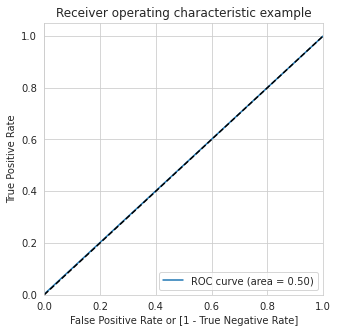

In [ ]:
draw_roc(y_train,predict_train)

# Precision and Recall

In [ ]:
#Using sklearn utilities for the same

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,predict_train)

1.0

In [ ]:
recall_score(y_train,predict_train)  

0.0024875621890547263

# Making predictions on the test set

In [ ]:
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data\n\n',predict_test)

Target on test data

 [0 0 0 ... 0 0 0]


In [ ]:
confusion2 = metrics.confusion_matrix(y_test, predict_test )
print(confusion2)

[[1912    0]
 [ 188    0]]


In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's check the overall accuracy.
testaccuracy= accuracy_score(y_test,predict_test)
testaccuracy

0.9104761904761904

In [ ]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.0

In [ ]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

1.0

# Final Observation:

In [ ]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))

Train Data Accuracy    :91.82 %
Train Data Sensitivity :0.25 %
Train Data Specificity :100.0 %
Test Data Accuracy     :91.05 %
Test Data Sensitivity  :0.0 %
Test Data Specificity  :100.0 %
